# **<span style="color:#ff4871;">Hybrid Recommender System Based on this complex Challenge</span>**
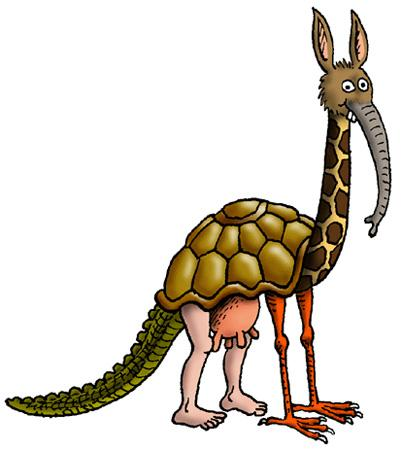

**<span style="color:#ff4871;">Team Name</span>**

- **<span style="color:#ff4871;">Owais-Ahmad-Team</span>**

**<span style="color:#ff4871;">Teammates</span>**

- <span style="color:#ff4871;">Owais Ahmad [PortFolio](https://owaiskhan9654.github.io/)</span>




## <span style="color:#ff4871;">Contact Information</span>

- **<span style="color:#ff4871;">Name</span>** - Owais Ahmad
- **<span style="color:#ff4871;">Phone</span>** - +91-9515884381
- **<span style="color:#ff4871;">Email</span>** - owaiskhan9654@gmail.com
- **<span style="color:#ff4871;">Portfolio</span>** - https://owaiskhan9654.github.io/

**<span style="color:#ff4871;">Refrences</span>**

- [Collaborative Filtering Based Recommender System](https://www.kaggle.com/code/rangarajansaranathan/collaborative-filtering-based-recommender-system)
 
 
- [Predicting and Detecting the Relevant Contextual Information in a Movie-Recommender System, Interacting with Computers](https://doi.org/10.1093/iwc/iws003)


- [Movie Recommender Systems](https://www.kaggle.com/code/rounakbanik/movie-recommender-systems)


- [A movie recommender system based on inductive learning](https://ieeexplore.ieee.org/abstract/document/1460433) 

 **<span style="color:#ff4871;">Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item. In this Challenge I have computed and extracted several Features in order to Build this Hybrid Collaborative Recommender System</span>**

# **<span style="color:#ff4871">Basic Imports and Reading the Dataset</span>**

In [1]:
import pandas as pd
from datetime import date
from tqdm.notebook import tqdm
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots
import numpy as np
sns.set_context('paper')

In [2]:
df_content = pd.read_csv('dataset/content.csv')
df_content

content_id content_type language    genre  duration release_date  \
0       cont_475_19_32       series  english    drama   4980000   2018-07-01   
1      cont_2185_15_21       series  english    drama   3000000   2016-03-29   
2      cont_4857_13_28       series    tamil   comedy   3120000   2006-03-06   
3        cont_3340_1_5       sports    hindi  cricket   9900000   2009-01-10   
4      cont_1664_10_29       series    hindi   action   3660000   2020-05-25   
...                ...          ...      ...      ...       ...          ...   
48640   cont_4218_6_15       series    hindi    drama   3360000   2015-02-04   
48641   cont_2533_1_14       series  marathi   sci-fi   3120000   2002-01-15   
48642   cont_4606_33_5       series    hindi    drama   3180000   2006-02-18   
48643    cont_3708_9_1       series  english    drama   4020000   2010-04-12   
48644    cont_3470_2_4       series  english   horror   2760000   1997-03-26   

       rating  episode_count  season_count  
0          10             32            19  
1           4             21            15  
2           8             28            13  
3           0              5             1  
4           2             29            10  
...       ...            ...           ...  
48640       6             15             6  
48641       4             14             1  
48642       6              5            33  
48643       5              1             9  
48644       8              4             2  

[48645 rows x 9 columns]

In [3]:
df_user = pd.read_csv('dataset/user.csv')
df_user

user_id  user_age gender        location joining_date
0      user_45028@domain.com        40      M             Goa   2018-06-18
1      user_95235@domain.com        55      F  Andhra Pradesh   2019-09-17
2      user_44289@domain.com        38      F             Goa   2018-09-03
3      user_23708@domain.com        47      F     West Bengal   2020-11-15
4      user_40584@domain.com        24      M      Tamil Nadu   2018-02-06
...                      ...       ...    ...             ...          ...
13838   user_5748@domain.com        58      M       Jharkhand   2019-06-18
13839  user_16037@domain.com        52      F           Odisa   2018-07-07
13840  user_58718@domain.com        19      F         Mizoram   2019-09-01
13841  user_82850@domain.com        52      M          Kerala   2020-01-22
13842  user_19335@domain.com        19      M         Haryana   2020-07-13

[13843 rows x 5 columns]

In [4]:
df_relationship = pd.read_csv('dataset/relationship.csv')
df_relationship

user_id      content_id  duration        date  \
0        user_44902@domain.com  cont_1718_16_7   1920000  2020-06-17   
1        user_87018@domain.com    cont_825_1_3   1080000  2019-12-06   
2        user_53430@domain.com  cont_1981_2_26    180000  2020-07-27   
3        user_53696@domain.com  cont_1072_18_7   1440000  2021-08-24   
4        user_80251@domain.com   cont_760_9_27    960000  2020-06-15   
...                        ...             ...       ...         ...   
1654445  user_62890@domain.com   cont_3832_2_5   1080000  2019-10-03   
1654446  user_92034@domain.com   cont_4168_4_5   2400000  2021-03-06   
1654447  user_44476@domain.com  cont_1780_7_17    540000  2019-04-03   
1654448  user_73736@domain.com   cont_3432_4_6   1320000  2021-07-24   
1654449  user_73903@domain.com  cont_4992_3_12   1380000  2020-08-13   

        start_time  end_time  
0         06:19:13  06:51:13  
1         19:58:14  20:16:14  
2         01:52:51  01:55:51  
3         06:34:14  06:58:14  
4         16:57:19  17:13:19  
...            ...       ...  
1654445   04:09:22  04:27:22  
1654446   18:41:13  19:21:13  
1654447   21:52:42  22:01:42  
1654448   18:50:31  19:12:31  
1654449   03:02:15  03:25:15  

[1654450 rows x 6 columns]

In [5]:
df_test = pd.read_csv('dataset/test.csv')

# **<span style="color:#ff4871;">Data Pre-Processing</span>**

In [6]:
%%time
def age_range_fn(row):
    if row['user_age'] in range(0, 20):
        age_range = "0-20"
    elif row['user_age'] in range(20, 30):
        age_range = "20-30"

    elif row['user_age'] in range(30, 40):
        age_range = "30-40"

    elif row['user_age'] in range(40, 50):
        age_range = "40-50"
    elif row['user_age'] in range(50, 60):
        age_range = "50-60"

    elif row['user_age'] in range(60, 100):
        age_range = "Above 60"

    return age_range


df_user["age_range"] = df_user.apply(age_range_fn, axis=1)

df_user

Wall time: 637 ms


user_id  user_age gender        location joining_date  \
0      user_45028@domain.com        40      M             Goa   2018-06-18   
1      user_95235@domain.com        55      F  Andhra Pradesh   2019-09-17   
2      user_44289@domain.com        38      F             Goa   2018-09-03   
3      user_23708@domain.com        47      F     West Bengal   2020-11-15   
4      user_40584@domain.com        24      M      Tamil Nadu   2018-02-06   
...                      ...       ...    ...             ...          ...   
13838   user_5748@domain.com        58      M       Jharkhand   2019-06-18   
13839  user_16037@domain.com        52      F           Odisa   2018-07-07   
13840  user_58718@domain.com        19      F         Mizoram   2019-09-01   
13841  user_82850@domain.com        52      M          Kerala   2020-01-22   
13842  user_19335@domain.com        19      M         Haryana   2020-07-13   

      age_range  
0         40-50  
1         50-60  
2         30-40  
3         40-50  
4         20-30  
...         ...  
13838     50-60  
13839     50-60  
13840      0-20  
13841     50-60  
13842      0-20  

[13843 rows x 6 columns]

In [7]:
data = pd.merge(df_user, df_relationship, on='user_id')
data.head()

user_id  user_age gender location joining_date age_range  \
0  user_44289@domain.com        38      F      Goa   2018-09-03     30-40   
1  user_44289@domain.com        38      F      Goa   2018-09-03     30-40   
2  user_44289@domain.com        38      F      Goa   2018-09-03     30-40   
3  user_44289@domain.com        38      F      Goa   2018-09-03     30-40   
4  user_44289@domain.com        38      F      Goa   2018-09-03     30-40   

        content_id  duration        date start_time  end_time  
0  cont_3375_16_10   2220000  2020-06-03   18:47:17  19:24:17  
1    cont_1195_1_8    900000  2019-04-18   11:12:40  11:27:40  
2   cont_3470_2_15   1620000  2021-09-18   11:55:34  12:22:34  
3    cont_310_25_9    780000  2020-08-09   11:38:44  11:51:44  
4    cont_4350_1_3   3480000  2021-06-25   23:42:44  00:40:44

In [8]:
df_map = pd.merge(data, df_content, on='content_id')
df_map

user_id  user_age gender        location joining_date  \
0        user_44289@domain.com        38      F             Goa   2018-09-03   
1        user_29171@domain.com        46      M           Odisa   2019-06-18   
2        user_91037@domain.com        16      F     Maharashtra   2017-10-26   
3        user_78324@domain.com        53      F  Andhra Pradesh   2018-03-16   
4        user_69522@domain.com        21      M       Karnataka   2019-06-30   
...                        ...       ...    ...             ...          ...   
1654445  user_49924@domain.com        27      F         Gujarat   2018-07-09   
1654446  user_49737@domain.com        52      F         Gujarat   2018-04-01   
1654447  user_12003@domain.com        40      M         Gujarat   2017-11-07   
1654448  user_72744@domain.com        25      F         Gujarat   2019-07-02   
1654449  user_15652@domain.com        17      M         Gujarat   2018-09-30   

        age_range       content_id  duration_x        date start_time  \
0           30-40  cont_3375_16_10     2220000  2020-06-03   18:47:17   
1           40-50  cont_3375_16_10     1980000  2021-06-24   00:30:37   
2            0-20  cont_3375_16_10     2580000  2018-04-02   22:56:40   
3           50-60  cont_3375_16_10      420000  2020-12-02   12:23:56   
4           20-30  cont_3375_16_10     1380000  2021-03-29   21:19:41   
...           ...              ...         ...         ...        ...   
1654445     20-30     cont_103_3_4     1800000  2020-06-14   08:37:03   
1654446     50-60     cont_103_3_4     2520000  2018-12-20   23:06:43   
1654447     40-50     cont_103_3_4      540000  2018-03-31   13:59:48   
1654448     20-30     cont_103_3_4      480000  2020-04-13   11:45:48   
1654449      0-20     cont_103_3_4     2280000  2019-04-10   10:26:27   

         end_time content_type  language   genre  duration_y release_date  \
0        19:24:17       series   english  action     3060000   2015-11-16   
1        01:03:37       series   english  action     3060000   2015-11-16   
2        23:39:40       series   english  action     3060000   2015-11-16   
3        12:30:56       series   english  action     3060000   2015-11-16   
4        21:42:41       series   english  action     3060000   2015-11-16   
...           ...          ...       ...     ...         ...          ...   
1654445  09:07:03       series  gujarati   drama     3120000   1997-04-23   
1654446  23:48:43       series  gujarati   drama     3120000   1997-04-23   
1654447  14:08:48       series  gujarati   drama     3120000   1997-04-23   
1654448  11:53:48       series  gujarati   drama     3120000   1997-04-23   
1654449  11:04:27       series  gujarati   drama     3120000   1997-04-23   

         rating  episode_count  season_count  
0             5             10            16  
1             5             10            16  
2             5             10            16  
3             5             10            16  
4             5             10            16  
...         ...            ...           ...  
1654445       9              4             3  
1654446       9              4             3  
1654447       9              4             3  
1654448       9              4             3  
1654449       9              4             3  

[1654450 rows x 19 columns]

# **<span style="color:#ff4871;">Exploratory Data Analysis</span>**

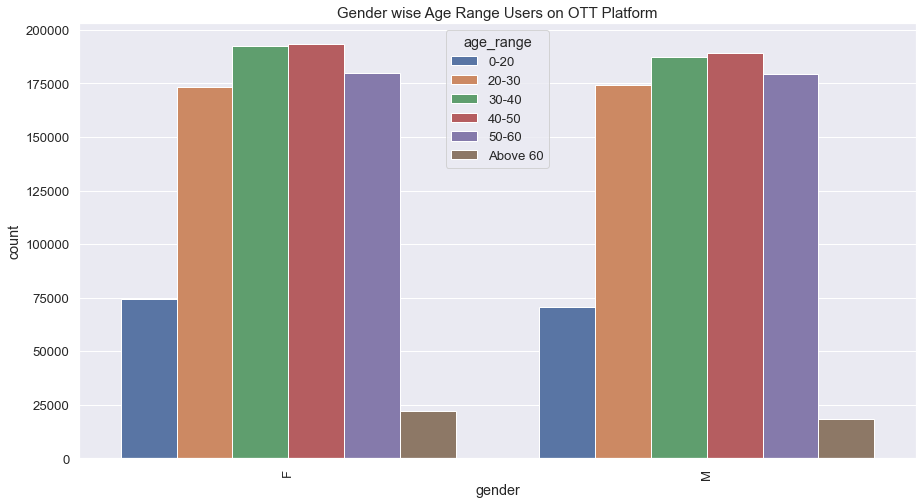

In [9]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Gender wise Age Range Users on OTT Platform", fontsize=15)
hue_order = ['0-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']
sns.countplot(
    x='gender',
    hue='age_range',
    hue_order=hue_order,
    data=df_map,
)  #palette = 'magma')

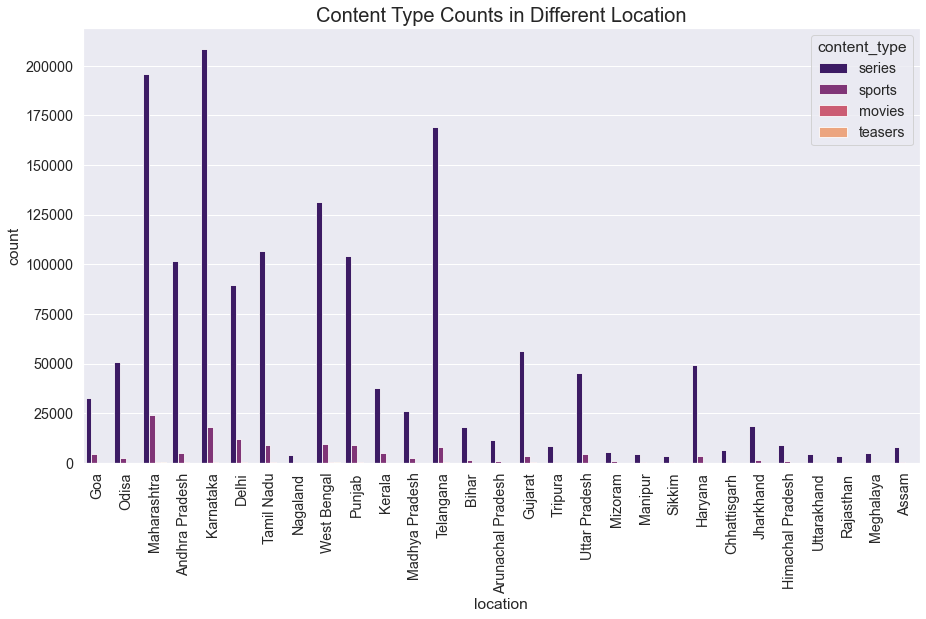

In [10]:
sns.set(font_scale=1.3)
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Content Type Counts in Different Location", fontsize=20)
sns.countplot(
    x='location',
    hue='content_type',
    data=df_map,
    palette='magma',
    linewidth=0.8,
)

In [11]:
df_map['content_type'].value_counts()

series     1517727
sports      129778
movies        5158
teasers       1787
Name: content_type, dtype: int64

hindi        566153
english      545066
telugu       166543
kannada      108613
tamil         60283
bengali       58872
marathi       42934
malayalam     36486
punjabi       30805
gujarati      24041
oriya         14654
Name: language, dtype: int64


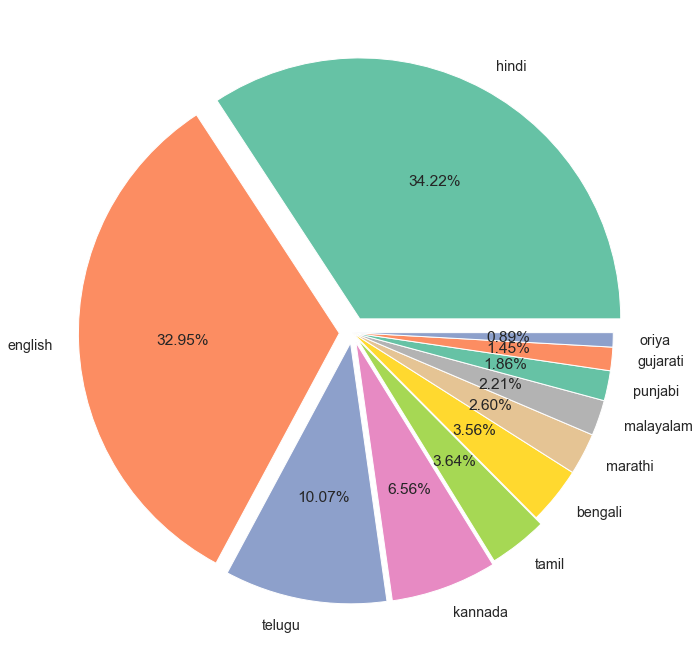

In [12]:
print(df_map['language'].value_counts())
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(df_map['language'].value_counts(),
        labels=df_map['language'].value_counts().keys(),
        colors=colors,
        autopct='%2.2f%%',
        explode=(0.06, 0.05, 0.04, 0.04, 0.03, 0, 0, 0, 0, 0, 0))
plt.show()

In [13]:
df_map['genre'].value_counts().keys()

Index(['drama', 'comedy', 'action', 'horror', 'cricket', 'documentary',
       'sci-fi', 'football', 'basketball', 'badminton', 'tennis', 'hockey',
       'family', 'crime', 'biography', 'fantasy', 'adventure', 'animation',
       'thriller', 'sport', 'musical', 'mystery'],
      dtype='object')

drama          735321
comedy         341569
action         249999
horror          78735
cricket         77584
documentary     62745
sci-fi          52353
football        26200
Others          16950
basketball      12994
Name: genre, dtype: int64


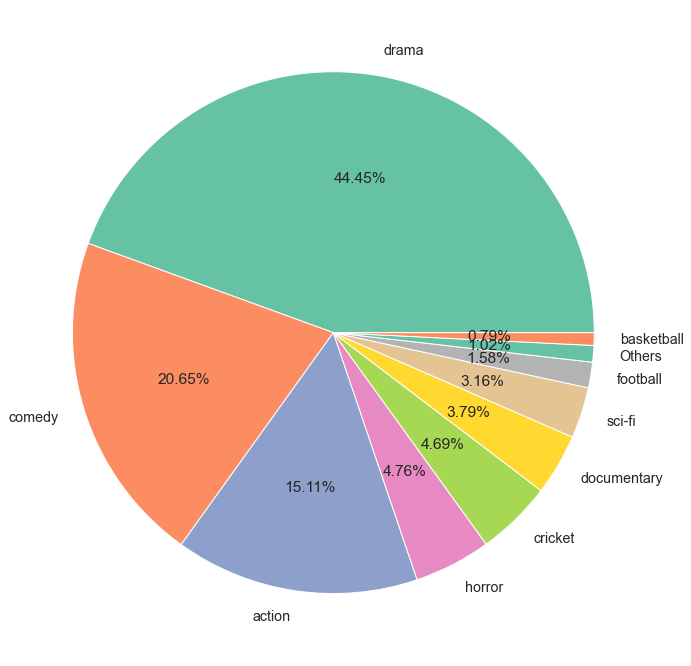

In [14]:
d_genere_map=df_map['genre'].map({'drama':'drama', 'comedy':'comedy', 'action':'action', 'horror':'horror', 'cricket':'cricket',\
                           'documentary':'documentary','sci-fi':'sci-fi', 'football':'football', 'basketball':'basketball',\
                           'badminton':'Others', 'tennis':'Others','hockey':'Others','family':'Others', 'crime':'Others', \
                           'biography':'Others', 'fantasy':'Others', 'adventure':'Others', 'animation':'Others',\
                           'thriller':'Others', 'sport':'Others', 'musical':'Others', 'mystery':'Others'})
print(d_genere_map.value_counts())
colors = sns.color_palette('Set2')[0:10]
plt.figure(figsize=(20, 12))
plt.pie(d_genere_map.value_counts(),
        labels=d_genere_map.value_counts().keys(),
        colors=colors,
        autopct='%0.2f%%')
plt.show()

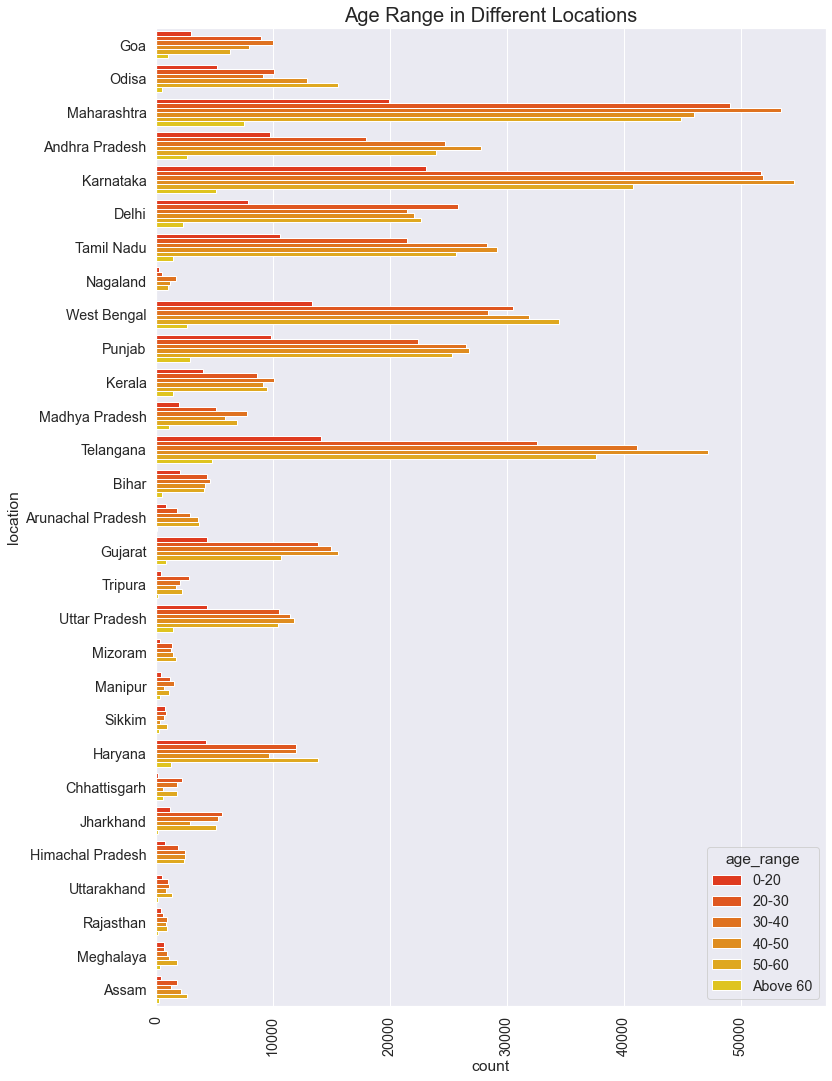

In [15]:
sns.set(font_scale=1.3)
plt.figure(figsize=(12, 18))
plt.xticks(rotation=90)
plt.title("Age Range in Different Locations", fontsize=20)
hue_order = ['0-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']
sns.countplot(
    y='location',
    hue='age_range',
    data=df_map,
    hue_order=hue_order,
    palette='autumn'

)

# **<span style="color:#ff4871;">Data Mapping and Processing</span>**

In [16]:
df_map['gender'] = df_map['gender'].map({'F': 0, 'M': 1})

In [17]:
location_map = {}
j = 1
for i in df_map['location'].value_counts().keys():
    location_map[i] = j
    j = j + 1

location_map

{'Karnataka': 1,
 'Maharashtra': 2,
 'Telangana': 3,
 'West Bengal': 4,
 'Tamil Nadu': 5,
 'Punjab': 6,
 'Andhra Pradesh': 7,
 'Delhi': 8,
 'Gujarat': 9,
 'Odisa': 10,
 'Haryana': 11,
 'Uttar Pradesh': 12,
 'Kerala': 13,
 'Goa': 14,
 'Madhya Pradesh': 15,
 'Jharkhand': 16,
 'Bihar': 17,
 'Arunachal Pradesh': 18,
 'Himachal Pradesh': 19,
 'Tripura': 20,
 'Assam': 21,
 'Chhattisgarh': 22,
 'Mizoram': 23,
 'Meghalaya': 24,
 'Manipur': 25,
 'Uttarakhand': 26,
 'Nagaland': 27,
 'Sikkim': 28,
 'Rajasthan': 29}

In [18]:
df_map['content_type'] = df_map['content_type'].map({
    'series': 1,
    'sports': 2,
    'movies': 3,
    'teasers': 4
})

In [19]:
language_map = {}
j = 1
for i in df_map['language'].value_counts().keys():
    language_map[i] = j
    j = j + 1
language_map

{'hindi': 1,
 'english': 2,
 'telugu': 3,
 'kannada': 4,
 'tamil': 5,
 'bengali': 6,
 'marathi': 7,
 'malayalam': 8,
 'punjabi': 9,
 'gujarati': 10,
 'oriya': 11}

In [20]:
df_map['language'] = df_map['language'].map(language_map)

In [21]:
genre_map = {}
j = 1
for i in df_map['genre'].value_counts().keys():
    genre_map[i] = j
    j = j + 1

genre_map

{'drama': 1,
 'comedy': 2,
 'action': 3,
 'horror': 4,
 'cricket': 5,
 'documentary': 6,
 'sci-fi': 7,
 'football': 8,
 'basketball': 9,
 'badminton': 10,
 'tennis': 11,
 'hockey': 12,
 'family': 13,
 'crime': 14,
 'biography': 15,
 'fantasy': 16,
 'adventure': 17,
 'animation': 18,
 'thriller': 19,
 'sport': 20,
 'musical': 21,
 'mystery': 22}

In [22]:
df_map['genre'] = df_map['genre'].map(genre_map)

In [23]:
df_map['joining_date'] = pd.to_datetime(df_map['joining_date'])
df_map['date'] = pd.to_datetime(df_map['date'])
df_map['release_date'] = pd.to_datetime(df_map['release_date'])

In [24]:
df_map['user_joined_days'] = (df_map['date'] - df_map['joining_date']).dt.days

In [25]:
df_map['movie_old_days'] = (df_map['date'] - df_map['release_date']).dt.days

In [26]:
df_map['percentage_watched'] = 1 - (
    df_map['duration_y'] - df_map['duration_x']) / df_map['duration_y']
df_map['percentage_watched']

0          0.725490
1          0.647059
2          0.843137
3          0.137255
4          0.450980
             ...   
1654445    0.576923
1654446    0.807692
1654447    0.173077
1654448    0.153846
1654449    0.730769
Name: percentage_watched, Length: 1654450, dtype: float64

In [27]:
df_map = df_map.drop(columns=[
    'duration_x', 'duration_y', 'start_time', 'end_time', 'release_date',
    'date', 'joining_date'
])

In [28]:
df_map

user_id  user_age  gender        location age_range  \
0        user_44289@domain.com        38       0             Goa     30-40   
1        user_29171@domain.com        46       1           Odisa     40-50   
2        user_91037@domain.com        16       0     Maharashtra      0-20   
3        user_78324@domain.com        53       0  Andhra Pradesh     50-60   
4        user_69522@domain.com        21       1       Karnataka     20-30   
...                        ...       ...     ...             ...       ...   
1654445  user_49924@domain.com        27       0         Gujarat     20-30   
1654446  user_49737@domain.com        52       0         Gujarat     50-60   
1654447  user_12003@domain.com        40       1         Gujarat     40-50   
1654448  user_72744@domain.com        25       0         Gujarat     20-30   
1654449  user_15652@domain.com        17       1         Gujarat      0-20   

              content_id  content_type  language  genre  rating  \
0        cont_3375_16_10             1         2      3       5   
1        cont_3375_16_10             1         2      3       5   
2        cont_3375_16_10             1         2      3       5   
3        cont_3375_16_10             1         2      3       5   
4        cont_3375_16_10             1         2      3       5   
...                  ...           ...       ...    ...     ...   
1654445     cont_103_3_4             1        10      1       9   
1654446     cont_103_3_4             1        10      1       9   
1654447     cont_103_3_4             1        10      1       9   
1654448     cont_103_3_4             1        10      1       9   
1654449     cont_103_3_4             1        10      1       9   

         episode_count  season_count  user_joined_days  movie_old_days  \
0                   10            16               639            1661   
1                   10            16               737            2047   
2                   10            16               158             868   
3                   10            16               992            1843   
4                   10            16               638            1960   
...                ...           ...               ...             ...   
1654445              4             3               706            8453   
1654446              4             3               263            7911   
1654447              4             3               144            7647   
1654448              4             3               286            8391   
1654449              4             3               192            8022   

         percentage_watched  
0                  0.725490  
1                  0.647059  
2                  0.843137  
3                  0.137255  
4                  0.450980  
...                     ...  
1654445            0.576923  
1654446            0.807692  
1654447            0.173077  
1654448            0.153846  
1654449            0.730769  

[1654450 rows x 15 columns]

In [29]:
def distplot(figRows,figCols,xSize, ySize, data, features, colors, kde=True, bins=None):
    f, axes = plt.subplots(figRows, figCols, figsize=(xSize, ySize))
    
    features = np.array(features).reshape(figRows, figCols)
    colors = np.array(colors).reshape(figRows, figCols)
    
    for row in range(figRows):
        for col in range(figCols):
            if (figRows == 1 and figCols == 1) :
                axesplt = axes
            elif (figRows == 1 and figCols > 1) :
                axesplt = axes[col]
            elif (figRows > 1 and figCols == 1) :
                axesplt = axes[row]
            else:
                axesplt = axes[row][col]
            plot = sns.histplot(data[features[row][col]], color=colors[row][col], bins=bins, ax=axesplt, kde=kde)
            plot.set_xlabel(features[row][col],fontsize=20)

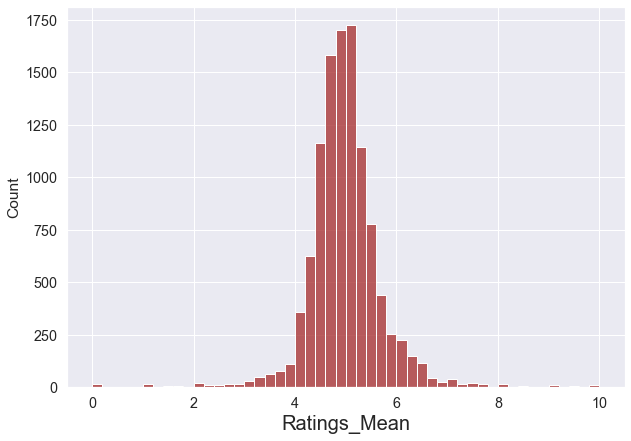

In [30]:
ratings = pd.DataFrame(df_map.groupby('user_id')['rating'].mean())
ratings.rename(columns={"rating": "Ratings_Mean"}, inplace=True)
distplot(1, 1, 10, 7, data=ratings, features=['Ratings_Mean'], colors=['brown'], kde=False, bins=50)

# <span style="color:#ff4871;">Observations</span>
This is a mean rating distribution grouped by all the movies watched.

As it can been seen from the plot, there are many products which were given a Rating of 4 to 6. Hence the plot shows lot of bins between 4 and 6.

# <span style="color:#ff4871;">Pivot Table for user interaction for content Based Filtering</span>

In [31]:
 df_map.pivot_table(index='user_id', columns='content_id', values='rating')

content_id             cont_1000_1_10  cont_1000_1_12  cont_1000_1_16  \
user_id                                                                 
user_10013@domain.com             NaN             NaN             NaN   
user_10034@domain.com             NaN             NaN             NaN   
user_10042@domain.com             NaN             NaN             NaN   
user_10052@domain.com             NaN             NaN             NaN   
user_10069@domain.com             NaN             NaN             NaN   
...                               ...             ...             ...   
user_99961@domain.com             NaN             NaN             NaN   
user_99962@domain.com             NaN             NaN             NaN   
user_99971@domain.com             NaN             NaN             NaN   
user_99972@domain.com             NaN             NaN             NaN   
user_99974@domain.com             NaN             NaN             NaN   

content_id             cont_1000_1_25  cont_1000_2_1  cont_1000_2_10  \
user_id                                                                
user_10013@domain.com             NaN            NaN             NaN   
user_10034@domain.com             NaN            NaN             NaN   
user_10042@domain.com             NaN            NaN             NaN   
user_10052@domain.com             NaN            NaN             NaN   
user_10069@domain.com             NaN            NaN             NaN   
...                               ...            ...             ...   
user_99961@domain.com             NaN            NaN             NaN   
user_99962@domain.com             NaN            NaN             NaN   
user_99971@domain.com             NaN            NaN             NaN   
user_99972@domain.com             NaN            NaN             NaN   
user_99974@domain.com             NaN            NaN             NaN   

content_id             cont_1000_2_13  cont_1000_2_18  cont_1000_3_1  \
user_id                                                                
user_10013@domain.com             NaN             NaN            NaN   
user_10034@domain.com             NaN             NaN            NaN   
user_10042@domain.com             NaN             NaN            NaN   
user_10052@domain.com             NaN             NaN            NaN   
user_10069@domain.com             NaN             NaN            NaN   
...                               ...             ...            ...   
user_99961@domain.com             NaN             NaN            NaN   
user_99962@domain.com             NaN             NaN            NaN   
user_99971@domain.com             NaN             NaN            NaN   
user_99972@domain.com             NaN             NaN            NaN   
user_99974@domain.com             NaN             NaN            NaN   

content_id             cont_1000_3_19  ...  cont_994_1_5  cont_996_1_5  \
user_id                                ...                               
user_10013@domain.com             NaN  ...           NaN           NaN   
user_10034@domain.com             NaN  ...           NaN           NaN   
user_10042@domain.com             NaN  ...           NaN           NaN   
user_10052@domain.com             NaN  ...           NaN           NaN   
user_10069@domain.com             NaN  ...           NaN           NaN   
...                               ...  ...           ...           ...   
user_99961@domain.com             NaN  ...           NaN           NaN   
user_99962@domain.com             NaN  ...           NaN           NaN   
user_99971@domain.com             NaN  ...           NaN           NaN   
user_99972@domain.com             NaN  ...           NaN           NaN   
user_99974@domain.com             NaN  ...           NaN           NaN   

content_id             cont_996_1_6  cont_996_1_7  cont_998_1_4  cont_999_1_6  \
user_id                                                                         
user_10013@domain.com           NaN           NaN  

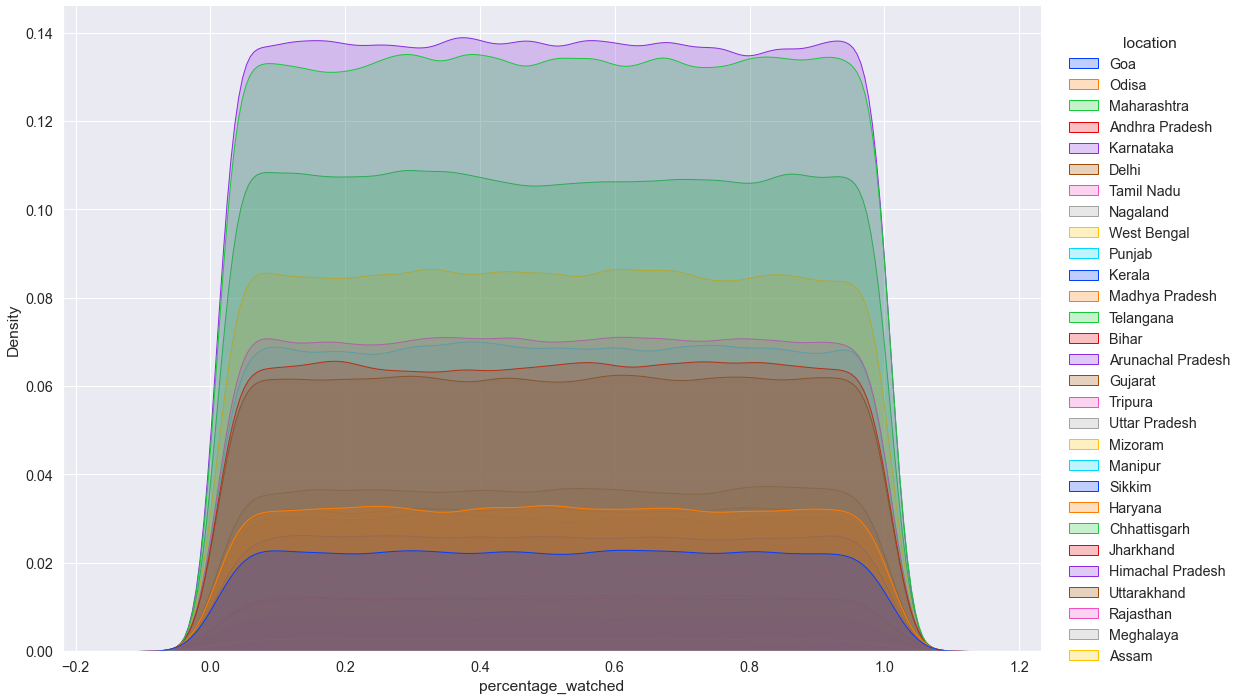

In [32]:
sns.displot(data=df_map, x='percentage_watched', hue='location', kind='kde', fill=True, height=10,palette=sns.color_palette('bright', n_colors=len(location_map)), aspect=1.5)# ""","""

Text(0.5, 0.98, 'Top 10 content watched in top 4 states Content Watched')

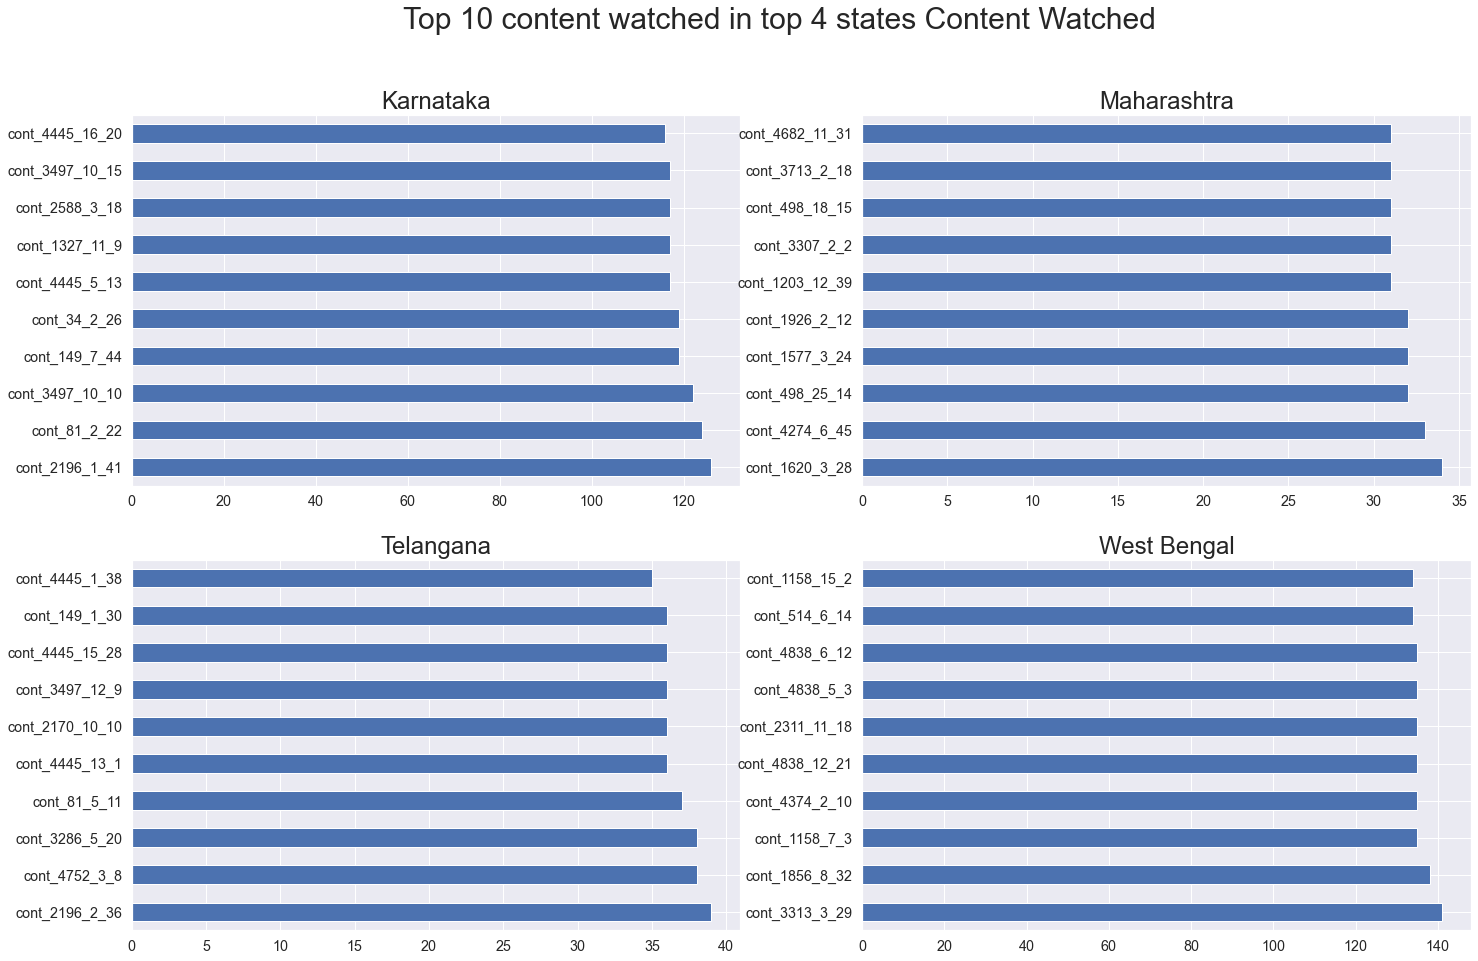

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=( 24,15))
df_map.groupby(['location']).get_group('Karnataka')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[0,0],)
axes[0,0].set_title('Karnataka', size=24)
df_map.groupby(['location']).get_group('Maharashtra')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[0,1])
axes[0,1].set_title('Maharashtra', size=24)
df_map.groupby(['location']).get_group('Telangana')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[1,0])
axes[1,0].set_title('Telangana', size=24)
df_map.groupby(['location']).get_group('West Bengal')['content_id'].value_counts()[0:10].plot(kind = 'barh',ax=axes[1,1])
axes[1,1].set_title('West Bengal', size=24)

fig.suptitle('Top 10 content watched in top 4 states Content Watched' , size=30)

In [34]:
df_map['location'] = df_map['location'].map(location_map)

In [35]:
df_map['content_id'].value_counts()

cont_3497_10_10    184
cont_81_2_22       181
cont_208_10_3      178
cont_2196_2_36     177
cont_4445_15_28    176
                  ... 
cont_678_8_31        7
cont_2237_7_10       6
cont_678_9_6         6
cont_3420_10_19      6
cont_2722_9_24       5
Name: content_id, Length: 44223, dtype: int64

In [36]:
df_map.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1654450 entries, 0 to 1654449
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   user_id             1654450 non-null  object 
 1   user_age            1654450 non-null  int64  
 2   gender              1654450 non-null  int64  
 3   location            1654450 non-null  int64  
 4   age_range           1654450 non-null  object 
 5   content_id          1654450 non-null  object 
 6   content_type        1654450 non-null  int64  
 7   language            1654450 non-null  int64  
 8   genre               1654450 non-null  int64  
 9   rating              1654450 non-null  int64  
 10  episode_count       1654450 non-null  int64  
 11  season_count        1654450 non-null  int64  
 12  user_joined_days    1654450 non-null  int64  
 13  movie_old_days      1654450 non-null  int64  
 14  percentage_watched  1654450 non-null  float64
dtypes: float64(1), 

In [37]:
df_test

user_id
0     user_18085@domain.com
1     user_16044@domain.com
2     user_13110@domain.com
3     user_18909@domain.com
4     user_15509@domain.com
...                     ...
1435   user_1609@domain.com
1436  user_13422@domain.com
1437  user_85709@domain.com
1438  user_10393@domain.com
1439  user_13498@domain.com

[1440 rows x 1 columns]

In [38]:
df_test_map = pd.merge(df_test, df_user, on='user_id')
df_test_map

user_id  user_age gender     location joining_date  \
0     user_18085@domain.com        40      M    Telangana   2018-12-08   
1     user_16044@domain.com        43      F        Odisa   2017-10-13   
2     user_13110@domain.com        46      F  West Bengal   2018-10-21   
3     user_18909@domain.com        32      F          Goa   2019-01-05   
4     user_15509@domain.com        31      F  Maharashtra   2020-04-26   
...                     ...       ...    ...          ...          ...   
1435   user_1609@domain.com        38      M       Punjab   2018-03-17   
1436  user_13422@domain.com        43      M       Punjab   2018-04-02   
1437  user_85709@domain.com        59      F        Delhi   2019-01-18   
1438  user_10393@domain.com        59      M    Karnataka   2020-09-18   
1439  user_13498@domain.com        44      F   Tamil Nadu   2020-05-21   

     age_range  
0        40-50  
1        40-50  
2        40-50  
3        30-40  
4        30-40  
...        ...  
1435     30-40  
1436     40-50  
1437     50-60  
1438     50-60  
1439     40-50  

[1440 rows x 6 columns]

In [39]:
df_test_map['gender'] = df_test_map['gender'].map({'F': 0, 'M': 1})

df_test_map['location'] = df_test_map['location'].map(location_map)

df_test_map["age_range"] = df_test_map.apply(age_range_fn, axis=1)

df_test_map

user_id  user_age  gender  location joining_date age_range
0     user_18085@domain.com        40       1         3   2018-12-08     40-50
1     user_16044@domain.com        43       0        10   2017-10-13     40-50
2     user_13110@domain.com        46       0         4   2018-10-21     40-50
3     user_18909@domain.com        32       0        14   2019-01-05     30-40
4     user_15509@domain.com        31       0         2   2020-04-26     30-40
...                     ...       ...     ...       ...          ...       ...
1435   user_1609@domain.com        38       1         6   2018-03-17     30-40
1436  user_13422@domain.com        43       1         6   2018-04-02     40-50
1437  user_85709@domain.com        59       0         8   2019-01-18     50-60
1438  user_10393@domain.com        59       1         1   2020-09-18     50-60
1439  user_13498@domain.com        44       0         5   2020-05-21     40-50

[1440 rows x 6 columns]

In [40]:
%%time
def combined_features(row):
    return [
        row['user_age'], row['gender'], row['location'], row['content_type'],
        row['language'], row["genre"], row['rating'], row['episode_count'],
        row["season_count"], row['user_joined_days'], row['movie_old_days'],
        row["percentage_watched"]
    ]


df_map["combined_features"] = df_map.apply(combined_features, axis=1)

Wall time: 2min 54s


In [41]:
%%time
list_test = []
for i in tqdm(df_test['user_id']):
    list_test.extend(list(df_map[df_map['user_id'] == i].index))
pprint(list(list_test))

  0%|          | 0/1440 [00:00<?, ?it/s]

[45227,
 58430,
 60310,
 61681,
 164551,
 167979,
 171425,
 174977,
 252368,
 255612,
 256618,
 257169,
 257976,
 260260,
 260525,
 261371,
 261711,
 263726,
 264189,
 265995,
 268177,
 271005,
 271149,
 271531,
 276229,
 276230,
 280720,
 283405,
 284859,
 289133,
 293873,
 295277,
 298511,
 298798,
 300348,
 302623,
 319513,
 322324,
 323170,
 325068,
 329741,
 331661,
 332448,
 333023,
 333869,
 334607,
 338352,
 354800,
 355541,
 358009,
 358254,
 360223,
 360461,
 378193,
 379024,
 380852,
 382917,
 383062,
 383969,
 410427,
 413309,
 420209,
 513169,
 515906,
 516186,
 517205,
 518210,
 550878,
 551495,
 553070,
 554789,
 556464,
 560800,
 561374,
 561887,
 562251,
 562633,
 563141,
 589834,
 591549,
 644611,
 732494,
 763714,
 764621,
 765144,
 800581,
 859318,
 875155,
 876689,
 914860,
 915699,
 918318,
 918520,
 918849,
 918959,
 921945,
 922321,
 922444,
 922618,
 932122,
 963634,
 965815,
 966363,
 968824,
 969134,
 970161,
 970552,
 991866,
 992687,
 995876,
 997228,
 9974

 1433047,
 1438209,
 1440180,
 1451053,
 1470986,
 1480729,
 1485681,
 1491849,
 1492860,
 1496315,
 1497431,
 1497701,
 1505811,
 1506406,
 1512386,
 1513367,
 1514960,
 1518688,
 1523143,
 1533812,
 1535968,
 1538844,
 1554757,
 1555067,
 1555592,
 1556068,
 1567121,
 1572815,
 1612345,
 1615268,
 1632162,
 1633739,
 1648245,
 270,
 1770,
 2786,
 4246,
 7713,
 8308,
 8815,
 9527,
 11360,
 13976,
 15098,
 25870,
 28537,
 29259,
 30095,
 30840,
 31492,
 33783,
 37637,
 80237,
 83132,
 84210,
 88939,
 92770,
 107180,
 140180,
 147040,
 148229,
 150447,
 153592,
 155244,
 160705,
 160791,
 161805,
 169894,
 173602,
 175637,
 176871,
 180175,
 194864,
 198173,
 200335,
 200802,
 221512,
 225951,
 246950,
 249684,
 253201,
 254616,
 270407,
 277920,
 278600,
 281815,
 282806,
 287869,
 288906,
 295802,
 296137,
 303464,
 304476,
 305297,
 340885,
 343125,
 343810,
 361086,
 362244,
 376310,
 377343,
 378713,
 378924,
 380335,
 383913,
 384317,
 401018,
 402468,
 406479,
 407590,
 414159,
 

 600880,
 612715,
 618818,
 625796,
 651488,
 659749,
 662936,
 677114,
 680157,
 684612,
 686286,
 688033,
 688921,
 694298,
 694648,
 701818,
 706853,
 719415,
 721192,
 725575,
 746393,
 747134,
 750460,
 754761,
 756863,
 761074,
 775360,
 776855,
 780516,
 781244,
 786188,
 791905,
 793695,
 802972,
 808204,
 810070,
 810600,
 815694,
 818995,
 822098,
 833183,
 841472,
 847576,
 855534,
 865938,
 882542,
 885156,
 889254,
 889477,
 892047,
 898911,
 911468,
 932633,
 943350,
 944280,
 947692,
 948213,
 952501,
 952560,
 955153,
 972002,
 977652,
 979772,
 983733,
 988282,
 997805,
 1005044,
 1005838,
 1008642,
 1010152,
 1011495,
 1019419,
 1020160,
 1032488,
 1032552,
 1037941,
 1043824,
 1044122,
 1054245,
 1054750,
 1060975,
 1061980,
 1062096,
 1062383,
 1065559,
 1087288,
 1089241,
 1092101,
 1112032,
 1115175,
 1135359,
 1135949,
 1139057,
 1150268,
 1150658,
 1159863,
 1167325,
 1167866,
 1176931,
 1188900,
 1202206,
 1207751,
 1209984,
 1220901,
 1225242,
 1225568,
 12257

 165539,
 165672,
 166032,
 175487,
 184668,
 185358,
 186397,
 189254,
 203891,
 205803,
 260854,
 260996,
 262465,
 269587,
 270326,
 289933,
 291872,
 295523,
 296505,
 317089,
 318324,
 319599,
 320895,
 322696,
 324219,
 326543,
 327986,
 332522,
 333098,
 333634,
 333993,
 336616,
 338386,
 338828,
 343950,
 350583,
 350706,
 351603,
 354825,
 357851,
 357883,
 360756,
 367653,
 372713,
 401554,
 404808,
 409144,
 413578,
 416530,
 473790,
 489369,
 504831,
 511648,
 514958,
 526535,
 530679,
 538858,
 545664,
 550157,
 553506,
 558793,
 560794,
 561505,
 562455,
 578566,
 584646,
 585534,
 590065,
 590775,
 642015,
 660457,
 668990,
 669056,
 669162,
 669518,
 669804,
 669843,
 669919,
 669958,
 670181,
 670609,
 670656,
 670706,
 670876,
 670966,
 671442,
 671486,
 671536,
 671611,
 671719,
 672470,
 673501,
 673739,
 674206,
 674609,
 674967,
 675113,
 675149,
 675261,
 675385,
 675616,
 687459,
 711393,
 722947,
 740359,
 741119,
 741372,
 741569,
 741640,
 741756,
 741804,
 

 98533,
 104787,
 109423,
 118160,
 118507,
 136714,
 163490,
 181797,
 190293,
 200437,
 200699,
 201638,
 204055,
 204157,
 204424,
 205212,
 205607,
 274949,
 308219,
 348879,
 365792,
 366411,
 367345,
 368643,
 369293,
 370034,
 370424,
 370610,
 371328,
 371543,
 372051,
 372338,
 372402,
 372768,
 373058,
 373594,
 373811,
 373945,
 374157,
 374493,
 395521,
 399841,
 402666,
 408726,
 428408,
 429065,
 476052,
 485053,
 488407,
 494992,
 495155,
 495461,
 495641,
 495978,
 496116,
 496540,
 496606,
 496806,
 496970,
 497198,
 497407,
 497490,
 497757,
 499086,
 499579,
 499927,
 500061,
 500492,
 500827,
 500900,
 501457,
 501524,
 501771,
 501921,
 503007,
 503347,
 503424,
 503509,
 503746,
 503816,
 503927,
 504184,
 504606,
 504714,
 504967,
 505033,
 505098,
 505435,
 505764,
 506091,
 506916,
 507258,
 507431,
 530005,
 578994,
 579390,
 579854,
 612446,
 615521,
 615928,
 616456,
 617483,
 618900,
 619153,
 619249,
 619324,
 619785,
 620589,
 621240,
 621644,
 622035,
 6

 538892,
 548337,
 548386,
 549860,
 560147,
 560643,
 561698,
 561968,
 562004,
 564831,
 566620,
 568044,
 568181,
 570130,
 572412,
 575727,
 576480,
 588957,
 591533,
 610598,
 624675,
 638907,
 641355,
 644086,
 655172,
 660773,
 686537,
 688716,
 690222,
 692818,
 692885,
 697883,
 698984,
 716225,
 719301,
 719736,
 726018,
 750779,
 752907,
 753252,
 754416,
 757016,
 762096,
 763593,
 763764,
 763853,
 769546,
 775525,
 780711,
 796987,
 797468,
 803312,
 806053,
 813361,
 820201,
 828890,
 838285,
 838938,
 848197,
 852756,
 858457,
 859632,
 865099,
 865730,
 865815,
 868053,
 877031,
 877231,
 881380,
 884838,
 885428,
 899911,
 909871,
 911355,
 921651,
 924338,
 925063,
 935591,
 939977,
 946101,
 947783,
 948025,
 951062,
 951140,
 964282,
 964835,
 965551,
 968520,
 969174,
 969835,
 970299,
 980119,
 990646,
 995182,
 996468,
 1004808,
 1005470,
 1006338,
 1009723,
 1010702,
 1011971,
 1025297,
 1025611,
 1025957,
 1031523,
 1033870,
 1035340,
 1035709,
 1036020,
 1037

 540700,
 542066,
 546607,
 546858,
 549459,
 565452,
 566575,
 569956,
 570221,
 570513,
 571339,
 571667,
 572300,
 572827,
 574611,
 575742,
 576311,
 577252,
 577364,
 577568,
 596474,
 611062,
 611890,
 613050,
 613051,
 613724,
 618001,
 622674,
 635329,
 635957,
 637969,
 639201,
 641588,
 642276,
 644868,
 647352,
 649169,
 649898,
 650433,
 651633,
 652161,
 652226,
 652887,
 652958,
 653552,
 653802,
 657165,
 657615,
 659592,
 660508,
 661767,
 662348,
 663058,
 665477,
 665550,
 666055,
 666184,
 666316,
 666443,
 666606,
 676795,
 677275,
 677807,
 680755,
 680984,
 686454,
 687706,
 688278,
 689668,
 689961,
 690839,
 693037,
 693982,
 694535,
 694963,
 695751,
 696429,
 696544,
 696794,
 701642,
 701739,
 703988,
 704329,
 711053,
 712435,
 712483,
 716681,
 716961,
 721079,
 722654,
 725262,
 751602,
 753133,
 755232,
 757585,
 758617,
 759247,
 761302,
 770879,
 771868,
 773912,
 774079,
 774322,
 774521,
 774737,
 775303,
 782377,
 784765,
 784965,
 786633,
 791467,
 

 1332333,
 1349450,
 1365818,
 1371555,
 1379865,
 1388046,
 1391735,
 1397286,
 1418658,
 1438400,
 1438475,
 1438517,
 1438741,
 1439530,
 1439840,
 1446527,
 1453249,
 1453277,
 1453467,
 1453549,
 1453873,
 1459078,
 1459561,
 1460209,
 1460343,
 1461613,
 1462817,
 1464589,
 1502409,
 1502484,
 1502716,
 1502736,
 1503068,
 1506766,
 1515403,
 1515476,
 1518550,
 1529911,
 1532536,
 1532585,
 1534415,
 1537909,
 1540896,
 1540939,
 1541299,
 1542299,
 1543761,
 1543859,
 1543877,
 1543942,
 1544045,
 1544065,
 1544086,
 1544135,
 1544866,
 1554257,
 1554526,
 1554857,
 1554874,
 1555016,
 1555031,
 1555374,
 1555577,
 1561373,
 1561438,
 1561670,
 1561772,
 1561789,
 1561986,
 1562131,
 1562475,
 1567793,
 1573658,
 1579249,
 1579290,
 1579366,
 1579410,
 1583859,
 1583935,
 1584027,
 1584088,
 1589109,
 1590668,
 1599176,
 1599196,
 1599261,
 1606837,
 1606902,
 1610183,
 1610248,
 1610741,
 1616924,
 1625868,
 1625989,
 1636795,
 1636924,
 1639630,
 1642817,
 1645228,
 1645359,


 40271,
 40606,
 41217,
 41218,
 41368,
 41515,
 41843,
 42722,
 43818,
 44171,
 44520,
 44683,
 45307,
 45308,
 45596,
 45597,
 46895,
 46896,
 47057,
 47377,
 47537,
 48622,
 48797,
 63538,
 63682,
 64014,
 64180,
 64458,
 64769,
 65499,
 66205,
 66830,
 67279,
 67428,
 67884,
 67885,
 68087,
 68252,
 68815,
 68990,
 69156,
 69432,
 69728,
 70173,
 70174,
 70320,
 70321,
 70758,
 71753,
 72208,
 72720,
 73027,
 73199,
 73200,
 74064,
 74212,
 74495,
 74655,
 74948,
 75242,
 75839,
 76141,
 77012,
 83204,
 83284,
 87432,
 171812,
 172277,
 206937,
 207489,
 207928,
 208375,
 209408,
 209409,
 210092,
 210236,
 210699,
 211824,
 212135,
 212270,
 213573,
 213722,
 215110,
 216419,
 216791,
 218265,
 218416,
 218750,
 218751,
 218901,
 219441,
 219613,
 219826,
 220240,
 220241,
 221416,
 221638,
 221933,
 223181,
 223510,
 223747,
 225011,
 225236,
 225485,
 226064,
 227136,
 227833,
 228255,
 229442,
 229847,
 230098,
 230792,
 231088,
 231529,
 231931,
 232593,
 232733,
 234255,
 235

 96632,
 99531,
 104908,
 111288,
 113646,
 140770,
 151019,
 179570,
 180105,
 181039,
 189768,
 205491,
 306610,
 316520,
 320134,
 322286,
 348546,
 402543,
 406475,
 410041,
 436162,
 438623,
 477286,
 487367,
 491373,
 501293,
 506577,
 519995,
 539904,
 546453,
 548215,
 625624,
 632228,
 637215,
 660576,
 661230,
 679097,
 681973,
 687297,
 718647,
 738771,
 751781,
 767924,
 769074,
 769727,
 771728,
 773980,
 789279,
 789638,
 796446,
 806945,
 809384,
 814835,
 817374,
 817779,
 837348,
 841060,
 841923,
 864780,
 869456,
 881117,
 889897,
 902781,
 943133,
 958542,
 977354,
 982901,
 985175,
 985861,
 988528,
 990805,
 1007228,
 1008532,
 1019831,
 1020819,
 1039810,
 1042033,
 1042282,
 1056624,
 1075974,
 1076237,
 1083242,
 1088163,
 1091030,
 1091310,
 1116380,
 1132771,
 1135012,
 1147836,
 1150537,
 1150668,
 1150806,
 1150870,
 1151995,
 1160145,
 1161734,
 1162456,
 1170901,
 1177856,
 1181315,
 1182532,
 1210372,
 1219963,
 1223110,
 1223759,
 1227836,
 1231080,
 12

 1180346,
 1191779,
 1222677,
 1267098,
 1270860,
 1283038,
 1285981,
 1317344,
 1340249,
 1364393,
 1365646,
 1373924,
 1375708,
 1384665,
 1385162,
 1402066,
 1413584,
 1418964,
 1436870,
 1440360,
 1457615,
 1460414,
 1461988,
 1463217,
 1466731,
 1472491,
 1496367,
 1497852,
 1498257,
 1508999,
 1517587,
 1537539,
 1540521,
 1546613,
 1547506,
 1558306,
 1590084,
 1603689,
 1613035,
 1614359,
 1629806,
 100398,
 103577,
 103686,
 105753,
 105786,
 108118,
 115541,
 118547,
 179039,
 188059,
 196025,
 201362,
 405727,
 405816,
 410190,
 410713,
 430691,
 432191,
 432459,
 473140,
 475623,
 485057,
 501963,
 530120,
 659093,
 661072,
 687119,
 710370,
 740791,
 740874,
 769799,
 775151,
 776796,
 811714,
 821244,
 821274,
 830584,
 866985,
 869931,
 873002,
 892813,
 903131,
 925853,
 928385,
 929880,
 974574,
 975414,
 988652,
 999001,
 999140,
 1001619,
 1009141,
 1021430,
 1082721,
 1088296,
 1088432,
 1093174,
 1119835,
 1120448,
 1132079,
 1132802,
 1147856,
 1148531,
 1150767,


 629229,
 630402,
 630937,
 631373,
 631989,
 658526,
 683420,
 692053,
 692991,
 716772,
 720045,
 729328,
 731770,
 733223,
 733948,
 734097,
 735382,
 753000,
 755180,
 783667,
 790780,
 793501,
 794409,
 820025,
 831966,
 833087,
 851527,
 871465,
 875633,
 878830,
 880760,
 895845,
 912338,
 919330,
 920546,
 921713,
 923010,
 936496,
 938313,
 958318,
 963030,
 964443,
 993395,
 1018156,
 1060689,
 1072080,
 1073851,
 1078657,
 1079444,
 1108779,
 1140140,
 1156795,
 1178236,
 1178395,
 1178455,
 1178492,
 1178565,
 1178634,
 1178678,
 1178743,
 1178806,
 1178880,
 1179011,
 1179072,
 1179136,
 1179172,
 1179266,
 1179337,
 1179467,
 1179520,
 1179570,
 1179603,
 1179751,
 1179817,
 43319,
 48140,
 65762,
 67576,
 72363,
 76698,
 96842,
 177285,
 202079,
 206721,
 221407,
 223735,
 225217,
 229277,
 286511,
 332763,
 375661,
 376073,
 383660,
 405282,
 440547,
 472787,
 519706,
 559720,
 559850,
 562936,
 596538,
 599263,
 600517,
 602697,
 603367,
 633212,
 671824,
 710410,
 729

 502793,
 503478,
 579827,
 646127,
 683275,
 719171,
 739626,
 748622,
 749516,
 938662,
 939658,
 941086,
 986229,
 991285,
 1020986,
 1092678,
 1193327,
 1240909,
 1280810,
 1305130,
 1362208,
 1470707,
 1479177,
 1592448,
 1598363,
 3626,
 4702,
 8607,
 13565,
 15540,
 20260,
 51450,
 52303,
 53904,
 56437,
 57207,
 88932,
 89003,
 91363,
 92359,
 93635,
 109805,
 145795,
 151185,
 155065,
 158889,
 159435,
 166813,
 166873,
 167430,
 167538,
 169139,
 223052,
 230642,
 231639,
 239113,
 245120,
 245758,
 246675,
 247733,
 247754,
 266871,
 281685,
 282678,
 289736,
 292324,
 293929,
 294505,
 298990,
 303064,
 303858,
 346394,
 380485,
 385307,
 415111,
 418005,
 420404,
 422456,
 425349,
 427549,
 427745,
 442632,
 445871,
 464365,
 466197,
 471112,
 510416,
 521472,
 521825,
 526927,
 527323,
 528293,
 533159,
 534056,
 541831,
 544651,
 546484,
 547819,
 548493,
 564648,
 565329,
 571484,
 572191,
 576263,
 640058,
 643819,
 645094,
 653430,
 656785,
 657699,
 658411,
 676675,


 59276,
 61339,
 79549,
 84523,
 85684,
 90365,
 91970,
 95277,
 111125,
 111925,
 145291,
 153003,
 164332,
 169608,
 169777,
 170379,
 171459,
 174156,
 174488,
 226748,
 244732,
 245331,
 247827,
 248825,
 252105,
 252422,
 253625,
 253682,
 254535,
 254786,
 255135,
 256363,
 259054,
 259841,
 260679,
 261954,
 263655,
 265125,
 265126,
 265266,
 266481,
 267689,
 270592,
 271371,
 275578,
 280158,
 283459,
 283988,
 286225,
 297084,
 299572,
 300481,
 301047,
 305119,
 308174,
 318515,
 321804,
 322657,
 322853,
 323090,
 324215,
 326356,
 326745,
 327188,
 327507,
 327508,
 327748,
 329188,
 330726,
 331601,
 332671,
 332976,
 333214,
 333404,
 333631,
 333718,
 333832,
 335374,
 335707,
 336531,
 337060,
 338346,
 339328,
 339717,
 339786,
 347759,
 351156,
 352515,
 353882,
 354422,
 356676,
 357525,
 358878,
 359687,
 359763,
 361553,
 361862,
 361901,
 362877,
 363444,
 364638,
 379390,
 380292,
 403498,
 410630,
 411051,
 413650,
 418062,
 421352,
 427861,
 443393,
 444510,


 1437090,
 1437793,
 1440949,
 1441039,
 1441274,
 1441439,
 1441640,
 1441661,
 1441846,
 1441941,
 1442406,
 1451724,
 1451746,
 1505978,
 1506240,
 1517014,
 1545214,
 1545496,
 1556735,
 1557126,
 1557365,
 1577041,
 1577149,
 1577223,
 1580538,
 1580828,
 1584986,
 1585174,
 1599364,
 1599812,
 1606667,
 1619739,
 1619845,
 1619920,
 1619987,
 1620162,
 1620193,
 1620265,
 1620356,
 1620464,
 1620517,
 1621247,
 1621264,
 1621281,
 1621303,
 1621332,
 1621349,
 1621375,
 1621399,
 1621426,
 1621453,
 1621477,
 1621510,
 1621527,
 1621539,
 1621561,
 1621583,
 1621596,
 1621618,
 1621641,
 1621672,
 1621695,
 1621722,
 1621739,
 1621758,
 1621780,
 1621802,
 1621826,
 1621841,
 1621865,
 1621881,
 1621899,
 1621925,
 1621942,
 3349,
 9233,
 11880,
 12900,
 12901,
 13892,
 14234,
 16987,
 17872,
 18635,
 19886,
 21266,
 24756,
 27226,
 28347,
 29247,
 29885,
 31935,
 33349,
 49595,
 50716,
 51513,
 52026,
 54776,
 55809,
 57529,
 58894,
 61864,
 62875,
 80947,
 87465,
 88999,
 93095

 817440,
 836418,
 842411,
 877446,
 904694,
 909283,
 927834,
 954150,
 971884,
 972260,
 976116,
 978597,
 984041,
 989761,
 1002777,
 1004344,
 1022309,
 1044093,
 1063663,
 1092979,
 1112465,
 1135532,
 1147076,
 1162445,
 1162717,
 1182012,
 1191633,
 1192758,
 1199810,
 1218561,
 1226301,
 1231840,
 1234456,
 1241158,
 1242930,
 1242999,
 1264350,
 1272212,
 1314884,
 1319946,
 1323680,
 1323709,
 1328042,
 1329059,
 1343538,
 1345158,
 1349468,
 1380564,
 1420645,
 1421575,
 1433460,
 1438667,
 1479364,
 1480863,
 1509755,
 1516784,
 1523033,
 1546389,
 1549545,
 1561049,
 1593056,
 1613302,
 1615271,
 1623680,
 1623734,
 1652635,
 1654070,
 5432,
 9848,
 10920,
 12080,
 14621,
 18493,
 28830,
 31537,
 34497,
 36860,
 53815,
 80814,
 86918,
 88060,
 92288,
 94523,
 106925,
 143213,
 150503,
 158315,
 172694,
 214300,
 215410,
 239214,
 251140,
 270721,
 280227,
 281320,
 282787,
 293267,
 303359,
 305682,
 386510,
 423363,
 427731,
 511474,
 520333,
 523209,
 523723,
 526501,
 5

 858695,
 866283,
 868734,
 869639,
 875309,
 875842,
 878013,
 880527,
 880579,
 882509,
 883664,
 889993,
 898951,
 906488,
 910550,
 919917,
 928765,
 932254,
 932509,
 938457,
 946326,
 956244,
 963574,
 967627,
 968228,
 971604,
 986089,
 988733,
 989752,
 990586,
 991664,
 994363,
 994905,
 995052,
 996623,
 996757,
 997353,
 1000335,
 1002338,
 1007113,
 1015966,
 1020771,
 1021105,
 1030926,
 1038211,
 1045803,
 1050318,
 1050841,
 1054389,
 1055029,
 1057925,
 1082599,
 1084609,
 1094906,
 1098385,
 1098913,
 1099388,
 1102815,
 1103270,
 1103801,
 1105874,
 1105916,
 1106857,
 1109413,
 1110229,
 1124226,
 1131504,
 1140550,
 1141301,
 1143376,
 1152397,
 1152774,
 1156112,
 1157901,
 1161345,
 1164018,
 1164961,
 1181224,
 1184329,
 1188002,
 1189935,
 1190839,
 1192491,
 1199950,
 1212540,
 1227039,
 1230461,
 1231293,
 1233889,
 1247817,
 1259903,
 1272797,
 1273849,
 1274912,
 1275135,
 1275790,
 1282054,
 1289980,
 1292877,
 1293976,
 1313961,
 1317497,
 1320412,
 133651

 1227808,
 1248447,
 1250688,
 1257662,
 1280605,
 1295031,
 1295083,
 1306927,
 1311402,
 1323977,
 1339662,
 1375315,
 1376323,
 1386182,
 1392545,
 1407346,
 1408280,
 1418562,
 1447665,
 1456086,
 1459391,
 1476020,
 1485724,
 1494870,
 1510815,
 1524329,
 1537988,
 1539875,
 1542928,
 1543505,
 1568734,
 1605352,
 1609648,
 1611888,
 1625100,
 1625125,
 1625143,
 1625162,
 1625179,
 1625213,
 5827,
 60569,
 162606,
 260314,
 275829,
 278594,
 362680,
 569908,
 652382,
 681569,
 689838,
 698411,
 761452,
 801833,
 871289,
 876079,
 983197,
 983773,
 1025080,
 1027162,
 1043734,
 1114040,
 1235676,
 1280482,
 1301297,
 1358632,
 1523237,
 1555954,
 1558924,
 1610804,
 54739,
 63455,
 98690,
 102393,
 103212,
 104363,
 104414,
 114884,
 118102,
 135374,
 143820,
 163900,
 165768,
 176650,
 180453,
 181681,
 184235,
 187553,
 189221,
 200427,
 203241,
 203782,
 204148,
 204419,
 204540,
 205104,
 206402,
 215570,
 241562,
 319999,
 346260,
 365361,
 365787,
 366071,
 366494,
 366738,


 1372911,
 1382541,
 1409783,
 1410501,
 1432227,
 1444011,
 1446584,
 1448922,
 1452642,
 1465174,
 1465951,
 1467161,
 1467581,
 1476694,
 1477103,
 1477781,
 1488355,
 1488687,
 1495684,
 1511731,
 1514576,
 1519903,
 1523543,
 1526019,
 1532261,
 1549974,
 1557525,
 1559374,
 1571208,
 1571423,
 1574801,
 1576249,
 1587415,
 1596179,
 1600971,
 1634649,
 54995,
 100361,
 116445,
 116475,
 117022,
 119419,
 141561,
 158736,
 164538,
 166093,
 177166,
 184964,
 189919,
 201868,
 201959,
 317587,
 331155,
 368155,
 399225,
 399921,
 409553,
 439461,
 482353,
 504509,
 510365,
 639463,
 678350,
 681986,
 707764,
 715796,
 747477,
 783821,
 784533,
 787130,
 787948,
 810569,
 836357,
 838193,
 841204,
 841845,
 865293,
 866217,
 872898,
 888381,
 889586,
 890740,
 894443,
 902138,
 927468,
 932866,
 939849,
 943637,
 960680,
 971862,
 973280,
 1005048,
 1006897,
 1019938,
 1042391,
 1059751,
 1087154,
 1089271,
 1148863,
 1151222,
 1151355,
 1177339,
 1182459,
 1193719,
 1199707,
 12094

 325711,
 325940,
 328862,
 329666,
 330625,
 330685,
 331201,
 332622,
 336530,
 336811,
 337195,
 339049,
 339165,
 339619,
 346133,
 351155,
 351601,
 353292,
 353953,
 354822,
 355134,
 359604,
 359948,
 360687,
 362126,
 363963,
 364668,
 378288,
 380477,
 382770,
 383670,
 384758,
 386877,
 403194,
 412337,
 414284,
 417758,
 419264,
 427131,
 427604,
 470419,
 511643,
 517143,
 517275,
 518341,
 522124,
 522425,
 527542,
 541919,
 543142,
 546133,
 551483,
 558577,
 560581,
 560789,
 567931,
 569763,
 571407,
 571549,
 585531,
 585760,
 618439,
 622131,
 638571,
 646389,
 647947,
 648513,
 649046,
 651243,
 651454,
 656012,
 656617,
 657419,
 662209,
 663146,
 667739,
 680895,
 689672,
 691413,
 691982,
 692577,
 694324,
 698548,
 703464,
 708337,
 725409,
 725829,
 737520,
 759322,
 760864,
 762503,
 762577,
 764975,
 776723,
 785861,
 797179,
 797442,
 799930,
 800799,
 801556,
 806763,
 808438,
 819454,
 832386,
 832511,
 843383,
 844374,
 851166,
 852092,
 857940,
 859056,
 

 413981,
 415017,
 415272,
 428475,
 428576,
 430557,
 435893,
 438336,
 440881,
 441455,
 471751,
 487501,
 496290,
 508987,
 525560,
 563670,
 579750,
 613512,
 614938,
 616058,
 641634,
 642147,
 659497,
 679101,
 680941,
 708208,
 711100,
 712900,
 716028,
 739401,
 739448,
 739652,
 747157,
 752459,
 769397,
 769536,
 771594,
 775137,
 776530,
 784886,
 785542,
 788208,
 789295,
 815863,
 817313,
 837705,
 866550,
 866923,
 869031,
 869266,
 869469,
 870128,
 872696,
 873843,
 880051,
 903457,
 907172,
 912792,
 928717,
 928741,
 930602,
 985871,
 988372,
 988624,
 1000304,
 1006070,
 1008931,
 1009873,
 1015826,
 1037141,
 1038565,
 1040807,
 1041184,
 1056151,
 1060237,
 1064038,
 1064504,
 1087522,
 1091041,
 1108249,
 1112782,
 1120119,
 1124573,
 1125412,
 1139378,
 1150521,
 1159840,
 1182753,
 1183205,
 1183634,
 1184584,
 1190920,
 1191585,
 1191684,
 1207994,
 1212790,
 1218581,
 1222691,
 1224271,
 1226215,
 1228135,
 1241976,
 1246747,
 1247362,
 1253058,
 1279631,
 127

 1177760,
 1178196,
 1184525,
 1191274,
 1193285,
 1206147,
 1207601,
 1210505,
 1214678,
 1215403,
 1218571,
 1225991,
 1234783,
 1242367,
 1242911,
 1243698,
 1270949,
 1280967,
 1281406,
 1290720,
 1301627,
 1302886,
 1306041,
 1306722,
 1312775,
 1312854,
 1312995,
 1324164,
 1324290,
 1328839,
 1332858,
 1332973,
 1333189,
 1333216,
 1333277,
 1333598,
 1333759,
 1333928,
 1336671,
 1337558,
 1343546,
 1347607,
 1348055,
 1349070,
 1349479,
 1357649,
 1357803,
 1359128,
 1360199,
 1360720,
 1361099,
 1361100,
 1378429,
 1393606,
 1399267,
 1399667,
 1399852,
 1401024,
 1402079,
 1406675,
 1422642,
 1424385,
 1437596,
 1447461,
 1447958,
 1450590,
 1457625,
 1463455,
 1474984,
 1475303,
 1479099,
 1479704,
 1490140,
 1492092,
 1493217,
 1494810,
 1498378,
 1498474,
 1518406,
 1520309,
 1526910,
 1527202,
 1533464,
 1533985,
 1535473,
 1536182,
 1543465,
 1547997,
 1550206,
 1551199,
 1556445,
 1559895,
 1563631,
 1564860,
 1566841,
 1570863,
 1574263,
 1575815,
 1577501,
 1589880,


 1510012,
 1513019,
 1514227,
 1516763,
 1517764,
 1517922,
 1518089,
 1521249,
 1522975,
 1526587,
 1528645,
 1536827,
 1537949,
 1542670,
 1550387,
 1552967,
 1556627,
 1557799,
 1558407,
 1563807,
 1565095,
 1565833,
 1567469,
 1572098,
 1573198,
 1573383,
 1574416,
 1577532,
 1583647,
 1588077,
 1588691,
 1588721,
 1590910,
 1591098,
 1593391,
 1596069,
 1597079,
 1600513,
 1608217,
 1608560,
 1608646,
 1611232,
 1612195,
 1615105,
 1616747,
 1620111,
 1622332,
 1624888,
 1626912,
 1629413,
 1642151,
 1644381,
 1646590,
 1647099,
 1649418,
 368219,
 408681,
 929780,
 1137414,
 8662,
 78205,
 81501,
 93206,
 103251,
 116251,
 121085,
 123797,
 124688,
 128088,
 129092,
 133046,
 133703,
 134992,
 136838,
 138002,
 193528,
 302229,
 371821,
 389006,
 392023,
 393024,
 393651,
 409912,
 415841,
 421287,
 431009,
 436740,
 444698,
 452405,
 453778,
 457913,
 458549,
 460846,
 463270,
 467569,
 468006,
 479566,
 566446,
 577313,
 618960,
 644398,
 661765,
 712237,
 746397,
 765947,
 766

 665839,
 676484,
 681706,
 682003,
 686966,
 692455,
 693052,
 693533,
 694978,
 697181,
 698338,
 705507,
 706350,
 707655,
 719202,
 720811,
 721225,
 721714,
 723278,
 755111,
 756249,
 756609,
 761820,
 762651,
 765315,
 765899,
 773720,
 774019,
 774592,
 777445,
 778233,
 778391,
 779682,
 779758,
 781756,
 782014,
 786825,
 791170,
 792045,
 797715,
 799272,
 800395,
 805004,
 810166,
 810474,
 810579,
 812717,
 831851,
 832181,
 832256,
 835070,
 836072,
 837411,
 844382,
 844502,
 845038,
 849042,
 852873,
 854464,
 854659,
 854731,
 856277,
 857431,
 857584,
 858746,
 874833,
 876250,
 877991,
 879350,
 880408,
 881608,
 882810,
 884944,
 885514,
 886451,
 899547,
 902937,
 904168,
 911123,
 912116,
 922923,
 935848,
 937016,
 937371,
 945868,
 946857,
 948548,
 951993,
 952214,
 953254,
 954448,
 955721,
 956231,
 957938,
 971676,
 975509,
 976257,
 980659,
 987253,
 988469,
 992145,
 993348,
 994580,
 994779,
 1003282,
 1010730,
 1013930,
 1017993,
 1019517,
 1024899,
 102

 1017377,
 1019715,
 1020286,
 1030339,
 1031350,
 1032114,
 1042753,
 1051794,
 1056865,
 1058057,
 1061429,
 1063720,
 1077329,
 1077472,
 1077624,
 1077782,
 1077926,
 1078667,
 1078829,
 1083038,
 1086058,
 1087897,
 1088354,
 1088742,
 1090269,
 1091171,
 1093292,
 1093564,
 1112199,
 1113974,
 1116113,
 1121473,
 1121959,
 1124966,
 1125023,
 1132957,
 1132982,
 1134650,
 1136254,
 1136255,
 1139076,
 1143926,
 1147513,
 1147711,
 1150175,
 1150717,
 1151997,
 1157191,
 1159607,
 1160094,
 1160461,
 1164058,
 1165538,
 1172136,
 1176180,
 1178249,
 1178887,
 1179617,
 1179618,
 1182031,
 1182101,
 1186621,
 1187527,
 1192991,
 1199773,
 1205355,
 1209995,
 1210488,
 1210808,
 1212618,
 1220940,
 1223030,
 1223760,
 1224238,
 1225389,
 1227092,
 1228976,
 1230898,
 1233020,
 1236085,
 1238521,
 1238796,
 1241226,
 1241547,
 1251333,
 1254012,
 1255371,
 1263033,
 1268745,
 1270083,
 1270148,
 1271002,
 1271594,
 1278006,
 1278510,
 1283059,
 1283246,
 1286257,
 1293481,
 1294254,


 256851,
 279840,
 283928,
 291317,
 291646,
 297672,
 301681,
 305792,
 306681,
 309195,
 317019,
 342633,
 345037,
 347285,
 347475,
 375567,
 380149,
 388872,
 392138,
 393786,
 395296,
 397324,
 398523,
 408234,
 413738,
 415403,
 419791,
 427011,
 432070,
 432849,
 433938,
 438543,
 452930,
 463137,
 463830,
 465027,
 465549,
 477987,
 478399,
 480599,
 481032,
 520181,
 532225,
 534736,
 537565,
 548196,
 574547,
 575862,
 595693,
 596325,
 603293,
 613713,
 615392,
 619098,
 647074,
 657729,
 661755,
 661826,
 667387,
 687242,
 688846,
 690562,
 691663,
 693269,
 699598,
 710669,
 718921,
 766282,
 768240,
 780585,
 783575,
 802243,
 804731,
 808103,
 840953,
 863919,
 897685,
 916203,
 916738,
 928189,
 933928,
 935657,
 943813,
 946105,
 946418,
 947408,
 960579,
 981552,
 986527,
 998064,
 1015018,
 1015182,
 1018533,
 1019702,
 1019823,
 1031720,
 1063936,
 1067491,
 1116288,
 1145814,
 1148971,
 1150054,
 1154279,
 1155015,
 1156006,
 1162105,
 1165278,
 1176834,
 1180452,


 1425286,
 1428063,
 1430834,
 1433118,
 1440484,
 1446272,
 1446637,
 1461707,
 1474516,
 1479200,
 1481704,
 1486850,
 1487283,
 1490256,
 1492122,
 1508857,
 1509164,
 1518751,
 1524356,
 1524489,
 1529694,
 1537745,
 1538241,
 1543096,
 1546733,
 1554122,
 1559640,
 1559667,
 1559689,
 1559718,
 1559744,
 1559776,
 1559795,
 1559815,
 1559843,
 1559871,
 1559898,
 1559928,
 1559953,
 1559975,
 1560002,
 1560027,
 1560051,
 1560082,
 1560108,
 1560123,
 1560141,
 1560161,
 1560185,
 1560213,
 2551,
 2859,
 5466,
 5792,
 6330,
 9687,
 12381,
 15058,
 15909,
 16239,
 18277,
 22160,
 24896,
 31899,
 32881,
 33558,
 34044,
 44264,
 49316,
 50827,
 50901,
 59713,
 78717,
 81594,
 81870,
 82477,
 85982,
 88292,
 94423,
 95362,
 95771,
 109684,
 111362,
 146695,
 147772,
 149708,
 150251,
 158208,
 165242,
 168103,
 168647,
 169229,
 171108,
 171377,
 171698,
 214331,
 242061,
 242248,
 247048,
 251688,
 252312,
 252370,
 254453,
 254911,
 256486,
 257121,
 258136,
 260802,
 261153,
 26201

 1383282,
 1420383,
 1471612,
 1505933,
 1506503,
 1580224,
 39431,
 40478,
 40820,
 45362,
 45505,
 45637,
 45638,
 46783,
 48679,
 52630,
 54624,
 58548,
 64505,
 66732,
 67172,
 67781,
 70074,
 70361,
 71089,
 71366,
 71959,
 73810,
 74118,
 75755,
 76052,
 165256,
 165954,
 172470,
 175898,
 207537,
 207838,
 208981,
 214128,
 216460,
 218626,
 223796,
 224532,
 225274,
 225526,
 231139,
 231431,
 235524,
 236061,
 236232,
 252144,
 252315,
 254854,
 255911,
 256786,
 259992,
 261448,
 261949,
 263562,
 263834,
 266062,
 266175,
 266346,
 267418,
 280872,
 281205,
 282557,
 284026,
 286519,
 286972,
 288012,
 293648,
 299333,
 300054,
 300363,
 301081,
 302654,
 318198,
 318939,
 320928,
 323839,
 326315,
 326642,
 326737,
 326954,
 326998,
 328797,
 329218,
 333277,
 335330,
 336351,
 339162,
 339493,
 351910,
 354352,
 354748,
 355602,
 356338,
 359432,
 360449,
 360820,
 375742,
 380565,
 383104,
 387112,
 417334,
 419575,
 513098,
 513616,
 537985,
 544202,
 551346,
 551439,
 5

 1170304,
 1175011,
 1176184,
 1180977,
 1183890,
 1212056,
 1213023,
 1220756,
 1235871,
 1247991,
 1252469,
 1253163,
 1254346,
 1261117,
 1261912,
 1269381,
 1272787,
 1273106,
 1276087,
 1276449,
 1277125,
 1278980,
 1279201,
 1284473,
 1285324,
 1285743,
 1288097,
 1288139,
 1289830,
 1292861,
 1294695,
 1303796,
 1306189,
 1307638,
 1317604,
 1319647,
 1326817,
 1327286,
 1347046,
 1353644,
 1354910,
 1355080,
 1355509,
 1355896,
 1359215,
 1372879,
 1376807,
 1401344,
 1410396,
 1410901,
 1411671,
 1412116,
 1414896,
 1415426,
 1420412,
 1427275,
 1432387,
 1432945,
 1443080,
 1443355,
 1447498,
 1454429,
 1458522,
 1466177,
 1468072,
 1468515,
 1470057,
 1472013,
 1473662,
 1484213,
 1485566,
 1492922,
 1496596,
 1510453,
 1511019,
 1512112,
 1515158,
 1517851,
 1529236,
 1533087,
 1574723,
 1576076,
 1577581,
 1600024,
 1606544,
 1627167,
 1643814,
 67480,
 69201,
 170585,
 226495,
 227029,
 228577,
 234708,
 256255,
 264431,
 319493,
 323126,
 323794,
 324711,
 325445,
 32734

 690007,
 692607,
 694156,
 699642,
 702108,
 706380,
 719921,
 722554,
 765922,
 773747,
 775569,
 781542,
 783568,
 791952,
 792002,
 795181,
 803689,
 803833,
 811289,
 812189,
 826112,
 834703,
 844348,
 850633,
 855911,
 863006,
 863828,
 870851,
 870980,
 885638,
 897000,
 909484,
 918583,
 935010,
 952072,
 958500,
 982949,
 983421,
 1011595,
 1013063,
 1014542,
 1025746,
 1028878,
 1031302,
 1032131,
 1032743,
 1037760,
 1054955,
 1073460,
 1075224,
 1076363,
 1076969,
 1114062,
 1117314,
 1120055,
 1137163,
 1138806,
 1162524,
 1166285,
 1168920,
 1175545,
 1175850,
 1185029,
 1194631,
 1206065,
 1207285,
 1212493,
 1212823,
 1250431,
 1251089,
 1255167,
 1266619,
 1274368,
 1318441,
 1394343,
 1412240,
 1471575,
 1477442,
 1493592,
 1493798,
 1566492,
 99662,
 104728,
 140828,
 141903,
 142837,
 159504,
 181943,
 184577,
 202612,
 203595,
 310342,
 310414,
 310515,
 310758,
 310929,
 310978,
 311495,
 311644,
 312379,
 313092,
 313503,
 313910,
 314042,
 314385,
 314726,
 315

 106310,
 106657,
 106720,
 109479,
 139577,
 140681,
 146599,
 148077,
 150724,
 153211,
 157375,
 173763,
 175125,
 195737,
 196685,
 211934,
 219280,
 222401,
 225134,
 233546,
 235788,
 239197,
 240722,
 241724,
 246195,
 262068,
 265247,
 274218,
 275649,
 276545,
 277638,
 288420,
 302913,
 307087,
 307410,
 342627,
 346165,
 347556,
 355887,
 356516,
 359106,
 359307,
 377861,
 379087,
 379843,
 381194,
 384404,
 411807,
 424151,
 424284,
 424987,
 425050,
 442136,
 442536,
 451564,
 451751,
 468951,
 532947,
 541653,
 545471,
 547199,
 548531,
 550066,
 564484,
 570650,
 576025,
 577759,
 596318,
 612114,
 621856,
 661748,
 662123,
 662184,
 663437,
 665661,
 667914,
 681534,
 687171,
 690615,
 692357,
 696354,
 698434,
 699191,
 702915,
 705322,
 723053,
 754408,
 759410,
 774056,
 775937,
 779723,
 780183,
 782604,
 783097,
 784222,
 807475,
 807602,
 820706,
 828129,
 831674,
 834486,
 842689,
 845981,
 848400,
 848944,
 851371,
 851757,
 857094,
 861673,
 875753,
 877884,
 

 30213,
 48718,
 61870,
 100376,
 142930,
 145875,
 157011,
 158042,
 162049,
 185671,
 267968,
 274379,
 293530,
 301953,
 307003,
 340718,
 359074,
 365656,
 370970,
 374863,
 375502,
 476176,
 528690,
 531428,
 570529,
 602584,
 660864,
 694403,
 698810,
 705809,
 719327,
 748841,
 760412,
 804792,
 821472,
 835698,
 837312,
 890074,
 891223,
 897358,
 904798,
 905375,
 910800,
 911735,
 916031,
 916673,
 916971,
 924587,
 933715,
 951524,
 958660,
 965812,
 975593,
 1002266,
 1005826,
 1007289,
 1016140,
 1021760,
 1022571,
 1047635,
 1052661,
 1057410,
 1172608,
 1173731,
 1209993,
 1237278,
 1254477,
 1266167,
 1266346,
 1268525,
 1270466,
 1295612,
 1306774,
 1309448,
 1326316,
 1326620,
 1329982,
 1330103,
 1336506,
 1346966,
 1349762,
 1373939,
 1377650,
 1445129,
 1445161,
 1445188,
 1445202,
 1445234,
 1445249,
 1445265,
 1445284,
 1445298,
 1445324,
 1445344,
 1445363,
 1445376,
 1445388,
 1445419,
 1445445,
 1445476,
 1445500,
 1445527,
 1445555,
 1445578,
 1445595,
 14456

 715589,
 716352,
 728079,
 728213,
 729636,
 729786,
 730225,
 731364,
 731624,
 732505,
 732955,
 733100,
 733369,
 734242,
 735707,
 736466,
 736613,
 737788,
 738566,
 762329,
 767926,
 776121,
 785669,
 787195,
 787442,
 789216,
 791567,
 792529,
 793521,
 796450,
 798858,
 813240,
 813653,
 814886,
 818696,
 821704,
 821729,
 825782,
 839218,
 843277,
 864564,
 868505,
 869363,
 869551,
 869996,
 873676,
 874127,
 876224,
 898610,
 899218,
 901106,
 903494,
 904074,
 907053,
 919234,
 919348,
 919538,
 919695,
 920567,
 920724,
 921006,
 921729,
 922047,
 922716,
 923686,
 923852,
 924665,
 926443,
 939201,
 942519,
 942738,
 954590,
 978737,
 990243,
 990607,
 994500,
 999349,
 1000512,
 1011161,
 1011997,
 1013100,
 1023627,
 1042148,
 1057748,
 1076812,
 1077336,
 1078369,
 1078834,
 1084096,
 1089574,
 1090461,
 1112932,
 1132874,
 1136260,
 1138369,
 1148687,
 1159107,
 1163125,
 1178202,
 1179357,
 1181993,
 1182535,
 1183118,
 1187531,
 1192441,
 1194141,
 1208189,
 120853

 121458,
 121949,
 122276,
 122523,
 122666,
 123099,
 123582,
 123730,
 124028,
 124329,
 124467,
 125104,
 125718,
 126357,
 126497,
 127513,
 127648,
 127842,
 128013,
 128612,
 128905,
 129030,
 129461,
 129612,
 130066,
 130733,
 130860,
 131213,
 131665,
 131800,
 132105,
 132412,
 132838,
 133295,
 133447,
 134097,
 134249,
 134433,
 134925,
 135077,
 135272,
 135439,
 135737,
 135880,
 136188,
 136334,
 136468,
 136784,
 137074,
 137230,
 137525,
 137832,
 138316,
 142779,
 181532,
 189265,
 190410,
 190746,
 190925,
 191346,
 191469,
 191642,
 192207,
 192568,
 192716,
 192915,
 193052,
 193470,
 193783,
 193924,
 194214,
 198964,
 199219,
 200547,
 233576,
 272317,
 322490,
 389232,
 389367,
 389802,
 390238,
 390403,
 390570,
 390852,
 392096,
 392517,
 392653,
 392954,
 393092,
 393741,
 394073,
 394475,
 395582,
 395881,
 396084,
 396678,
 397115,
 397553,
 397718,
 398155,
 398778,
 398943,
 399105,
 399424,
 399715,
 409235,
 410882,
 430947,
 431091,
 431721,
 432343,
 

 316007,
 316055,
 316157,
 316266,
 316338,
 316367,
 316486,
 352026,
 364337,
 380201,
 380793,
 383328,
 401130,
 410956,
 424856,
 445189,
 465370,
 468061,
 477774,
 481660,
 481680,
 526952,
 541982,
 544548,
 547262,
 549728,
 568098,
 571103,
 572468,
 572530,
 607094,
 607416,
 611322,
 657532,
 657921,
 663628,
 663754,
 664447,
 666102,
 668336,
 689716,
 693322,
 701413,
 738831,
 753320,
 753657,
 753680,
 753704,
 753789,
 754565,
 754608,
 773495,
 785387,
 792069,
 804438,
 829057,
 838748,
 866758,
 875117,
 876447,
 905596,
 914765,
 918671,
 928961,
 933208,
 945234,
 947835,
 948647,
 987946,
 989218,
 1000261,
 1027630,
 1036228,
 1044197,
 1055235,
 1067543,
 1079320,
 1093587,
 1111670,
 1111799,
 1115680,
 1121731,
 1135799,
 1148344,
 1155369,
 1156203,
 1162138,
 1173519,
 1185733,
 1193895,
 1224628,
 1233440,
 1246585,
 1246649,
 1246799,
 1247011,
 1247033,
 1247079,
 1247181,
 1250346,
 1253203,
 1268610,
 1269066,
 1270771,
 1278945,
 1296716,
 1362910,


 970697,
 979551,
 980941,
 985740,
 986525,
 986739,
 998495,
 1011018,
 1012091,
 1014623,
 1017410,
 1018342,
 1024762,
 1028898,
 1028899,
 1031576,
 1032565,
 1033294,
 1033976,
 1037023,
 1053910,
 1055049,
 1055307,
 1062471,
 1063012,
 1066718,
 1071110,
 1072001,
 1073276,
 1073476,
 1074065,
 1074403,
 1093532,
 1111127,
 1115188,
 1116014,
 1121505,
 1130638,
 1135722,
 1136583,
 1141007,
 1143580,
 1153348,
 1154424,
 1154484,
 1154720,
 1157148,
 1162100,
 1168367,
 1171718,
 1172100,
 1172870,
 1172935,
 1173868,
 1174869,
 1179232,
 1192333,
 1192608,
 1196148,
 1198041,
 1204957,
 1206074,
 1206075,
 1207515,
 1212289,
 1213451,
 1220428,
 1224753,
 1231055,
 1237935,
 1245417,
 1248708,
 1250356,
 1250898,
 1257460,
 1259045,
 1260351,
 1262308,
 1265654,
 1265771,
 1266146,
 1266684,
 1271035,
 1271351,
 1274786,
 1279067,
 1290893,
 1299793,
 1302539,
 1306490,
 1306549,
 1314525,
 1326402,
 1326785,
 1330883,
 1331126,
 1333075,
 1341793,
 1344542,
 1347011,
 135091

 1309057,
 1309156,
 1309346,
 1316794,
 1316942,
 1317313,
 1331068,
 1348261,
 1348651,
 1439994,
 1464434,
 1502252,
 1502819,
 1541309,
 1543749,
 1543867,
 1544681,
 1555023,
 1585738,
 1601595,
 1610646,
 1616916,
 1618127,
 1625909,
 1635591,
 1639694,
 1644848,
 1644858,
 1132,
 24297,
 49233,
 59849,
 87528,
 94915,
 100727,
 116805,
 140714,
 155616,
 157014,
 166106,
 170217,
 173988,
 189095,
 220101,
 235299,
 249743,
 250290,
 257383,
 280795,
 280882,
 289376,
 291511,
 296801,
 297482,
 300969,
 301710,
 316614,
 338061,
 340043,
 340911,
 344135,
 350551,
 382133,
 383300,
 403003,
 404101,
 418398,
 419299,
 420731,
 421010,
 449287,
 461580,
 468717,
 469199,
 470307,
 471393,
 471668,
 511490,
 520460,
 521025,
 521762,
 531068,
 535370,
 539562,
 544799,
 569705,
 571009,
 572317,
 574570,
 574695,
 596998,
 605963,
 609464,
 609860,
 615607,
 655320,
 660435,
 662658,
 665841,
 667492,
 677075,
 682156,
 682604,
 686860,
 691498,
 692637,
 696680,
 706888,
 718599

 1466112,
 1476613,
 1476669,
 1476720,
 1507827,
 1519963,
 1523541,
 1524879,
 1526802,
 1528025,
 1528312,
 1532356,
 1533833,
 1534952,
 1535528,
 1535805,
 1555310,
 1571319,
 1577893,
 1586368,
 1594417,
 1597231,
 1614789,
 1616052,
 1629992,
 1640884,
 1645271,
 1645305,
 3284,
 4165,
 7901,
 68906,
 104189,
 112016,
 209087,
 265031,
 425022,
 482334,
 525823,
 570445,
 594408,
 636136,
 650330,
 681344,
 722764,
 746213,
 776143,
 777318,
 783277,
 862982,
 864859,
 879877,
 885937,
 897784,
 937309,
 1052469,
 1113970,
 1122072,
 1191340,
 1233934,
 1259133,
 1282117,
 1359917,
 1363336,
 1386089,
 1424644,
 1449925,
 1477421,
 1477475,
 1477501,
 1477523,
 1477548,
 1477568,
 19986,
 80259,
 99198,
 116278,
 116818,
 163256,
 163354,
 165420,
 166275,
 167386,
 167632,
 178209,
 187708,
 217175,
 244662,
 244749,
 244902,
 245085,
 245891,
 246684,
 247606,
 249261,
 250218,
 251594,
 251612,
 273911,
 306278,
 327601,
 373223,
 401593,
 473436,
 475241,
 481731,
 482472,
 

 25613,
 29525,
 30231,
 33370,
 35223,
 50152,
 54361,
 59632,
 89429,
 105179,
 110855,
 114080,
 114683,
 140663,
 157784,
 160294,
 162445,
 166227,
 166285,
 166561,
 166725,
 166911,
 167111,
 167150,
 167169,
 167210,
 167485,
 167623,
 167962,
 176198,
 182494,
 195120,
 195957,
 201812,
 244239,
 244821,
 244849,
 245103,
 247619,
 248096,
 248168,
 248494,
 249883,
 253047,
 253105,
 292279,
 299131,
 301462,
 304480,
 321371,
 326417,
 335106,
 343196,
 345063,
 347149,
 347721,
 348345,
 359456,
 359518,
 376713,
 379613,
 402609,
 408665,
 420946,
 421254,
 426171,
 438081,
 445245,
 446031,
 469213,
 509573,
 526779,
 527970,
 530598,
 530878,
 531260,
 536107,
 537603,
 538624,
 547954,
 549764,
 564877,
 571162,
 595065,
 619632,
 619702,
 619890,
 621893,
 623219,
 637985,
 638227,
 639288,
 642362,
 665442,
 678393,
 689778,
 698576,
 702339,
 702795,
 703474,
 704569,
 704817,
 705380,
 705415,
 706468,
 710237,
 710329,
 711576,
 712304,
 717677,
 718989,
 720902,
 

 668370,
 668739,
 672177,
 682568,
 689404,
 693916,
 699004,
 708076,
 721013,
 722887,
 740114,
 772610,
 775638,
 775700,
 783327,
 784083,
 787658,
 792105,
 795021,
 795751,
 802395,
 809289,
 819261,
 822607,
 824743,
 826189,
 833468,
 839189,
 840438,
 846399,
 846578,
 851642,
 855942,
 863444,
 865354,
 867807,
 872135,
 874795,
 878887,
 879664,
 886948,
 903537,
 925725,
 928034,
 936152,
 943374,
 943883,
 954758,
 960041,
 971255,
 978240,
 978702,
 980136,
 989588,
 1009146,
 1023599,
 1062055,
 1068578,
 1088789,
 1089827,
 1107339,
 1116973,
 1118570,
 1132215,
 1136599,
 1143605,
 1154377,
 1154568,
 1155207,
 1159502,
 1168768,
 1176967,
 1179258,
 1180129,
 1189685,
 1190856,
 1202551,
 1202666,
 1218164,
 1218831,
 1223103,
 1226253,
 1227612,
 1233991,
 1251202,
 1281314,
 1285369,
 1305283,
 1313450,
 1319401,
 1343227,
 1350294,
 1369465,
 1382271,
 1397848,
 1398727,
 1401533,
 1440663,
 1446782,
 1449006,
 1450804,
 1462289,
 1471235,
 1474298,
 1483560,
 151

 549736,
 550545,
 579956,
 613935,
 616691,
 617050,
 620445,
 620475,
 620525,
 620766,
 621926,
 631366,
 637230,
 644831,
 645999,
 661866,
 671172,
 675281,
 678163,
 678987,
 679195,
 679915,
 708596,
 710444,
 740974,
 747669,
 771770,
 774006,
 790213,
 811712,
 817664,
 818319,
 821589,
 836392,
 836882,
 837056,
 839096,
 840464,
 841692,
 844053,
 865074,
 866867,
 869959,
 873826,
 874140,
 891435,
 901829,
 902498,
 907641,
 925962,
 927746,
 928084,
 929515,
 939051,
 954358,
 954953,
 984245,
 986786,
 990260,
 990768,
 991340,
 991563,
 995460,
 1000637,
 1002391,
 1008007,
 1009604,
 1012808,
 1013499,
 1016327,
 1023427,
 1039965,
 1058130,
 1058548,
 1059825,
 1065142,
 1065241,
 1075277,
 1083228,
 1089104,
 1090673,
 1090925,
 1092270,
 1092847,
 1132206,
 1132556,
 1133140,
 1133581,
 1134582,
 1138343,
 1149854,
 1150530,
 1153801,
 1162142,
 1164071,
 1169458,
 1177637,
 1180542,
 1180801,
 1181263,
 1183878,
 1190516,
 1199761,
 1205771,
 1210673,
 1214233,
 12

 606125,
 606695,
 608413,
 608912,
 609736,
 623910,
 624070,
 624790,
 624966,
 625201,
 626152,
 627176,
 628687,
 629338,
 629640,
 630350,
 630507,
 630853,
 631035,
 631475,
 632764,
 633879,
 634014,
 634157,
 635258,
 709109,
 709287,
 715662,
 727270,
 728423,
 728835,
 728980,
 729283,
 730315,
 730751,
 731714,
 732017,
 732303,
 733306,
 733596,
 734040,
 734318,
 735049,
 735321,
 735474,
 736692,
 737282,
 763156,
 794819,
 797469,
 798934,
 799257,
 799326,
 799398,
 800870,
 800910,
 801188,
 844310,
 845101,
 845213,
 845623,
 846243,
 846593,
 847425,
 847533,
 848471,
 858054,
 858607,
 875227,
 875523,
 876711,
 876953,
 880260,
 880539,
 880685,
 882491,
 882748,
 882895,
 882929,
 883197,
 883444,
 886444,
 887089,
 887318,
 887455,
 887661,
 919509,
 920171,
 920640,
 921541,
 921811,
 922304,
 922305,
 922793,
 923224,
 932110,
 962176,
 962271,
 962358,
 962518,
 962842,
 963618,
 964687,
 964729,
 965155,
 965992,
 967187,
 967487,
 967566,
 968367,
 969101,
 

 413191,
 416955,
 444800,
 447935,
 523459,
 526574,
 536268,
 550628,
 553904,
 572211,
 581972,
 586219,
 604680,
 626305,
 629604,
 640080,
 650066,
 651353,
 680727,
 685337,
 785779,
 791192,
 824373,
 833236,
 835979,
 846543,
 847565,
 883970,
 886348,
 951951,
 953282,
 959511,
 961887,
 962434,
 967236,
 967476,
 983485,
 983610,
 1045556,
 1048754,
 1048984,
 1050739,
 1073458,
 1087943,
 1097278,
 1107751,
 1110676,
 1114125,
 1130625,
 1179492,
 1203397,
 1218125,
 1325262,
 1403757,
 1432397,
 1452723,
 1467534,
 1515764,
 1520764,
 1553834,
 1621086,
 2110,
 12875,
 13154,
 17907,
 51414,
 52177,
 57567,
 62994,
 79666,
 83564,
 90092,
 110076,
 110987,
 143882,
 145834,
 168706,
 168829,
 194542,
 229468,
 240443,
 259776,
 269714,
 274730,
 285733,
 285808,
 296428,
 296540,
 298743,
 336204,
 340644,
 341123,
 348826,
 355015,
 358735,
 360867,
 361718,
 362607,
 385610,
 443063,
 452803,
 454379,
 462034,
 470465,
 527444,
 534090,
 534911,
 537487,
 543325,
 568980,

 357884,
 357949,
 358006,
 358047,
 358078,
 358125,
 358156,
 358192,
 358248,
 358284,
 358325,
 358372,
 358409,
 358475,
 358515,
 358549,
 358589,
 358626,
 358704,
 358767,
 358807,
 358847,
 358881,
 358934,
 359002,
 359072,
 359134,
 359191,
 359229,
 359269,
 359330,
 359360,
 359398,
 359438,
 359498,
 359553,
 359576,
 359607,
 359647,
 359688,
 359732,
 359767,
 359807,
 359878,
 359917,
 359952,
 359988,
 360021,
 360058,
 360096,
 360143,
 360178,
 360215,
 360258,
 360299,
 360334,
 360373,
 360419,
 360458,
 360496,
 360536,
 360575,
 360646,
 360689,
 360723,
 360757,
 360797,
 360832,
 360891,
 360953,
 360998,
 360999,
 361040,
 361073,
 361139,
 361185,
 361230,
 361273,
 361312,
 361351,
 361385,
 361425,
 361459,
 361518,
 361556,
 361620,
 361689,
 361752,
 361795,
 361864,
 361907,
 361951,
 362023,
 362057,
 362094,
 362131,
 362194,
 362233,
 362303,
 362375,
 362406,
 362456,
 362496,
 362536,
 362573,
 362633,
 362674,
 362736,
 362797,
 362843,
 362880,
 

 644667,
 644844,
 658922,
 674349,
 679923,
 682106,
 682578,
 710402,
 714646,
 731957,
 732080,
 736323,
 737357,
 739573,
 751097,
 761905,
 762327,
 785113,
 793514,
 800031,
 816155,
 823805,
 836771,
 837285,
 837314,
 842926,
 865421,
 867664,
 868860,
 889054,
 892756,
 894227,
 914120,
 914863,
 915485,
 915702,
 916333,
 916834,
 918232,
 918870,
 919188,
 920260,
 922422,
 922488,
 923028,
 923683,
 923816,
 924798,
 924902,
 928784,
 934565,
 939297,
 944097,
 950737,
 960475,
 961256,
 962908,
 966193,
 967314,
 980145,
 984027,
 991122,
 997132,
 1000619,
 1004941,
 1009075,
 1012482,
 1013313,
 1020009,
 1023505,
 1039053,
 1052041,
 1052447,
 1053638,
 1053864,
 1054023,
 1057118,
 1059235,
 1060519,
 1065310,
 1077784,
 1078365,
 1084095,
 1084469,
 1089424,
 1091312,
 1113109,
 1113487,
 1113649,
 1125137,
 1125287,
 1125310,
 1125504,
 1137418,
 1169328,
 1171397,
 1177232,
 1182168,
 1182701,
 1183544,
 1185376,
 1193674,
 1209058,
 1210327,
 1221750,
 1225685,
 12

 651135,
 656990,
 661791,
 664828,
 684740,
 686863,
 688945,
 689205,
 689922,
 692331,
 697966,
 718379,
 722220,
 757457,
 775548,
 791364,
 812819,
 845874,
 851344,
 853266,
 853730,
 855253,
 883700,
 885725,
 953973,
 1012720,
 1033324,
 1062007,
 1071145,
 1110540,
 1116044,
 1117865,
 1118405,
 1140831,
 1156177,
 1167168,
 1195314,
 1215046,
 1235868,
 1278387,
 1293139,
 1322205,
 1346183,
 1354027,
 1405283,
 1417375,
 1518559,
 1519234,
 1551741,
 309695,
 309752,
 310232,
 310273,
 310562,
 311110,
 312047,
 312214,
 312467,
 312573,
 313248,
 313370,
 313514,
 313870,
 314228,
 314254,
 314328,
 314628,
 315160,
 315285,
 315325,
 315342,
 315428,
 315707,
 315967,
 315990,
 316194,
 481944,
 663634,
 664316,
 664335,
 664336,
 664523,
 664542,
 754812,
 1040867,
 1246497,
 1246732,
 1247279,
 1247545,
 1388631,
 1388632,
 1388725,
 1389155,
 1389884,
 1390756,
 1390966,
 1416092,
 1416323,
 1416441,
 1416472,
 1416788,
 1416789,
 1436775,
 1437016,
 1437139,
 1441299,


 1428282,
 1430656,
 1440077,
 1445016,
 1448181,
 1451677,
 1462151,
 1462690,
 1473856,
 1473876,
 1473899,
 1473923,
 1473947,
 1473976,
 1474002,
 1474022,
 1474041,
 1474068,
 1474099,
 1474132,
 1474149,
 1474179,
 1474199,
 1474223,
 1474257,
 1474280,
 1474300,
 1474322,
 1474353,
 1474381,
 1474408,
 1474436,
 1474467,
 1474491,
 2503,
 3665,
 4477,
 11521,
 13089,
 15393,
 23161,
 24612,
 26765,
 27542,
 27543,
 32935,
 34374,
 37104,
 49555,
 51837,
 53539,
 54816,
 56849,
 80574,
 82290,
 82353,
 85151,
 87837,
 90763,
 90960,
 91882,
 93136,
 106915,
 109773,
 110876,
 140068,
 146827,
 150192,
 150495,
 153402,
 153977,
 155281,
 160403,
 160764,
 162504,
 162691,
 172221,
 173316,
 173394,
 211086,
 215123,
 222044,
 227411,
 233708,
 239604,
 240525,
 242323,
 244205,
 247568,
 253539,
 258064,
 275811,
 276311,
 277825,
 280066,
 294401,
 294861,
 297267,
 297984,
 299034,
 306217,
 307094,
 316978,
 341503,
 345916,
 347032,
 347801,
 349246,
 362274,
 362436,
 364347

 1249133,
 1251699,
 1255988,
 1256258,
 1267677,
 1297081,
 1298074,
 1299143,
 1347584,
 1369905,
 1407081,
 1412803,
 1420013,
 1489062,
 1502052,
 1532271,
 1549987,
 1576263,
 1589967,
 1613959,
 1626325,
 11568,
 13985,
 16679,
 17494,
 19244,
 22210,
 26979,
 27315,
 29052,
 36593,
 39195,
 45436,
 50957,
 52564,
 54645,
 56517,
 56722,
 57547,
 58565,
 58871,
 59079,
 61316,
 61590,
 62063,
 63665,
 63801,
 65039,
 65887,
 72186,
 75334,
 75818,
 84003,
 87159,
 93517,
 95063,
 96198,
 106570,
 107571,
 111709,
 145956,
 150567,
 152474,
 153659,
 156291,
 164860,
 165868,
 169115,
 170464,
 172448,
 173109,
 196154,
 196795,
 207280,
 207466,
 210880,
 211307,
 211995,
 212900,
 215253,
 218558,
 223482,
 224082,
 226793,
 227389,
 228225,
 230917,
 233170,
 235995,
 238122,
 238244,
 251709,
 252644,
 252686,
 253158,
 253159,
 254086,
 254836,
 254966,
 255459,
 255580,
 256203,
 256479,
 258030,
 258301,
 258532,
 258643,
 260689,
 261113,
 261190,
 262115,
 262194,
 262282

 1215880,
 1221428,
 1226425,
 1230950,
 1250915,
 1262647,
 1311078,
 1311477,
 1326413,
 1363686,
 1385948,
 1405577,
 1414667,
 1449001,
 1459385,
 1462247,
 1492220,
 1502170,
 1524766,
 1524955,
 1552668,
 1559110,
 1560688,
 1577744,
 1588659,
 1589190,
 1607127,
 1614180,
 1633531,
 97925,
 98604,
 100770,
 103071,
 104273,
 105545,
 106128,
 112975,
 118095,
 119208,
 121863,
 127750,
 157734,
 181674,
 182702,
 184741,
 192496,
 200836,
 202969,
 276590,
 325006,
 341657,
 344054,
 366296,
 371579,
 375105,
 402230,
 404556,
 408613,
 436936,
 438759,
 441979,
 475439,
 484652,
 486225,
 487646,
 489376,
 507941,
 509076,
 527854,
 531857,
 615543,
 616174,
 630066,
 634862,
 640389,
 641838,
 673567,
 679515,
 708705,
 712990,
 715736,
 751844,
 766383,
 768065,
 770739,
 790039,
 795698,
 808589,
 813862,
 813941,
 814249,
 818019,
 818751,
 822592,
 843141,
 843970,
 891942,
 892827,
 902362,
 905867,
 910546,
 927068,
 930283,
 974745,
 982848,
 1000044,
 1001783,
 1002485

 1471065,
 1472516,
 1480511,
 1480756,
 1485311,
 1492902,
 1513129,
 1517225,
 1519248,
 1520163,
 1524702,
 1543225,
 1547678,
 1558479,
 1572011,
 1592393,
 1607909,
 1621084,
 1632463,
 1632786,
 1638414,
 859,
 173667,
 251682,
 254038,
 255137,
 271132,
 280649,
 281568,
 283006,
 285683,
 286174,
 289228,
 294071,
 294880,
 301957,
 383472,
 384444,
 387013,
 526552,
 561559,
 562459,
 565279,
 590495,
 663102,
 858751,
 895281,
 895346,
 913654,
 917915,
 918233,
 919189,
 921212,
 923574,
 924566,
 933325,
 934836,
 937080,
 969414,
 971366,
 996787,
 1052609,
 1052709,
 1098731,
 1099735,
 1109013,
 1113277,
 1166235,
 1186899,
 1244552,
 1244829,
 1245500,
 1246058,
 1329340,
 1334406,
 1363782,
 1387905,
 1409218,
 1433728,
 1434084,
 1434645,
 1521772,
 1545087,
 1581656,
 1588463,
 1591146,
 1597747,
 1605706,
 1607337,
 1624912,
 1624931,
 1624946,
 1624963,
 1624977,
 1624987,
 1624997,
 1625009,
 186961,
 203321,
 331150,
 342058,
 401133,
 529213,
 639426,
 644561,
 

 1510060,
 1510087,
 1540273,
 1547119,
 1549617,
 1556373,
 1568277,
 1572120,
 1591931,
 1594798,
 1595157,
 1595449,
 1598332,
 1600368,
 1602319,
 1608915,
 1609671,
 1611473,
 1627013,
 1629760,
 1633705,
 1635175,
 1649327,
 7959,
 21337,
 35597,
 41153,
 44783,
 44784,
 64543,
 65582,
 68188,
 72466,
 74151,
 74289,
 76799,
 149964,
 207870,
 210646,
 213014,
 214374,
 214375,
 217537,
 217538,
 223115,
 233367,
 233900,
 234757,
 235417,
 237186,
 238093,
 252708,
 259937,
 260596,
 265456,
 276357,
 291128,
 321575,
 325863,
 333145,
 335711,
 343384,
 347526,
 350022,
 353099,
 353295,
 357419,
 414517,
 447636,
 470691,
 514135,
 536928,
 541891,
 557942,
 560616,
 561039,
 584138,
 585063,
 585765,
 586862,
 589879,
 605630,
 609581,
 626815,
 628740,
 633937,
 704947,
 723209,
 728060,
 729625,
 762027,
 762585,
 765268,
 781757,
 800984,
 808721,
 852513,
 853962,
 858548,
 883422,
 922038,
 939330,
 950720,
 962861,
 965047,
 971261,
 971492,
 1032717,
 1048583,
 1050272

 1119767,
 1140653,
 1143719,
 1202300,
 1204719,
 1245320,
 1246753,
 1246994,
 1251873,
 1278367,
 1291630,
 1293099,
 1296666,
 1388635,
 1389184,
 1390457,
 1390695,
 1390758,
 1416532,
 1416578,
 1416601,
 1416745,
 1435995,
 1436895,
 1437080,
 1441133,
 1441537,
 1442034,
 1442138,
 1442481,
 1442514,
 1451854,
 1545166,
 1556929,
 1557258,
 1577005,
 1577036,
 1580611,
 1585168,
 1599431,
 1599539,
 1599551,
 1599679,
 1619710,
 1620409,
 1621920,
 1624443,
 1624546,
 1627630,
 1634184,
 1636188,
 1643765,
 1652223,
 1654149,
 118159,
 144510,
 176795,
 185271,
 191078,
 317771,
 348680,
 366681,
 401594,
 410165,
 432220,
 436959,
 477833,
 483313,
 503542,
 530526,
 563851,
 659233,
 673890,
 685390,
 737832,
 748253,
 767705,
 774449,
 795636,
 816973,
 821565,
 926189,
 985015,
 990171,
 1063701,
 1074736,
 1081747,
 1082933,
 1085984,
 1088877,
 1137037,
 1152727,
 1180873,
 1207704,
 1236291,
 1241708,
 1243458,
 1300923,
 1313103,
 1319876,
 1325914,
 1327651,
 1351901,


 49416,
 53786,
 59160,
 61185,
 78993,
 79397,
 86975,
 88184,
 100394,
 102147,
 106847,
 118575,
 120065,
 142310,
 147617,
 150723,
 150768,
 153452,
 169981,
 175845,
 176792,
 179776,
 183528,
 188221,
 190854,
 227408,
 238668,
 266904,
 275966,
 276299,
 278993,
 295762,
 298256,
 299024,
 303956,
 307086,
 341642,
 350504,
 366302,
 386832,
 422227,
 424071,
 425462,
 437382,
 442745,
 443663,
 446239,
 452452,
 452800,
 455107,
 463525,
 471722,
 476414,
 484104,
 492063,
 508908,
 511387,
 519614,
 529009,
 536852,
 537486,
 537879,
 548958,
 563525,
 564614,
 566031,
 567022,
 573665,
 595143,
 611799,
 613347,
 614335,
 614404,
 625495,
 631336,
 632268,
 634286,
 634387,
 642805,
 643268,
 649683,
 655698,
 666368,
 672998,
 682189,
 682692,
 688891,
 691207,
 693088,
 696352,
 696533,
 701819,
 705173,
 723748,
 724635,
 747663,
 767912,
 771805,
 774564,
 775332,
 778413,
 789195,
 790992,
 791060,
 794559,
 796105,
 796503,
 805697,
 819695,
 830003,
 836242,
 847578,


 1528737,
 1530865,
 1531256,
 1532002,
 1533543,
 1534030,
 1534214,
 1535982,
 1537749,
 1539060,
 1540015,
 1542788,
 1546004,
 1552345,
 1554624,
 1555057,
 1555897,
 1558119,
 1558498,
 1559799,
 1566048,
 1566282,
 1566602,
 1570601,
 1573164,
 1573878,
 1577802,
 1582446,
 1586638,
 1588046,
 1590885,
 1591956,
 1592441,
 1593169,
 1597771,
 1598187,
 1598523,
 1599093,
 1613895,
 1622124,
 1622628,
 1624271,
 1626821,
 1629320,
 1631642,
 1634110,
 1634188,
 1636561,
 1638696,
 1643372,
 1646550,
 1646989,
 1648802,
 1648821,
 101464,
 115089,
 117638,
 140910,
 146636,
 158867,
 176759,
 200604,
 276032,
 308186,
 324933,
 371031,
 405319,
 429366,
 429398,
 439095,
 445705,
 476780,
 476968,
 477733,
 495912,
 509787,
 511024,
 520006,
 547911,
 616860,
 629156,
 631334,
 637299,
 644558,
 662846,
 668910,
 669361,
 671910,
 679064,
 682128,
 687276,
 687333,
 707575,
 709473,
 712721,
 714794,
 720363,
 738779,
 746562,
 750456,
 768129,
 770007,
 770473,
 770680,
 771595,
 

 232033,
 232864,
 234913,
 235058,
 236145,
 237726,
 247156,
 263396,
 264113,
 267034,
 277126,
 277871,
 282687,
 283073,
 287638,
 287826,
 290849,
 294465,
 297753,
 301460,
 303216,
 304303,
 319142,
 320372,
 330996,
 333644,
 335500,
 335680,
 341819,
 341951,
 342317,
 344699,
 345881,
 349786,
 351341,
 351506,
 352752,
 352875,
 363012,
 381417,
 381785,
 403012,
 413092,
 418489,
 421104,
 424966,
 442987,
 444297,
 444471,
 454425,
 455155,
 457755,
 467166,
 471336,
 510436,
 513560,
 522899,
 524012,
 524069,
 533528,
 538037,
 538284,
 541967,
 543424,
 546815,
 547950,
 549037,
 550751,
 553363,
 555998,
 559352,
 561071,
 561641,
 562611,
 563336,
 566196,
 567426,
 571154,
 572138,
 574379,
 574581,
 575895,
 582337,
 583290,
 586526,
 586885,
 587511,
 587807,
 588150,
 592374,
 593062,
 595885,
 596363,
 597244,
 598437,
 600286,
 600495,
 604341,
 605220,
 607022,
 607729,
 609280,
 612038,
 622312,
 628138,
 628635,
 629278,
 631191,
 631777,
 633189,
 633962,
 

 702768,
 753994,
 772475,
 773229,
 802465,
 805854,
 834939,
 844915,
 845008,
 845625,
 848265,
 863022,
 870942,
 871060,
 881248,
 881963,
 884307,
 887056,
 897494,
 899128,
 908870,
 911172,
 917171,
 935030,
 935409,
 936478,
 953178,
 977587,
 981135,
 981334,
 981883,
 998877,
 1003327,
 1015348,
 1016583,
 1024268,
 1026441,
 1027341,
 1028301,
 1028363,
 1029452,
 1029503,
 1030029,
 1031031,
 1031151,
 1032040,
 1032071,
 1032317,
 1033602,
 1033664,
 1035123,
 1036743,
 1060737,
 1066723,
 1072518,
 1079529,
 1079551,
 1079957,
 1081440,
 1094741,
 1096725,
 1096747,
 1097411,
 1103949,
 1104379,
 1107022,
 1116888,
 1117670,
 1118622,
 1123088,
 1123238,
 1126987,
 1127071,
 1127189,
 1127218,
 1127403,
 1127487,
 1127844,
 1128061,
 1128369,
 1128841,
 1128934,
 1129126,
 1129777,
 1129955,
 1130929,
 1131074,
 1131193,
 1131391,
 1131415,
 1131691,
 1141537,
 1141654,
 1142603,
 1142637,
 1144177,
 1145923,
 1146572,
 1146800,
 1147640,
 1153979,
 1153980,
 1158125,
 1

 244416,
 253176,
 253453,
 253611,
 255787,
 259317,
 260462,
 268507,
 270770,
 272194,
 286065,
 291084,
 293060,
 299240,
 302395,
 308084,
 309672,
 318273,
 335991,
 336345,
 336663,
 339562,
 357220,
 357735,
 377477,
 401463,
 413435,
 413607,
 415992,
 417699,
 422029,
 430561,
 447335,
 460264,
 462032,
 514107,
 515349,
 518230,
 544196,
 546443,
 546632,
 548048,
 553863,
 558126,
 569116,
 582886,
 585935,
 596965,
 615838,
 616662,
 654734,
 656759,
 673645,
 686753,
 689042,
 694882,
 699884,
 707693,
 738752,
 739295,
 759928,
 761078,
 763236,
 771806,
 775887,
 785603,
 794025,
 796983,
 797609,
 799478,
 801183,
 804086,
 812540,
 812912,
 821135,
 822568,
 832220,
 838905,
 843360,
 865940,
 867648,
 875609,
 876112,
 877931,
 880980,
 885697,
 893677,
 895227,
 895748,
 896131,
 907603,
 915673,
 946339,
 948653,
 955242,
 960489,
 961939,
 971334,
 992324,
 992425,
 994405,
 1006942,
 1025750,
 1045204,
 1045334,
 1045965,
 1046324,
 1049182,
 1051047,
 1054439,
 

 1604097,
 1604290,
 1604751,
 1613245,
 1614543,
 1615988,
 1616557,
 1620322,
 1631818,
 1648791,
 1649768,
 8632,
 13767,
 15567,
 17782,
 22960,
 29474,
 36609,
 49257,
 49896,
 59532,
 61178,
 79793,
 88376,
 90674,
 107521,
 112870,
 119307,
 152075,
 153276,
 161512,
 162403,
 162623,
 169847,
 174796,
 180608,
 191578,
 214335,
 217512,
 239137,
 239347,
 240641,
 244484,
 246587,
 265693,
 270239,
 280911,
 285869,
 292415,
 292715,
 296230,
 297656,
 305380,
 337630,
 344438,
 349406,
 368542,
 376659,
 387065,
 406403,
 415818,
 421962,
 427771,
 437817,
 438954,
 442737,
 450862,
 450928,
 454909,
 464593,
 466801,
 482401,
 484382,
 523538,
 526693,
 533597,
 538776,
 543980,
 563935,
 570900,
 608629,
 612604,
 616494,
 629157,
 643260,
 648818,
 649285,
 651872,
 652210,
 655348,
 657074,
 658548,
 660694,
 664855,
 666656,
 678191,
 680200,
 680653,
 684138,
 688183,
 694161,
 695258,
 696840,
 719231,
 737910,
 738014,
 775283,
 776852,
 779407,
 790519,
 790815,
 7949

 674251,
 674445,
 674481,
 674528,
 674624,
 674900,
 675082,
 675125,
 675230,
 675353,
 675399,
 675439,
 675546,
 675583,
 678505,
 706557,
 710013,
 741054,
 741092,
 741132,
 741171,
 741300,
 741344,
 741517,
 741549,
 741613,
 741692,
 741735,
 741771,
 741819,
 741867,
 741962,
 742040,
 742080,
 742205,
 742249,
 742290,
 742326,
 742458,
 742532,
 742573,
 742612,
 742647,
 742815,
 742861,
 742897,
 743019,
 743109,
 743153,
 743275,
 743317,
 743355,
 743395,
 743432,
 743526,
 743736,
 743774,
 743860,
 743902,
 743942,
 744022,
 744067,
 744153,
 744194,
 744412,
 744452,
 744541,
 744618,
 744660,
 744699,
 744779,
 744814,
 744931,
 745032,
 745122,
 745205,
 745285,
 745329,
 745401,
 745437,
 745520,
 745649,
 745745,
 745790,
 745831,
 745874,
 762742,
 764440,
 764819,
 764905,
 765638,
 786890,
 788454,
 796733,
 800592,
 801293,
 814121,
 817790,
 821821,
 822210,
 822256,
 822363,
 822445,
 822844,
 822957,
 823259,
 823402,
 824005,
 824159,
 824197,
 824291,
 

 1435758,
 1444281,
 1444282,
 1445241,
 1450465,
 1451400,
 1457723,
 1463545,
 1465026,
 1467136,
 1467673,
 1473802,
 1476342,
 1481128,
 1481768,
 1488892,
 1490844,
 1499876,
 1503477,
 1507107,
 1507865,
 1511010,
 1512125,
 1513953,
 1514200,
 1514585,
 1520651,
 1520961,
 1521969,
 1547248,
 1553408,
 1557743,
 1559857,
 1569363,
 1572969,
 1573965,
 1578386,
 1579110,
 1579690,
 1579751,
 1581828,
 1581844,
 1587222,
 1593615,
 1598395,
 1603983,
 1609658,
 1611684,
 1614960,
 1623180,
 1625257,
 1626520,
 1628537,
 1628988,
 1630447,
 1632884,
 1633488,
 1639782,
 1643133,
 1649596,
 1650246,
 1650582,
 1652814,
 59082,
 61276,
 165170,
 170968,
 173028,
 254692,
 255776,
 256379,
 259001,
 259038,
 259263,
 261541,
 261578,
 261887,
 261888,
 263739,
 265349,
 265790,
 266039,
 267048,
 268263,
 282021,
 283965,
 318685,
 319249,
 322709,
 326300,
 326523,
 326826,
 326865,
 328843,
 330518,
 330567,
 332001,
 332352,
 333229,
 334008,
 334266,
 335319,
 336937,
 339180,
 35

 154082,
 154370,
 154998,
 156703,
 158283,
 158514,
 162008,
 179027,
 182368,
 184292,
 195010,
 200343,
 201101,
 203211,
 206724,
 207130,
 207781,
 207914,
 209693,
 210222,
 213063,
 213171,
 214422,
 216580,
 218253,
 219072,
 220715,
 221035,
 223736,
 224700,
 227125,
 228383,
 228525,
 232055,
 233196,
 233326,
 235610,
 240508,
 244085,
 247111,
 250608,
 255834,
 269518,
 274454,
 274632,
 280908,
 282537,
 283301,
 290799,
 291780,
 297427,
 299606,
 307149,
 318583,
 322172,
 326237,
 331003,
 335539,
 339258,
 340559,
 342774,
 347659,
 359524,
 365148,
 376323,
 380642,
 384169,
 401288,
 406919,
 421882,
 422139,
 427508,
 444114,
 445999,
 447991,
 448157,
 449207,
 450375,
 455622,
 473774,
 477530,
 483076,
 485100,
 490061,
 492316,
 493234,
 493652,
 494015,
 494218,
 494817,
 511991,
 512808,
 514553,
 515252,
 516347,
 516769,
 517797,
 518111,
 523248,
 532687,
 535586,
 536501,
 541177,
 544092,
 548376,
 550378,
 553983,
 557859,
 558725,
 559582,
 561439,
 

 1350239,
 1361943,
 1364849,
 1373237,
 1379056,
 1379248,
 1379550,
 1404496,
 1407360,
 1424170,
 1430685,
 1438552,
 1449971,
 1450008,
 1453848,
 1458954,
 1459076,
 1464220,
 1464468,
 1471537,
 1478249,
 1478861,
 1490983,
 1491610,
 1494969,
 1500958,
 1502974,
 1502987,
 1506824,
 1507196,
 1515355,
 1525096,
 1526970,
 1531087,
 1531329,
 1532040,
 1536750,
 1540028,
 1541632,
 1542765,
 1542886,
 1543941,
 1544349,
 1557890,
 1562337,
 1565605,
 1569415,
 1569915,
 1572242,
 1573574,
 1585766,
 1588361,
 1589037,
 1590665,
 1600999,
 1605361,
 1610590,
 1611023,
 1611192,
 1614452,
 1631047,
 1632430,
 1634551,
 1637290,
 1644174,
 1647366,
 3656,
 16245,
 18053,
 18343,
 22461,
 23084,
 26080,
 28480,
 29217,
 29415,
 29614,
 30524,
 36684,
 38306,
 44370,
 44698,
 46295,
 47072,
 47226,
 49418,
 50909,
 52468,
 55580,
 59388,
 60145,
 66225,
 66226,
 69447,
 70194,
 70915,
 73776,
 75376,
 79526,
 84758,
 89376,
 89684,
 89899,
 91076,
 92924,
 108294,
 108901,
 111728,
 1

 141093,
 141602,
 143635,
 144677,
 183757,
 184107,
 185605,
 186744,
 186770,
 187067,
 187344,
 187907,
 188259,
 190275,
 200334,
 203162,
 203365,
 203943,
 210329,
 214943,
 309656,
 328576,
 335648,
 340459,
 344826,
 397643,
 400722,
 400921,
 405069,
 405609,
 408365,
 408366,
 409724,
 418954,
 428650,
 429078,
 430651,
 435086,
 437364,
 439252,
 439278,
 472039,
 473476,
 474238,
 476534,
 482832,
 486624,
 508039,
 508212,
 509699,
 520584,
 529363,
 531456,
 532052,
 579032,
 579241,
 613768,
 616251,
 617013,
 620509,
 621415,
 637084,
 645396,
 645423,
 658314,
 678580,
 679359,
 685733,
 706552,
 712575,
 712639,
 713929,
 738053,
 740859,
 751584,
 752452,
 766517,
 767134,
 772047,
 788772,
 788865,
 789428,
 805719,
 815477,
 821757,
 823340,
 828163,
 830079,
 830712,
 837657,
 838274,
 839673,
 860789,
 870046,
 889494,
 889989,
 893814,
 903579,
 907072,
 908352,
 908573,
 909018,
 912750,
 913217,
 924487,
 926344,
 928201,
 928583,
 930447,
 930574,
 930780,
 

 1537891,
 1538679,
 1539832,
 1543120,
 1548269,
 1548688,
 1549103,
 1549310,
 1550190,
 1551424,
 1553060,
 1555123,
 1558579,
 1560114,
 1560504,
 1567044,
 1567862,
 1569156,
 1570421,
 1573380,
 1574637,
 1578722,
 1579999,
 1580026,
 1581096,
 1589856,
 1591849,
 1598556,
 1600685,
 1601700,
 1606059,
 1608688,
 1608749,
 1609597,
 1612641,
 1612736,
 1616209,
 1619288,
 1619574,
 1624253,
 1628865,
 1644131,
 1647771,
 1649447,
 1649529,
 1650098,
 114462,
 116455,
 117285,
 117553,
 140790,
 143797,
 177765,
 180715,
 186662,
 186789,
 200646,
 201196,
 203360,
 204343,
 342935,
 346493,
 349608,
 369632,
 400075,
 405358,
 432466,
 438378,
 472089,
 484745,
 497959,
 616224,
 660297,
 673087,
 674117,
 687899,
 711392,
 752474,
 795688,
 796249,
 796344,
 801824,
 826190,
 830302,
 839376,
 869014,
 872762,
 886847,
 887596,
 890605,
 912684,
 924466,
 978422,
 987149,
 987250,
 991059,
 999797,
 1001106,
 1004739,
 1005945,
 1012643,
 1056929,
 1057291,
 1085346,
 1116601,
 

 1467417,
 1471153,
 1472905,
 1479751,
 1480368,
 1482575,
 1482911,
 1483383,
 1483891,
 1485273,
 1491132,
 1491446,
 1494459,
 1504523,
 1508881,
 1509622,
 1510345,
 1517780,
 1520439,
 1527442,
 1528360,
 1531333,
 1532093,
 1535046,
 1537046,
 1537447,
 1540757,
 1550515,
 1554573,
 1558436,
 1558914,
 1563208,
 1566615,
 1571533,
 1580672,
 1583434,
 1583505,
 1592001,
 1593596,
 1602595,
 1606003,
 1606097,
 1608119,
 1611351,
 1612493,
 1614340,
 1616513,
 1616826,
 1617055,
 1618467,
 1620905,
 1622779,
 1624308,
 1630127,
 1630232,
 1630609,
 1635231,
 1635728,
 1638596,
 1640241,
 1641055,
 1643782,
 1644777,
 1645022,
 1648267,
 1648681,
 1653036,
 2145,
 14697,
 19348,
 102704,
 105458,
 201269,
 201589,
 202718,
 291683,
 318328,
 367905,
 369758,
 373751,
 495590,
 498062,
 505265,
 507539,
 580087,
 611226,
 620976,
 712299,
 738232,
 750091,
 773529,
 818881,
 902031,
 902760,
 938796,
 951598,
 958635,
 960834,
 1007860,
 1041045,
 1041107,
 1041138,
 1041172,
 1041

 578800,
 630250,
 668591,
 710125,
 712114,
 712648,
 718954,
 749995,
 787245,
 795416,
 821402,
 829392,
 840612,
 874453,
 906605,
 930490,
 930687,
 932643,
 944085,
 972833,
 986058,
 1003366,
 1005839,
 1012894,
 1013802,
 1022422,
 1082316,
 1082751,
 1121373,
 1125494,
 1148231,
 1151726,
 1152850,
 1160479,
 1165071,
 1178189,
 1181485,
 1207707,
 1213827,
 1214727,
 1227026,
 1258035,
 1303278,
 1306940,
 1336529,
 1350037,
 1350203,
 1375472,
 1392704,
 1414859,
 1415157,
 1418812,
 1447452,
 1450557,
 1492426,
 1513779,
 1518105,
 1523917,
 1530346,
 1543153,
 1552269,
 1564745,
 1574618,
 1579539,
 1580970,
 1601427,
 1611052,
 1612819,
 1618946,
 1646518,
 117795,
 236776,
 787397,
 815298,
 827775,
 860695,
 866790,
 912697,
 952843,
 973102,
 1011801,
 1147213,
 1254512,
 1258055,
 1379621,
 1380934,
 1396074,
 1407969,
 1461831,
 1592168,
 1609325,
 42010,
 47077,
 64793,
 67605,
 75381,
 75718,
 79130,
 81235,
 92674,
 165802,
 174100,
 212160,
 213588,
 218288,
 218

 1294880,
 1320571,
 1323595,
 1338727,
 1341257,
 1351713,
 1351911,
 1381069,
 1385578,
 1393403,
 1409763,
 1427796,
 1448364,
 1452173,
 1479771,
 1491242,
 1523307,
 1526556,
 1536118,
 1536843,
 1539712,
 1577541,
 1581222,
 1624120,
 1625660,
 59421,
 62360,
 96335,
 105411,
 106103,
 106150,
 115110,
 116716,
 117594,
 118557,
 164022,
 176638,
 177026,
 181059,
 189930,
 190152,
 303761,
 304257,
 307026,
 336423,
 401157,
 405673,
 411418,
 436824,
 437626,
 440700,
 472958,
 474828,
 475112,
 476918,
 481594,
 509374,
 528767,
 632843,
 633700,
 636976,
 638010,
 640352,
 643927,
 659103,
 672981,
 682103,
 708925,
 710632,
 711172,
 716183,
 737557,
 740003,
 788640,
 796603,
 803938,
 807028,
 810891,
 811879,
 816565,
 823116,
 828180,
 838615,
 840565,
 842572,
 868190,
 870042,
 870148,
 873815,
 874589,
 926004,
 928198,
 931175,
 932905,
 951318,
 973894,
 975906,
 987345,
 990272,
 991188,
 1002940,
 1017731,
 1022606,
 1023583,
 1039404,
 1039948,
 1040184,
 1043512

 1248111,
 1252851,
 1257597,
 1264257,
 1265152,
 1268226,
 1269091,
 1269174,
 1269817,
 1270320,
 1280703,
 1281173,
 1281243,
 1284073,
 1290278,
 1290337,
 1303295,
 1305852,
 1314701,
 1314878,
 1315672,
 1318308,
 1321029,
 1322941,
 1341090,
 1342633,
 1347935,
 1362384,
 1362409,
 1364733,
 1366709,
 1367760,
 1369073,
 1373321,
 1375495,
 1379045,
 1379822,
 1379943,
 1385137,
 1385345,
 1391601,
 1391757,
 1392530,
 1397080,
 1398306,
 1402660,
 1406530,
 1413396,
 1414352,
 1418375,
 1420926,
 1421021,
 1428443,
 1430568,
 1431225,
 1437627,
 1446951,
 1454015,
 1461629,
 1462014,
 1462366,
 1465562,
 1466629,
 1474878,
 1475826,
 1478165,
 1478218,
 1479234,
 1480968,
 1483791,
 1483903,
 1485498,
 1485543,
 1485958,
 1488967,
 1489021,
 1495020,
 1496703,
 1497868,
 1498460,
 1500974,
 1504050,
 1504170,
 1505406,
 1506098,
 1508227,
 1509666,
 1513725,
 1514084,
 1516766,
 1527322,
 1529703,
 1530616,
 1533592,
 1533946,
 1536560,
 1536831,
 1537206,
 1537855,
 1538748,


 1262618,
 1282681,
 1296651,
 1303753,
 1308060,
 1326454,
 1358091,
 1368639,
 1387366,
 1398495,
 1399885,
 1445865,
 1463898,
 20883,
 28757,
 54431,
 58239,
 62383,
 82824,
 87309,
 106423,
 144531,
 148480,
 148652,
 159085,
 159129,
 180401,
 219331,
 278082,
 300407,
 303903,
 366017,
 366118,
 370926,
 400067,
 414370,
 447606,
 509320,
 511321,
 526416,
 535817,
 540930,
 542122,
 564904,
 614947,
 621475,
 657730,
 684878,
 708132,
 711486,
 738194,
 740065,
 771772,
 782950,
 826371,
 836510,
 837991,
 884565,
 889047,
 921879,
 925776,
 941002,
 948027,
 980124,
 999308,
 1004976,
 1006368,
 1013335,
 1013966,
 1015432,
 1020355,
 1065040,
 1065927,
 1072187,
 1092987,
 1111128,
 1146037,
 1152480,
 1152787,
 1174402,
 1175321,
 1190518,
 1212905,
 1222931,
 1225811,
 1268038,
 1269726,
 1290833,
 1303700,
 1312091,
 1318623,
 1332931,
 1335859,
 1340115,
 1343105,
 1387390,
 1397383,
 1418333,
 1428022,
 1431853,
 1440497,
 1467288,
 1470688,
 1472381,
 1474422,
 1478452,

 47172,
 47337,
 49114,
 52251,
 54708,
 62810,
 63787,
 64565,
 65022,
 65741,
 66345,
 66508,
 67066,
 67382,
 67691,
 67838,
 69534,
 69671,
 70723,
 72486,
 72837,
 73436,
 73582,
 73868,
 74029,
 74768,
 75198,
 76671,
 83133,
 90061,
 91240,
 100468,
 100884,
 103815,
 104548,
 117324,
 144711,
 144761,
 153258,
 183102,
 185579,
 187635,
 197948,
 200540,
 203922,
 207270,
 207592,
 207749,
 208114,
 209206,
 209369,
 209666,
 210193,
 211142,
 211296,
 212675,
 213037,
 213161,
 213237,
 214397,
 215238,
 216030,
 217957,
 218223,
 218542,
 219396,
 219990,
 220194,
 220692,
 221010,
 221758,
 224973,
 226028,
 226570,
 227094,
 228976,
 229662,
 231196,
 232554,
 233000,
 233309,
 233922,
 234066,
 234782,
 236389,
 238472,
 240014,
 251337,
 253476,
 253811,
 257431,
 259196,
 259655,
 261856,
 263004,
 282958,
 283492,
 284841,
 287103,
 290376,
 292237,
 293185,
 295806,
 296017,
 297910,
 298499,
 298783,
 299411,
 299886,
 300330,
 301261,
 302461,
 303079,
 320524,
 3228

 1386845,
 1433713,
 1434035,
 1434184,
 1434218,
 1434233,
 1434249,
 1434418,
 1434463,
 1435366,
 1435403,
 1435467,
 1435492,
 1435917,
 1452201,
 1460373,
 1460501,
 1468298,
 1468585,
 1469051,
 1490665,
 1503530,
 1503712,
 1503981,
 1520661,
 1520702,
 1521292,
 1521359,
 1521380,
 1521629,
 1521794,
 1521812,
 1522123,
 1522138,
 1522230,
 1537467,
 1545055,
 1551256,
 1551508,
 1565986,
 1573975,
 1574436,
 1575269,
 1575428,
 1575543,
 1575665,
 1578149,
 1578150,
 1578229,
 1578593,
 1582005,
 1582134,
 1583112,
 1597749,
 1600197,
 1600280,
 1603480,
 1603595,
 1605518,
 1605831,
 1611603,
 1614952,
 1614986,
 1615017,
 1617361,
 1617494,
 1617519,
 1623125,
 1624948,
 1624965,
 1625264,
 1625308,
 1625361,
 1628679,
 1639865,
 1639878,
 1641610,
 1642612,
 1644001,
 1644627,
 1645670,
 1646323,
 1646335,
 1648530,
 1650270,
 1650592,
 1650606,
 1651275,
 1652807,
 1652910,
 444,
 12019,
 13627,
 15833,
 18380,
 22327,
 22328,
 25465,
 28720,
 33775,
 38402,
 40201,
 40362

 1601650,
 1612996,
 1620154,
 1620410,
 1621326,
 1621443,
 1621799,
 1621858,
 1624410,
 1624640,
 1627439,
 1628014,
 1631277,
 1633185,
 1633223,
 1633260,
 1633529,
 1636214,
 1643811,
 1646622,
 1650019,
 254478,
 261853,
 263987,
 280565,
 281910,
 289992,
 293541,
 294790,
 299706,
 300061,
 303995,
 378294,
 379117,
 562213,
 562780,
 640411,
 652517,
 676871,
 753576,
 795167,
 918161,
 922186,
 933677,
 1052608,
 1074198,
 1114165,
 1219204,
 1244456,
 1248738,
 1250861,
 1386654,
 1387441,
 1409205,
 1433396,
 1433940,
 1434147,
 1434202,
 1435400,
 1490663,
 1490681,
 1490696,
 1490711,
 1490728,
 1490747,
 1490768,
 1490784,
 1490797,
 1490813,
 1490824,
 1490839,
 1490852,
 1490876,
 2048,
 17378,
 49903,
 51756,
 53454,
 60510,
 61284,
 62723,
 63048,
 84696,
 151858,
 152223,
 152625,
 154161,
 157676,
 169325,
 173192,
 175286,
 175976,
 246747,
 254463,
 258316,
 261307,
 261589,
 261980,
 263641,
 264133,
 265360,
 267918,
 269629,
 275972,
 318723,
 321882,
 322142

 1384494,
 1415162,
 1451611,
 1461999,
 1536941,
 1563485,
 1595901,
 1605936,
 1613231,
 1616592,
 1630504,
 1632006,
 1645117,
 37,
 1915,
 2241,
 2372,
 3589,
 3990,
 4944,
 6119,
 6335,
 6462,
 7471,
 12254,
 14195,
 15914,
 16751,
 17444,
 17640,
 18337,
 19047,
 19916,
 20156,
 20391,
 20862,
 22222,
 23149,
 24538,
 24957,
 25095,
 25158,
 25224,
 26610,
 28191,
 28376,
 28418,
 30251,
 30382,
 30583,
 31175,
 31240,
 31441,
 32090,
 32467,
 35235,
 53130,
 54040,
 56473,
 60503,
 60765,
 61179,
 62125,
 63159,
 79197,
 80314,
 80377,
 80788,
 81808,
 82282,
 83086,
 83208,
 83337,
 83687,
 84884,
 86391,
 86448,
 86521,
 87042,
 87227,
 87367,
 87491,
 87616,
 88566,
 88826,
 91331,
 92326,
 93911,
 94251,
 94620,
 95473,
 106375,
 107063,
 108467,
 110017,
 111371,
 112254,
 140741,
 143306,
 144105,
 144641,
 145093,
 146294,
 151074,
 152211,
 152616,
 153208,
 154546,
 158292,
 160818,
 162086,
 162404,
 163195,
 163300,
 168699,
 169572,
 170350,
 172104,
 172904,
 173376

 1171608,
 1172130,
 1179348,
 1187526,
 1201844,
 1212864,
 1229182,
 1245370,
 1251531,
 1266217,
 1327060,
 1330226,
 1343089,
 1345644,
 1346796,
 1376225,
 1407234,
 1493635,
 1575787,
 1575817,
 1575843,
 363,
 5089,
 5544,
 9415,
 10562,
 11732,
 12070,
 18675,
 21196,
 25172,
 27338,
 28956,
 50422,
 90414,
 91091,
 95663,
 101993,
 106732,
 139415,
 145663,
 154171,
 161452,
 161682,
 188602,
 188707,
 209126,
 238984,
 241644,
 248356,
 249632,
 249978,
 252208,
 253544,
 262735,
 269478,
 275315,
 288057,
 296676,
 302601,
 305665,
 308275,
 309587,
 343489,
 343622,
 345922,
 346655,
 347035,
 376483,
 376861,
 376997,
 387172,
 402376,
 410650,
 412395,
 425678,
 427720,
 446880,
 448106,
 459806,
 470148,
 519852,
 522932,
 543892,
 566107,
 566436,
 568508,
 576035,
 603848,
 609153,
 637835,
 640816,
 645001,
 648000,
 656768,
 659062,
 666485,
 667537,
 676333,
 677790,
 689523,
 693751,
 694235,
 694456,
 694954,
 700933,
 724758,
 770300,
 772474,
 775004,
 775590,
 

 179629,
 189153,
 189391,
 190676,
 194446,
 203476,
 239524,
 274942,
 278500,
 366351,
 375203,
 397649,
 400992,
 401427,
 440419,
 472199,
 476481,
 494925,
 615752,
 634349,
 673406,
 679006,
 724249,
 751327,
 768909,
 790018,
 817019,
 836960,
 865485,
 868199,
 873417,
 874203,
 882644,
 900617,
 903876,
 926328,
 927509,
 939792,
 982244,
 985867,
 986897,
 999130,
 1006382,
 1019344,
 1021340,
 1056325,
 1058518,
 1075091,
 1083807,
 1084741,
 1089177,
 1092870,
 1120117,
 1124401,
 1132480,
 1134658,
 1148856,
 1161201,
 1191459,
 1193134,
 1193540,
 1219694,
 1231379,
 1241819,
 1250562,
 1264503,
 1272202,
 1279205,
 1287182,
 1303241,
 1304230,
 1305055,
 1312227,
 1314718,
 1329130,
 1341250,
 1342178,
 1352977,
 1368132,
 1373179,
 1374367,
 1388865,
 1392649,
 1396851,
 1398137,
 1400777,
 1413864,
 1418568,
 1422019,
 1423838,
 1424209,
 1430433,
 1430913,
 1438328,
 1440222,
 1445113,
 1456419,
 1459710,
 1463596,
 1489872,
 1491873,
 1497355,
 1505405,
 1513161,
 1

 1547285,
 1552619,
 1556588,
 1558749,
 1560031,
 1560649,
 1565780,
 1566207,
 1568904,
 1570844,
 1574316,
 1589616,
 1590178,
 1592629,
 1593242,
 1595089,
 1596837,
 1599221,
 1604551,
 1606146,
 1607255,
 1608071,
 1609232,
 1610471,
 1612505,
 1614510,
 1614674,
 1615189,
 1619153,
 1620313,
 1620844,
 1626292,
 1636117,
 1637468,
 262,
 7577,
 14377,
 15837,
 21685,
 27704,
 28911,
 29571,
 31025,
 35368,
 36273,
 37634,
 42979,
 43758,
 44107,
 46684,
 47645,
 48998,
 49105,
 55818,
 60199,
 64868,
 66630,
 68020,
 68198,
 70270,
 70572,
 70845,
 73576,
 74748,
 75795,
 76095,
 76657,
 78829,
 78965,
 83725,
 84923,
 89725,
 91039,
 93886,
 95571,
 107435,
 144274,
 150101,
 150223,
 154007,
 160282,
 161076,
 161558,
 170395,
 170726,
 173994,
 174653,
 194509,
 195807,
 196860,
 213226,
 213673,
 214713,
 214800,
 215697,
 218703,
 219552,
 221507,
 222441,
 227778,
 229084,
 232988,
 237471,
 241050,
 246406,
 246624,
 251034,
 253692,
 261179,
 270222,
 272862,
 273854,
 2

 599629,
 600625,
 601984,
 603246,
 605146,
 606187,
 609335,
 609991,
 610688,
 644116,
 649460,
 649461,
 652381,
 652691,
 657057,
 657755,
 661177,
 662728,
 681711,
 685050,
 689335,
 689758,
 690790,
 691756,
 691884,
 696066,
 697185,
 697512,
 698752,
 702974,
 705511,
 753146,
 755918,
 756354,
 756767,
 760530,
 761257,
 774597,
 781212,
 781592,
 795484,
 806077,
 813564,
 832333,
 833730,
 853372,
 854027,
 857066,
 857128,
 862810,
 863875,
 871835,
 876518,
 877759,
 879738,
 895403,
 910038,
 911432,
 914140,
 916084,
 917064,
 944889,
 948490,
 948683,
 967206,
 967655,
 984495,
 988717,
 998205,
 1011251,
 1014420,
 1014522,
 1016678,
 1018305,
 1018563,
 1029033,
 1029461,
 1030255,
 1032589,
 1034868,
 1037319,
 1041837,
 1052222,
 1054480,
 1063890,
 1093625,
 1110750,
 1120353,
 1123290,
 1123356,
 1138208,
 1141554,
 1142692,
 1143669,
 1145249,
 1154968,
 1158471,
 1165536,
 1172337,
 1178571,
 1202494,
 1212615,
 1220393,
 1236306,
 1266648,
 1271126,
 1274752,

 561885,
 562885,
 582161,
 583628,
 585867,
 586505,
 588131,
 588929,
 588977,
 591471,
 592557,
 592716,
 594924,
 595851,
 598134,
 598407,
 599709,
 600109,
 600914,
 603869,
 605356,
 606034,
 608035,
 608322,
 625117,
 627442,
 628874,
 631159,
 714277,
 727044,
 730209,
 730943,
 731616,
 732665,
 732807,
 762028,
 762510,
 763064,
 765026,
 770438,
 793509,
 794120,
 797839,
 799938,
 858068,
 858549,
 858865,
 865476,
 867964,
 875588,
 878061,
 879401,
 880648,
 884757,
 886452,
 920554,
 929888,
 931722,
 932280,
 932341,
 964021,
 965048,
 965135,
 967581,
 969883,
 970720,
 991864,
 992261,
 992643,
 993500,
 994625,
 995470,
 995561,
 995914,
 996278,
 999572,
 1006464,
 1007825,
 1008403,
 1045317,
 1045378,
 1046517,
 1047159,
 1047729,
 1049198,
 1050253,
 1078069,
 1094785,
 1095625,
 1096367,
 1097052,
 1097827,
 1098227,
 1102002,
 1106273,
 1106726,
 1109011,
 1109231,
 1123408,
 1130222,
 1139564,
 1140365,
 1159354,
 1162394,
 1162395,
 1164486,
 1187523,
 11880

 1269312,
 1270421,
 1271568,
 1280981,
 1283600,
 1284107,
 1285978,
 1286739,
 1295150,
 1303296,
 1303328,
 1305267,
 1315000,
 1317025,
 1317539,
 1318148,
 1318577,
 1323013,
 1327692,
 1336135,
 1338768,
 1339235,
 1344604,
 1351702,
 1357724,
 1357979,
 1360350,
 1366415,
 1367789,
 1373044,
 1375889,
 1378104,
 1392138,
 1392169,
 1392205,
 1392348,
 1395601,
 1403595,
 1405103,
 1405462,
 1413016,
 1414810,
 1419516,
 1419517,
 1421040,
 1421677,
 1431391,
 1431718,
 1440595,
 1457041,
 1461853,
 1463641,
 1471205,
 1472242,
 1477578,
 1480138,
 1486493,
 1488518,
 1489758,
 1491330,
 1493057,
 1497052,
 1504570,
 1506306,
 1507142,
 1509021,
 1510359,
 1512379,
 1513609,
 1527048,
 1528533,
 1528591,
 1538660,
 1542377,
 1547847,
 1548035,
 1549260,
 1558505,
 1558819,
 1566306,
 1566558,
 1567808,
 1568455,
 1568883,
 1572498,
 1585723,
 1590611,
 1591636,
 1597236,
 1598684,
 1601873,
 1603775,
 1605239,
 1607233,
 1608347,
 1630624,
 1632724,
 1640082,
 1640907,
 1644135,


 742838,
 742881,
 742915,
 743001,
 743052,
 743136,
 743221,
 743556,
 743689,
 743728,
 743841,
 743930,
 744096,
 744180,
 744219,
 744350,
 744401,
 744479,
 744521,
 744562,
 744601,
 744643,
 744760,
 744877,
 745267,
 745349,
 745388,
 745460,
 745551,
 745587,
 745632,
 745678,
 745773,
 745814,
 745859,
 745936,
 745980,
 750061,
 750551,
 762937,
 767354,
 772543,
 779113,
 787983,
 788924,
 790243,
 797924,
 800538,
 817420,
 821645,
 821991,
 822646,
 822810,
 822874,
 822985,
 823638,
 823770,
 823925,
 824222,
 824599,
 825231,
 825396,
 825614,
 825856,
 826432,
 826788,
 826895,
 826959,
 827000,
 827165,
 827301,
 827451,
 827547,
 827695,
 828356,
 828444,
 836458,
 836740,
 841800,
 842828,
 843178,
 849911,
 857226,
 857309,
 857428,
 857582,
 857665,
 857739,
 857819,
 858249,
 858647,
 858786,
 858860,
 860158,
 862724,
 865447,
 868955,
 874436,
 875629,
 881540,
 885714,
 887999,
 888034,
 888124,
 889307,
 889695,
 891790,
 893687,
 908091,
 922402,
 941232,
 

 158120,
 247528,
 253793,
 254060,
 260240,
 261607,
 262095,
 265272,
 280984,
 286507,
 287381,
 288126,
 288676,
 295151,
 300329,
 352067,
 375678,
 375732,
 375868,
 377657,
 378132,
 379497,
 381238,
 382310,
 383182,
 383473,
 383556,
 385991,
 386776,
 414623,
 415870,
 445084,
 469579,
 533162,
 545583,
 562142,
 569708,
 570243,
 595714,
 642551,
 664905,
 683063,
 698034,
 718068,
 721031,
 723965,
 760358,
 778455,
 784031,
 785140,
 786924,
 849048,
 850751,
 855816,
 870835,
 883819,
 896460,
 896477,
 899429,
 906190,
 911003,
 913655,
 914121,
 915408,
 915487,
 917213,
 922199,
 924638,
 936885,
 954165,
 965169,
 981641,
 983594,
 985435,
 1025154,
 1113361,
 1113375,
 1114961,
 1166550,
 1167093,
 1167122,
 1168686,
 1213244,
 1216218,
 1221587,
 1221933,
 1222004,
 1237836,
 1245335,
 1245669,
 1246313,
 1309526,
 1329361,
 1329390,
 1346469,
 1346801,
 1363552,
 1363613,
 1434480,
 1435067,
 1435364,
 1435632,
 1435696,
 1445345,
 1467663,
 1468583,
 1468918,
 146

 1207983,
 1224230,
 1225095,
 1230793,
 1233148,
 1233149,
 1233382,
 1242099,
 1255448,
 1269080,
 1280817,
 1287169,
 1306836,
 1317831,
 1317954,
 1323263,
 1326895,
 1333787,
 1336882,
 1337452,
 1345600,
 1345722,
 1365291,
 1374458,
 1397342,
 1399359,
 1406403,
 1413880,
 1414924,
 1429998,
 1447121,
 1447775,
 1449419,
 1450910,
 1453919,
 1455728,
 1462195,
 1462821,
 1471542,
 1480744,
 1504432,
 1506769,
 1525405,
 1528752,
 1529470,
 1530516,
 1541975,
 1546047,
 1555209,
 1565961,
 1574311,
 1581997,
 1588098,
 1589593,
 1591029,
 1591841,
 1593598,
 1598627,
 1603910,
 1605251,
 1611087,
 1614459,
 1629535,
 1630671,
 1631638,
 1636405,
 1640664,
 1648468,
 1649268,
 1652375,
 1653206,
 902,
 1182,
 1305,
 4013,
 4299,
 4687,
 5931,
 7359,
 11395,
 13361,
 15203,
 31265,
 32953,
 33710,
 35418,
 37977,
 50854,
 51502,
 90428,
 91962,
 92819,
 95378,
 98670,
 100119,
 106673,
 141061,
 142733,
 147565,
 149527,
 151003,
 155161,
 156078,
 158713,
 161595,
 170548,
 172924

 1227748,
 1227777,
 1227802,
 1227835,
 1227860,
 1227891,
 1227923,
 1227952,
 1227970,
 1227989,
 1228019,
 1228042,
 1228063,
 1228094,
 1228125,
 1228152,
 1228183,
 1228207,
 1228229,
 1228249,
 51106,
 52645,
 98492,
 98795,
 102982,
 112095,
 114908,
 140803,
 154794,
 176833,
 177771,
 178935,
 179545,
 189209,
 190339,
 248095,
 251011,
 326754,
 344933,
 345307,
 347956,
 365214,
 400895,
 402023,
 409542,
 417452,
 428206,
 430752,
 436130,
 436360,
 438974,
 440236,
 472351,
 472737,
 472906,
 474623,
 489377,
 527131,
 527922,
 532078,
 540196,
 564025,
 613304,
 641604,
 641839,
 661154,
 661299,
 673072,
 706161,
 708613,
 711794,
 737791,
 748581,
 757960,
 766075,
 766320,
 769103,
 769868,
 772986,
 777300,
 807150,
 816043,
 824331,
 827852,
 836666,
 864863,
 866414,
 867693,
 869915,
 872856,
 873167,
 881399,
 890225,
 892143,
 901165,
 901406,
 907415,
 908775,
 926531,
 960916,
 976349,
 986895,
 994504,
 999605,
 1000999,
 1003473,
 1015706,
 1021442,
 1021588

 862586,
 862728,
 865279,
 866411,
 870366,
 879232,
 879604,
 886679,
 887794,
 892327,
 894146,
 897051,
 898820,
 907534,
 910405,
 910713,
 936822,
 937901,
 939813,
 943388,
 949839,
 952297,
 953129,
 953964,
 955723,
 957076,
 957987,
 958131,
 959128,
 960016,
 961115,
 969595,
 972627,
 976754,
 978314,
 978555,
 988715,
 989034,
 989139,
 989674,
 991423,
 991811,
 999345,
 1003516,
 1010980,
 1012112,
 1012619,
 1012767,
 1012822,
 1040062,
 1041771,
 1042845,
 1042908,
 1052278,
 1074480,
 1085503,
 1087693,
 1088794,
 1092611,
 1108900,
 1111473,
 1118980,
 1119039,
 1119251,
 1123355,
 1126701,
 1141494,
 1142691,
 1147710,
 1151519,
 1154238,
 1155924,
 1162376,
 1162779,
 1164111,
 1167354,
 1167776,
 1167917,
 1168773,
 1169799,
 1173896,
 1180815,
 1185446,
 1190091,
 1191600,
 1191976,
 1192573,
 1194477,
 1195401,
 1199987,
 1201163,
 1204409,
 1205420,
 1209188,
 1215497,
 1223888,
 1224236,
 1237474,
 1247716,
 1248155,
 1248741,
 1254141,
 1259134,
 1262271,
 12

 634581,
 635211,
 638739,
 641994,
 646274,
 648681,
 650767,
 651344,
 652123,
 654018,
 655087,
 657263,
 659152,
 661676,
 681895,
 683946,
 684134,
 684343,
 689219,
 689859,
 690664,
 690997,
 694713,
 698277,
 699634,
 703724,
 713237,
 714002,
 716865,
 722612,
 728512,
 730405,
 730982,
 732981,
 733395,
 733844,
 735572,
 736192,
 737386,
 738927,
 751540,
 752689,
 754634,
 760369,
 760943,
 769326,
 774781,
 779097,
 784312,
 788482,
 791998,
 806710,
 806791,
 807591,
 811046,
 811088,
 814658,
 814728,
 820241,
 839810,
 849308,
 852327,
 853854,
 888639,
 894372,
 895728,
 898638,
 898950,
 899257,
 905797,
 907734,
 907782,
 912905,
 920124,
 924692,
 929086,
 929378,
 930131,
 935509,
 936975,
 948897,
 950616,
 950950,
 974019,
 976319,
 984176,
 985234,
 986611,
 987561,
 991043,
 997786,
 998464,
 1003386,
 1010465,
 1013604,
 1020095,
 1027932,
 1034100,
 1037076,
 1040757,
 1042441,
 1044576,
 1044763,
 1054291,
 1056426,
 1057781,
 1060960,
 1064343,
 1065356,
 1

 488650,
 531018,
 564203,
 630929,
 670481,
 876748,
 882550,
 901177,
 985202,
 1001604,
 1042841,
 1181273,
 1222655,
 1233955,
 1242847,
 1247940,
 1267994,
 1300845,
 1317976,
 1350436,
 1352804,
 1353152,
 1379698,
 1407227,
 1486553,
 1504318,
 1513116,
 1549091,
 1569637,
 1585514,
 1586657,
 1614347,
 1618578,
 1635924,
 1771,
 4716,
 10878,
 12575,
 26918,
 52252,
 62625,
 82658,
 90381,
 94112,
 94547,
 110974,
 143176,
 143493,
 143851,
 144552,
 160289,
 162921,
 168269,
 168592,
 175029,
 245001,
 245194,
 248526,
 262897,
 289946,
 339982,
 382803,
 383919,
 422010,
 424046,
 424315,
 445499,
 450648,
 463497,
 543668,
 564803,
 598348,
 604041,
 605218,
 606753,
 621502,
 643365,
 658419,
 660197,
 661098,
 690867,
 694417,
 697195,
 699374,
 702892,
 725623,
 755123,
 775999,
 779699,
 790968,
 823004,
 831515,
 834166,
 839142,
 839851,
 848301,
 851127,
 852805,
 860724,
 876089,
 876596,
 895562,
 897234,
 898765,
 910722,
 911440,
 915831,
 933265,
 934234,
 946667

 36952,
 164998,
 172422,
 172959,
 174750,
 253990,
 258502,
 260146,
 262824,
 263908,
 264977,
 270888,
 318308,
 319161,
 319863,
 325438,
 327775,
 332612,
 334089,
 335043,
 336800,
 338742,
 353826,
 358035,
 361301,
 363130,
 363716,
 448733,
 486038,
 490144,
 515017,
 516602,
 517545,
 517617,
 518197,
 542983,
 550280,
 551837,
 554167,
 796986,
 797696,
 800190,
 844702,
 846305,
 848503,
 858571,
 859343,
 875395,
 878555,
 879424,
 880681,
 882093,
 882836,
 883442,
 887698,
 932268,
 961761,
 962084,
 964130,
 971619,
 993826,
 994481,
 1033397,
 1034538,
 1035090,
 1047679,
 1047714,
 1047954,
 1048264,
 1048605,
 1079262,
 1096320,
 1097015,
 1097555,
 1097598,
 1101919,
 1102023,
 1103622,
 1104738,
 1107018,
 1110354,
 1124081,
 1124245,
 1126243,
 1126466,
 1127669,
 1130860,
 1130985,
 1140028,
 1142466,
 1146153,
 1146768,
 1162590,
 1164366,
 1164506,
 1255783,
 1259878,
 1268285,
 1276279,
 1276841,
 1289119,
 1294401,
 1297028,
 1326227,
 1334502,
 1337665,
 13

 1485370,
 1486863,
 1487157,
 1496442,
 1496579,
 1496618,
 1497557,
 1504941,
 1505353,
 1505864,
 1506599,
 1521111,
 1524473,
 1540193,
 1543316,
 1546032,
 1560035,
 1563106,
 1564435,
 1566351,
 1568190,
 1578960,
 1579016,
 1581164,
 1581239,
 1582067,
 1602212,
 1607653,
 1612534,
 1612844,
 1615538,
 1616505,
 1617047,
 1619598,
 1621091,
 1622882,
 1623574,
 1624900,
 1627337,
 1635720,
 1647707,
 1649077,
 1654314,
 20928,
 49545,
 85925,
 118572,
 189420,
 298246,
 377853,
 402858,
 474993,
 679033,
 739631,
 936649,
 952232,
 965939,
 980334,
 1061511,
 1082336,
 1253579,
 1471526,
 1501058,
 1527110,
 1568973,
 1589624,
 1608921,
 96485,
 99014,
 176315,
 239532,
 277230,
 306626,
 309136,
 319428,
 400926,
 407630,
 407894,
 471930,
 491111,
 578754,
 633767,
 636570,
 639488,
 668392,
 678723,
 717488,
 721928,
 749728,
 751932,
 776560,
 795772,
 808346,
 815297,
 926388,
 929841,
 932719,
 976112,
 986686,
 989663,
 997513,
 1020887,
 1082124,
 1193350,
 1225218,
 125

 1031308,
 1033347,
 1034477,
 1036174,
 1036567,
 1037654,
 1055041,
 1062307,
 1062872,
 1067546,
 1068299,
 1071163,
 1071540,
 1073270,
 1074338,
 1075673,
 1083794,
 1085276,
 1114635,
 1114984,
 1115052,
 1118433,
 1118434,
 1136524,
 1136792,
 1139927,
 1150426,
 1152811,
 1153341,
 1155245,
 1157093,
 1157283,
 1159188,
 1164252,
 1164904,
 1166362,
 1167054,
 1167802,
 1168655,
 1172503,
 1179220,
 1179783,
 1201381,
 1209149,
 1210886,
 1212212,
 1212970,
 1219374,
 1223453,
 1223912,
 1229428,
 1237863,
 1242387,
 1249062,
 1250348,
 1250845,
 1251168,
 1251750,
 1260335,
 1266806,
 1266863,
 1274645,
 1278832,
 1279952,
 1281607,
 1281691,
 1284891,
 1296112,
 1314971,
 1319378,
 1320353,
 1323181,
 1323253,
 1323539,
 1324726,
 1330730,
 1340994,
 1341299,
 1344682,
 1352693,
 1369193,
 1373154,
 1374123,
 1379277,
 1379644,
 1380211,
 1382371,
 1382372,
 1387291,
 1390668,
 1392679,
 1398572,
 1399579,
 1403011,
 1420079,
 1424327,
 1429805,
 1440892,
 1441407,
 1443106,


 1171116,
 1173400,
 1178507,
 1181872,
 1200106,
 1204484,
 1209217,
 1222967,
 1224043,
 1224518,
 1225040,
 1225316,
 1225918,
 1226001,
 1230417,
 1236601,
 1237902,
 1238527,
 1242464,
 1242804,
 1243835,
 1245280,
 1245711,
 1248011,
 1248294,
 1250408,
 1264694,
 1291727,
 1292830,
 1299576,
 1302777,
 1303345,
 1311426,
 1314156,
 1322792,
 1331498,
 1336096,
 1338327,
 1341268,
 1343820,
 1345810,
 1359055,
 1359534,
 1360912,
 1364904,
 1367670,
 1370503,
 1375316,
 1375587,
 1375756,
 1380378,
 1385812,
 1397993,
 1398590,
 1405699,
 1406655,
 1427343,
 1428734,
 1430753,
 1440588,
 1442646,
 1443679,
 1444540,
 1453070,
 1462297,
 1463265,
 1463348,
 1470804,
 1471805,
 1477426,
 1479109,
 1480178,
 1485649,
 1489430,
 1491196,
 1493169,
 1504145,
 1506895,
 1510550,
 1510817,
 1510865,
 1526410,
 1530185,
 1531887,
 1533293,
 1540352,
 1546185,
 1552323,
 1554815,
 1554955,
 1560277,
 1560939,
 1563828,
 1565092,
 1565589,
 1568017,
 1571490,
 1574092,
 1583466,
 1592471,


 1340838,
 1344508,
 1345651,
 1364297,
 1364697,
 1364754,
 1382285,
 1384585,
 1386069,
 1412819,
 1413153,
 1422732,
 1428851,
 1431101,
 1433075,
 1436161,
 1450701,
 1479804,
 1482817,
 1493420,
 1493887,
 1504125,
 1517164,
 1525231,
 1529029,
 1530955,
 1566106,
 1582315,
 1598166,
 1607228,
 1607623,
 1639291,
 4410,
 17914,
 18063,
 18292,
 22176,
 31256,
 34778,
 52712,
 61710,
 61760,
 82961,
 83758,
 89049,
 95261,
 110491,
 140623,
 145664,
 155873,
 161121,
 164363,
 165614,
 169094,
 171937,
 198259,
 226363,
 238502,
 253329,
 258275,
 261093,
 261278,
 264462,
 266257,
 270587,
 276492,
 281425,
 287842,
 297514,
 305999,
 319929,
 323159,
 323607,
 325098,
 333203,
 333316,
 335046,
 337055,
 339236,
 345772,
 354306,
 354523,
 357228,
 357594,
 359172,
 362046,
 364759,
 375948,
 380446,
 381080,
 383049,
 385619,
 415658,
 418885,
 421277,
 421526,
 424160,
 425207,
 446251,
 449935,
 453178,
 462862,
 466240,
 468465,
 469173,
 470670,
 511915,
 511916,
 514944,
 5

 1031804,
 1032967,
 1033915,
 1036049,
 1036050,
 1043251,
 1054400,
 1055295,
 1060831,
 1063391,
 1063447,
 1072234,
 1074267,
 1074386,
 1080551,
 1088060,
 1098488,
 1099055,
 1099946,
 1102381,
 1102910,
 1107504,
 1115363,
 1116270,
 1118237,
 1119266,
 1126922,
 1129222,
 1129968,
 1130112,
 1130523,
 1131041,
 1131098,
 1131430,
 1131778,
 1136723,
 1140002,
 1141339,
 1141621,
 1142313,
 1144164,
 1147355,
 1154351,
 1154468,
 1157276,
 1157440,
 1163065,
 1163579,
 1166286,
 1173513,
 1175350,
 1176881,
 1194993,
 1198168,
 1198169,
 1201258,
 1201936,
 1206649,
 1213321,
 1214273,
 1215526,
 1216101,
 1229141,
 1238171,
 1251791,
 1256460,
 1256975,
 1258900,
 1268332,
 1271950,
 1273604,
 1274773,
 1278023,
 1281920,
 1282863,
 1292030,
 1292365,
 1293077,
 1293329,
 1299697,
 1299837,
 1302797,
 1303810,
 1306658,
 1313215,
 1313358,
 1313922,
 1314513,
 1330959,
 1338043,
 1338236,
 1338281,
 1347206,
 1347356,
 1354804,
 1362545,
 1369492,
 1369970,
 1371023,
 1371198,


 65124,
 70554,
 71385,
 73402,
 97566,
 101022,
 115728,
 134864,
 139688,
 152445,
 177416,
 183477,
 203638,
 207850,
 209769,
 210560,
 211752,
 212992,
 213953,
 217831,
 220802,
 227056,
 231007,
 232512,
 234033,
 234889,
 240162,
 276606,
 277242,
 299108,
 320846,
 323911,
 350730,
 401710,
 412148,
 420855,
 443752,
 488390,
 521617,
 527288,
 554728,
 558096,
 558280,
 559464,
 561161,
 562921,
 581530,
 582576,
 584229,
 584583,
 584849,
 587770,
 591740,
 592072,
 598886,
 600838,
 601826,
 606728,
 608959,
 624332,
 624504,
 625243,
 627567,
 628857,
 629010,
 629389,
 630390,
 630678,
 631305,
 633008,
 654634,
 667275,
 674116,
 708465,
 727890,
 730038,
 732197,
 732645,
 735368,
 736437,
 739928,
 762253,
 763201,
 763486,
 766402,
 770455,
 794857,
 800164,
 818016,
 843382,
 876365,
 886489,
 888951,
 894959,
 897647,
 899740,
 920424,
 921119,
 921439,
 923806,
 924291,
 934092,
 942316,
 950885,
 952051,
 958740,
 960527,
 962055,
 962321,
 986432,
 1041745,
 1046

 1567543,
 1568770,
 1583699,
 1590607,
 1597849,
 1603525,
 1610892,
 1619245,
 1626751,
 1629761,
 1635904,
 1653755,
 360,
 1473,
 12189,
 14953,
 22600,
 25699,
 28562,
 32362,
 33031,
 37667,
 38029,
 39233,
 40146,
 40626,
 40936,
 41696,
 41697,
 42889,
 43516,
 46751,
 47404,
 48316,
 52178,
 54189,
 54252,
 56842,
 57795,
 57968,
 60238,
 60442,
 61459,
 64791,
 65367,
 65649,
 65931,
 70639,
 71646,
 75256,
 78528,
 82139,
 86458,
 87109,
 88384,
 91008,
 93263,
 96218,
 108716,
 108780,
 110791,
 144176,
 147990,
 149513,
 153455,
 173958,
 175128,
 195850,
 196475,
 206753,
 207314,
 208524,
 209428,
 209719,
 209915,
 209986,
 210925,
 211342,
 213742,
 213905,
 214882,
 215935,
 217275,
 218772,
 222142,
 222682,
 223377,
 225248,
 225695,
 229865,
 230006,
 231104,
 234128,
 234280,
 234695,
 235491,
 235891,
 238169,
 239481,
 243825,
 245616,
 249716,
 253855,
 256554,
 277411,
 281494,
 282929,
 285443,
 288651,
 302848,
 303718,
 305223,
 307667,
 320417,
 328422,
 3

 74609,
 74762,
 174879,
 216025,
 218853,
 219389,
 220190,
 227784,
 229091,
 235578,
 255377,
 256758,
 267281,
 318113,
 318547,
 325424,
 328545,
 328626,
 334609,
 335382,
 336078,
 336141,
 337006,
 338138,
 358558,
 359777,
 381859,
 382326,
 512928,
 552763,
 554796,
 557206,
 559826,
 584938,
 587062,
 588140,
 589900,
 591322,
 595501,
 631766,
 633365,
 640242,
 727644,
 730076,
 730821,
 735550,
 797193,
 797934,
 858442,
 920943,
 923150,
 924567,
 965112,
 966847,
 968099,
 993318,
 993350,
 1046885,
 1047162,
 1050506,
 1077635,
 1087906,
 1103149,
 1103961,
 1105774,
 1106933,
 1119684,
 1122918,
 1186352,
 1187040,
 1188132,
 1238530,
 1259926,
 1288272,
 1298817,
 1329491,
 1353517,
 1386774,
 1410647,
 1412176,
 1460449,
 1473033,
 1516416,
 1532794,
 1541879,
 1553104,
 1605786,
 1624979,
 1647243,
 155203,
 203893,
 205305,
 278366,
 379813,
 404681,
 415356,
 418455,
 422459,
 439616,
 472392,
 634245,
 637979,
 711317,
 712888,
 752520,
 802596,
 815473,
 842924

 1464076,
 1470256,
 1475831,
 1478562,
 1493288,
 1497055,
 1509061,
 1513299,
 1514013,
 1531770,
 1545839,
 1546698,
 1552689,
 1557396,
 1557916,
 1559162,
 1563714,
 1567202,
 1572241,
 1577679,
 1577881,
 1578846,
 1583077,
 1591379,
 1592695,
 1592962,
 1595736,
 1596521,
 1608186,
 1609092,
 1613913,
 1619328,
 1628200,
 1630099,
 1630318,
 1631046,
 1641860,
 1643534,
 1647971,
 1652903,
 71848,
 151605,
 403706,
 559522,
 583249,
 586304,
 612574,
 676807,
 917954,
 1033494,
 1095805,
 1104113,
 1115029,
 1119677,
 1292156,
 1446579,
 90699,
 167898,
 245352,
 250553,
 281382,
 376867,
 420383,
 660847,
 700430,
 701426,
 702484,
 704471,
 705993,
 725824,
 756755,
 759754,
 765359,
 791283,
 852559,
 1068860,
 1136861,
 1144545,
 1195115,
 1195220,
 1197160,
 1217925,
 1218201,
 1239599,
 1277555,
 1308464,
 1309012,
 1315486,
 1348685,
 1439426,
 1439730,
 1439901,
 1532525,
 1541082,
 1542438,
 1542747,
 1544435,
 1554487,
 1561838,
 1562199,
 1589148,
 1612041,
 1640052,


 612889,
 615621,
 618397,
 622734,
 632144,
 636833,
 639588,
 641670,
 643248,
 654078,
 655389,
 661646,
 661796,
 667104,
 668160,
 669210,
 669532,
 672160,
 672641,
 672879,
 678795,
 680272,
 680640,
 681950,
 686657,
 692792,
 693868,
 696562,
 698154,
 705519,
 712553,
 715407,
 716710,
 718014,
 722534,
 724623,
 739415,
 739624,
 750566,
 754510,
 755069,
 755515,
 756068,
 760053,
 767531,
 768675,
 774478,
 775043,
 783616,
 788748,
 789291,
 789528,
 789641,
 790178,
 790256,
 791992,
 794004,
 802484,
 803301,
 812243,
 814572,
 814968,
 820762,
 823006,
 826473,
 826536,
 833425,
 838958,
 841190,
 843917,
 850757,
 851056,
 852528,
 860174,
 865717,
 866573,
 869637,
 875978,
 880571,
 887200,
 892075,
 893839,
 893869,
 896413,
 896532,
 905531,
 910451,
 918570,
 925033,
 933435,
 938453,
 945034,
 945541,
 948756,
 951007,
 954100,
 975109,
 975910,
 977387,
 978664,
 979955,
 982219,
 982386,
 983166,
 984778,
 985513,
 985560,
 986871,
 987106,
 990511,
 996022,
 

 85279,
 86014,
 89199,
 90714,
 92750,
 93087,
 93681,
 95214,
 106610,
 108794,
 110596,
 147425,
 155601,
 155884,
 156814,
 158614,
 160631,
 161970,
 162312,
 162432,
 162522,
 168789,
 170780,
 172933,
 196342,
 197458,
 197715,
 198003,
 198221,
 209851,
 214770,
 216240,
 225807,
 229632,
 231711,
 235013,
 235347,
 240538,
 241543,
 245874,
 248824,
 251676,
 252294,
 252532,
 254303,
 261244,
 264950,
 279555,
 279792,
 283652,
 284828,
 288444,
 289808,
 290075,
 291423,
 292442,
 292739,
 293084,
 293425,
 293628,
 297468,
 297794,
 305541,
 309400,
 342652,
 343171,
 345726,
 346581,
 349257,
 353194,
 358001,
 361513,
 362936,
 364362,
 376620,
 378632,
 380015,
 380459,
 380827,
 381835,
 385364,
 404084,
 411338,
 411998,
 413965,
 414573,
 414737,
 414831,
 443687,
 444568,
 445555,
 447136,
 451716,
 459289,
 464224,
 487460,
 494635,
 510776,
 521245,
 521681,
 523213,
 524476,
 527804,
 527805,
 533150,
 533212,
 538990,
 541756,
 541886,
 542955,
 543206,
 545837,


 225783,
 242316,
 252195,
 256549,
 267999,
 279353,
 280694,
 287074,
 289344,
 293588,
 359302,
 359472,
 364979,
 377475,
 380272,
 404053,
 411804,
 415073,
 416639,
 424147,
 424862,
 425860,
 427636,
 442347,
 443359,
 446588,
 446917,
 447209,
 450723,
 464383,
 483685,
 483758,
 484580,
 484876,
 486533,
 486714,
 488746,
 489244,
 489592,
 489913,
 489970,
 490305,
 491928,
 492502,
 493161,
 493510,
 493580,
 494221,
 494251,
 512627,
 513637,
 514282,
 515713,
 515823,
 516320,
 516558,
 516845,
 517611,
 517800,
 519137,
 522302,
 527511,
 528322,
 532943,
 533129,
 534221,
 534591,
 535480,
 536465,
 537921,
 546903,
 547123,
 555185,
 557253,
 560003,
 568300,
 569482,
 569997,
 577485,
 577486,
 610019,
 610648,
 641686,
 648292,
 650416,
 659165,
 667062,
 681459,
 682829,
 686891,
 692877,
 694512,
 695337,
 695976,
 703199,
 723615,
 760262,
 774837,
 781476,
 781877,
 804206,
 805782,
 806918,
 811570,
 828943,
 832367,
 835601,
 837594,
 844172,
 844392,
 844698,
 

 257230,
 258422,
 260535,
 260905,
 262284,
 262678,
 262776,
 263634,
 267041,
 274346,
 276107,
 285245,
 297710,
 320303,
 321275,
 321738,
 324117,
 325687,
 326627,
 329262,
 330512,
 331033,
 331442,
 331572,
 331757,
 331802,
 331997,
 332181,
 334265,
 335388,
 335538,
 336977,
 337550,
 337551,
 353678,
 354335,
 355147,
 358057,
 358494,
 360271,
 361014,
 364622,
 412164,
 418915,
 419095,
 512543,
 512987,
 515407,
 516026,
 516277,
 517419,
 538436,
 545683,
 554578,
 562429,
 563152,
 563490,
 581594,
 583134,
 583491,
 583803,
 584413,
 584485,
 585142,
 586786,
 590223,
 592098,
 592389,
 597109,
 605049,
 605670,
 624231,
 625880,
 634101,
 732716,
 735005,
 735437,
 763107,
 763315,
 763722,
 764005,
 764660,
 798498,
 798893,
 799466,
 799741,
 799906,
 800894,
 801048,
 857838,
 858561,
 859326,
 875258,
 879681,
 881800,
 882596,
 921034,
 961782,
 963608,
 963649,
 963920,
 965982,
 969937,
 970361,
 970941,
 971603,
 993157,
 994549,
 994719,
 994932,
 996974,
 

 1381038,
 1386241,
 1391606,
 1399292,
 1399788,
 1401294,
 1407311,
 1430304,
 1470823,
 1472216,
 1472676,
 1482062,
 1483687,
 1490960,
 1494860,
 1510139,
 1530205,
 1536594,
 1537287,
 1549572,
 1552798,
 1556570,
 1560316,
 1596423,
 1604076,
 1610989,
 1612913,
 1613763,
 1616638,
 1620715,
 1623547,
 1637992,
 1654252,
 33736,
 33847,
 36117,
 446008,
 447006,
 448346,
 448512,
 449894,
 484768,
 485358,
 485513,
 485616,
 486267,
 487670,
 489724,
 492121,
 492818,
 493163,
 493848,
 494496,
 512002,
 512593,
 513146,
 513360,
 514236,
 514702,
 515564,
 515856,
 516954,
 517357,
 522279,
 551836,
 552232,
 552595,
 557154,
 844137,
 844138,
 844784,
 845621,
 846036,
 847481,
 847743,
 848623,
 876765,
 886152,
 1026011,
 1027529,
 1029568,
 1032291,
 1033731,
 1079830,
 1095044,
 1095900,
 1100201,
 1100347,
 1101993,
 1106678,
 1120525,
 1120894,
 1120895,
 1122486,
 1125850,
 1127184,
 1127923,
 1129256,
 1129365,
 1129952,
 1130142,
 1130749,
 1130907,
 1131304,
 1140480

 498907,
 499704,
 501737,
 502187,
 504307,
 506135,
 616177,
 617561,
 711796,
 746733,
 817488,
 888174,
 888835,
 892937,
 927934,
 938660,
 940067,
 984068,
 1013348,
 1090485,
 1092755,
 1210138,
 1212002,
 1230398,
 1243634,
 1253249,
 1272199,
 1287028,
 1305357,
 1318136,
 1318693,
 1343828,
 1352549,
 1353051,
 1384807,
 1400627,
 1415596,
 1421961,
 1446256,
 1447618,
 1478438,
 1505539,
 1514953,
 1524366,
 1530334,
 1531431,
 1540419,
 1556316,
 1563885,
 1579083,
 1598729,
 32616,
 98810,
 103747,
 104746,
 116575,
 138943,
 141235,
 145029,
 145791,
 178316,
 183881,
 187414,
 188131,
 203039,
 205715,
 319297,
 323278,
 348056,
 350612,
 404188,
 411077,
 420084,
 429831,
 436686,
 436900,
 472387,
 484060,
 491511,
 494473,
 507801,
 542259,
 625698,
 627027,
 629440,
 631917,
 670418,
 711566,
 739845,
 768083,
 814833,
 816540,
 824102,
 843687,
 865949,
 893308,
 894452,
 908206,
 912865,
 920867,
 932991,
 939171,
 974181,
 977968,
 990579,
 991860,
 995217,
 10000

 120959,
 125328,
 142189,
 203941,
 490183,
 645449,
 679851,
 771580,
 839669,
 892754,
 900993,
 901486,
 998979,
 1015676,
 1083036,
 1088332,
 1212528,
 1284674,
 1303544,
 1343304,
 1359477,
 1361296,
 1373139,
 1392641,
 1429070,
 1457962,
 1470996,
 1475248,
 1495287,
 1495319,
 1495347,
 1495376,
 1495402,
 51378,
 97665,
 99435,
 99860,
 120359,
 120505,
 121521,
 122158,
 122594,
 123516,
 123946,
 124085,
 124542,
 125027,
 125308,
 125791,
 125992,
 126126,
 126563,
 126840,
 127168,
 127446,
 127576,
 128246,
 128835,
 129095,
 129392,
 129527,
 129817,
 130132,
 130448,
 131132,
 131275,
 131854,
 133226,
 134492,
 134802,
 135143,
 135334,
 135509,
 135653,
 135805,
 136109,
 136529,
 136845,
 137739,
 138386,
 138558,
 141011,
 141789,
 153329,
 154829,
 180160,
 183690,
 190474,
 190815,
 191534,
 192975,
 193533,
 193849,
 193990,
 194276,
 199159,
 200102,
 206172,
 319437,
 329075,
 388703,
 389151,
 390168,
 391208,
 391600,
 392276,
 392869,
 393167,
 393807,
 39

 831347,
 831419,
 832640,
 833955,
 834513,
 837933,
 840097,
 843132,
 843133,
 844293,
 845420,
 848432,
 850604,
 851221,
 854021,
 854147,
 854582,
 856014,
 863128,
 870624,
 872136,
 872254,
 879942,
 896271,
 900183,
 900309,
 900310,
 905629,
 905776,
 906589,
 909682,
 911850,
 936549,
 937973,
 943884,
 945188,
 947251,
 951926,
 956021,
 971583,
 979330,
 980076,
 981963,
 983322,
 985552,
 987927,
 998138,
 1010721,
 1010975,
 1011571,
 1018210,
 1018691,
 1024716,
 1026086,
 1030902,
 1036447,
 1036889,
 1042810,
 1053551,
 1054129,
 1055972,
 1061225,
 1062573,
 1069397,
 1069881,
 1072471,
 1074023,
 1081100,
 1093353,
 1093354,
 1117934,
 1118266,
 1119294,
 1136099,
 1137191,
 1143157,
 1154619,
 1155657,
 1158203,
 1158204,
 1158734,
 1159220,
 1159712,
 1162558,
 1166204,
 1166893,
 1167340,
 1179134,
 1187850,
 1197778,
 1205223,
 1235812,
 1237669,
 1238020,
 1262195,
 1268890,
 1274010,
 1274079,
 1274807,
 1282614,
 1285172,
 1293884,
 1296611,
 1302256,
 131046

 584222,
 585711,
 585945,
 586718,
 587019,
 587461,
 592505,
 595817,
 604590,
 641221,
 663352,
 692698,
 699599,
 700611,
 724877,
 754777,
 762679,
 762720,
 763247,
 763564,
 763855,
 764339,
 764385,
 764528,
 764564,
 764719,
 764796,
 774383,
 796835,
 797506,
 797949,
 798142,
 799369,
 799405,
 800874,
 801068,
 801100,
 805252,
 825047,
 833995,
 855929,
 858346,
 858497,
 859133,
 859634,
 874867,
 877941,
 880689,
 881339,
 881383,
 883386,
 886291,
 887460,
 887781,
 895654,
 914452,
 920956,
 948863,
 954121,
 962132,
 962447,
 962636,
 963124,
 963415,
 964322,
 964807,
 964927,
 965517,
 967153,
 967389,
 968602,
 970424,
 971049,
 971623,
 992012,
 992283,
 992500,
 992583,
 995188,
 995436,
 995499,
 995590,
 996680,
 1004691,
 1006541,
 1006542,
 1006992,
 1009062,
 1009240,
 1009387,
 1032396,
 1045494,
 1045926,
 1046172,
 1046462,
 1047185,
 1047991,
 1050000,
 1050036,
 1050294,
 1050560,
 1050600,
 1055054,
 1063341,
 1071729,
 1091213,
 1095139,
 1095649,
 10

 273720,
 274476,
 274742,
 296848,
 304956,
 343234,
 363897,
 364818,
 376056,
 376671,
 376731,
 379576,
 381276,
 385116,
 387087,
 403945,
 416972,
 417290,
 420837,
 425874,
 469039,
 522691,
 532869,
 537216,
 537360,
 598651,
 612276,
 635175,
 635616,
 650904,
 652425,
 653408,
 654752,
 658911,
 680888,
 693343,
 693397,
 698069,
 701566,
 702561,
 703128,
 720330,
 754231,
 772677,
 774854,
 775685,
 780368,
 790890,
 792151,
 792347,
 820380,
 852920,
 855734,
 863108,
 879513,
 898976,
 899126,
 913985,
 933931,
 937554,
 942170,
 946230,
 947974,
 958040,
 967254,
 981949,
 984608,
 989087,
 1003011,
 1026299,
 1027446,
 1044909,
 1054115,
 1055511,
 1062890,
 1072834,
 1091214,
 1117841,
 1122241,
 1136800,
 1141269,
 1145882,
 1155194,
 1174005,
 1174006,
 1176951,
 1179313,
 1186845,
 1187751,
 1206336,
 1216195,
 1259426,
 1260079,
 1262939,
 1265596,
 1273883,
 1291402,
 1296396,
 1307542,
 1319482,
 1322094,
 1464670,
 1477245,
 1506555,
 1519274,
 141778,
 141998,


 134056,
 134890,
 136153,
 138463,
 138803,
 142867,
 177149,
 178135,
 187112,
 188353,
 188407,
 188844,
 190543,
 190882,
 191443,
 191788,
 191918,
 192886,
 193155,
 194179,
 199565,
 199738,
 204295,
 225083,
 320024,
 321368,
 339508,
 339944,
 344365,
 348155,
 387996,
 388458,
 388747,
 390062,
 390974,
 391094,
 392188,
 392927,
 393383,
 394174,
 394576,
 394936,
 395081,
 395836,
 396787,
 396929,
 397082,
 399684,
 400612,
 405783,
 406746,
 428092,
 430288,
 432107,
 432309,
 432908,
 433869,
 434244,
 434954,
 435503,
 436128,
 438756,
 451261,
 452013,
 453897,
 454100,
 456279,
 456498,
 457344,
 457554,
 457962,
 458808,
 458945,
 461086,
 461241,
 461386,
 462228,
 462703,
 463060,
 465071,
 472366,
 472802,
 473248,
 475364,
 477123,
 478600,
 478738,
 479032,
 481092,
 490934,
 498856,
 529346,
 529532,
 530714,
 531197,
 531830,
 563517,
 581175,
 634515,
 661296,
 669172,
 684071,
 687097,
 708527,
 712145,
 712325,
 713101,
 713364,
 739070,
 766205,
 766565,
 

In [42]:
data_test = df_map.iloc[list_test].copy(deep=True)
data_test

user_id  user_age  gender  location age_range  \
45227    user_18085@domain.com        40       1         3     40-50   
58430    user_18085@domain.com        40       1         3     40-50   
60310    user_18085@domain.com        40       1         3     40-50   
61681    user_18085@domain.com        40       1         3     40-50   
164551   user_18085@domain.com        40       1         3     40-50   
...                        ...       ...     ...       ...       ...   
1552074  user_13498@domain.com        44       0         5     40-50   
1570875  user_13498@domain.com        44       0         5     40-50   
1570993  user_13498@domain.com        44       0         5     40-50   
1576375  user_13498@domain.com        44       0         5     40-50   
1587424  user_13498@domain.com        44       0         5     40-50   

              content_id  content_type  language  genre  rating  \
45227     cont_1154_4_22             1         8      6       1   
58430     cont_3036_5_26             1         3      1       8   
60310    cont_1421_12_10             1         3      7       9   
61681      cont_4683_2_4             1         3      6       3   
164551    cont_1094_4_26             1         3      1       1   
...                  ...           ...       ...    ...     ...   
1552074  cont_1065_11_37             1         5      3       3   
1570875   cont_4934_5_10             1         5      6       6   
1570993    cont_988_13_1             1         5      2       5   
1576375    cont_1314_3_7             1         5      1       5   
1587424  cont_3970_13_28             1         5      6       4   

         episode_count  season_count  user_joined_days  movie_old_days  \
45227               22             4               621            2384   
58430               26             5               490            5670   
60310               10            12               315            1940   
61681                4             2               958            5781   
164551              26             4               630            2004   
...                ...           ...               ...             ...   
1552074             37            11               537            3382   
1570875             10             5               276            7451   
1570993              1            13               514            5721   
1576375              7             3               252            4861   
1587424             28            13               324            2725   

         percentage_watched                                  combined_features  
45227              0.187500   [40, 1, 3, 1, 8, 6, 1, 22, 4, 621, 2384, 0.1875]  
58430              0.587302  [40, 1, 3, 1, 3, 1, 8, 26, 5, 490, 5670, 0.587...  
60310              0.636364  [40, 1, 3, 1, 3, 7, 9, 10, 12, 315, 1940, 0.63...  
61681              0.413043  [40, 1, 3, 1, 3, 6, 3, 4, 2, 958, 5781, 0.4130...  
164551             0.962963  [40, 1, 3, 1, 3, 1, 1, 26, 4, 630, 2004, 0.962...  
...                     ...                                                ...  
1552074            0.454545  [44, 0, 5, 1, 5, 3, 3, 37, 11, 537, 3382, 0.45...  
1570875            0.478261  [44, 0, 5, 1, 5, 6, 6, 10, 5, 276, 7451, 0.478...  
1570993            0.185185  [44, 0, 5, 1, 5, 2, 5, 1, 13, 514, 5721, 0.185...  
1576375            0.072727  [44, 0, 5, 1, 5, 1, 5, 7, 3, 252, 4861, 0.0727...  
1587424            0.035088  [44, 0, 5, 1, 5, 6, 4, 28, 13, 324, 2725, 0.03...  

[154143 rows x 16 columns]

In [43]:
len(data_test['user_id'].value_counts())

1002

In [44]:
df_map

user_id  user_age  gender  location age_range  \
0        user_44289@domain.com        38       0        14     30-40   
1        user_29171@domain.com        46       1        10     40-50   
2        user_91037@domain.com        16       0         2      0-20   
3        user_78324@domain.com        53       0         7     50-60   
4        user_69522@domain.com        21       1         1     20-30   
...                        ...       ...     ...       ...       ...   
1654445  user_49924@domain.com        27       0         9     20-30   
1654446  user_49737@domain.com        52       0         9     50-60   
1654447  user_12003@domain.com        40       1         9     40-50   
1654448  user_72744@domain.com        25       0         9     20-30   
1654449  user_15652@domain.com        17       1         9      0-20   

              content_id  content_type  language  genre  rating  \
0        cont_3375_16_10             1         2      3       5   
1        cont_3375_16_10             1         2      3       5   
2        cont_3375_16_10             1         2      3       5   
3        cont_3375_16_10             1         2      3       5   
4        cont_3375_16_10             1         2      3       5   
...                  ...           ...       ...    ...     ...   
1654445     cont_103_3_4             1        10      1       9   
1654446     cont_103_3_4             1        10      1       9   
1654447     cont_103_3_4             1        10      1       9   
1654448     cont_103_3_4             1        10      1       9   
1654449     cont_103_3_4             1        10      1       9   

         episode_count  season_count  user_joined_days  movie_old_days  \
0                   10            16               639            1661   
1                   10            16               737            2047   
2                   10            16               158             868   
3                   10            16               992            1843   
4                   10            16               638            1960   
...                ...           ...               ...             ...   
1654445              4             3               706            8453   
1654446              4             3               263            7911   
1654447              4             3               144            7647   
1654448              4             3               286            8391   
1654449              4             3               192            8022   

         percentage_watched                                  combined_features  
0                  0.725490  [38, 0, 14, 1, 2, 3, 5, 10, 16, 639, 1661, 0.7...  
1                  0.647059  [46, 1, 10, 1, 2, 3, 5, 10, 16, 737, 2047, 0.6...  
2                  0.843137  [16, 0, 2, 1, 2, 3, 5, 10, 16, 158, 868, 0.843...  
3                  0.137255  [53, 0, 7, 1, 2, 3, 5, 10, 16, 992, 1843, 0.13...  
4                  0.450980  [21, 1, 1, 1, 2, 3, 5, 10, 16, 638, 1960, 0.45...  
...                     ...                                                ...  
1654445            0.576923  [27, 0, 9, 1, 10, 1, 9, 4, 3, 706, 8453, 0.576...  
1654446            0.807692  [52, 0, 9, 1, 10, 1, 9, 4, 3, 263, 7911, 0.807...  
1654447            0.173077  [40, 1, 9, 1, 10, 1, 9, 4, 3, 144, 7647, 0.173...  
1654448            0.153846  [25, 0, 9, 1, 10, 1, 9, 4, 3, 286, 8391, 0.153...  
1654449            0.730769  [17, 1, 9, 1, 10, 1, 9, 4, 3, 192, 8022, 0.730...  

[1654450 rows x 16 columns]

In [45]:
def popularity_based_watched_colaborative_recommender_model(user_location,user_gender,df_map1,df_map1_group,):
    
    rank_sorted_predictions=list(
        df_map1_group.get_group(
            (user_gender,
             user_location)).sort_values(by=['percentage_watched', 'rating'],
                                         ascending=True)['content_id'][0:10])
    return rank_sorted_predictions
    

In [46]:
%%time
submit = {}
test_group = data_test.groupby('user_id')
df_map1 = df_map.copy(deep=True)
df_map1_group = df_map1.groupby(['gender', 'location'])
for user in tqdm(df_test_map['user_id']):
    user_location = int(df_test_map[df_test_map['user_id'] == user]['location'])
    user_gender = int(df_test_map[df_test_map['user_id'] == user]['gender'])
    submit[user] = popularity_based_watched_colaborative_recommender_model(user_location,user_gender,df_map1,df_map1_group,)
    

  0%|          | 0/1440 [00:00<?, ?it/s]

Wall time: 2min 5s


In [47]:
pd.DataFrame(submit)

user_18085@domain.com user_16044@domain.com user_13110@domain.com  \
0          cont_964_1_1         cont_1820_1_3         cont_2503_1_7   
1          cont_473_1_5        cont_3405_3_33          cont_731_1_6   
2       cont_2878_11_15        cont_3990_5_17         cont_1708_1_1   
3        cont_2394_3_30        cont_4098_4_56          cont_575_1_4   
4        cont_2878_14_5        cont_2380_12_9         cont_1507_1_6   
5        cont_2196_5_33         cont_3556_2_9         cont_1721_1_6   
6       cont_2878_16_32          cont_222_6_6       cont_1210_16_13   
7       cont_2878_10_16         cont_4427_3_2         cont_2516_1_7   
8        cont_2196_5_55        cont_2708_4_23        cont_2708_5_20   
9        cont_2196_2_54        cont_2104_23_7         cont_4843_1_5   

  user_18909@domain.com user_15509@domain.com user_10536@domain.com  \
0         cont_2313_1_5          cont_318_1_9          cont_318_1_9   
1          cont_680_1_4         cont_4979_1_6         cont_4979_1_6   
2         cont_2978_1_4         cont_4979_1_6         cont_4979_1_6   
3         cont_2563_1_2        cont_2272_1_11        cont_2272_1_11   
4         cont_3777_1_8         cont_2415_1_8         cont_2415_1_8   
5         cont_3777_1_7         cont_1952_1_2         cont_1952_1_2   
6         cont_1006_1_5        cont_1716_1_16        cont_1716_1_16   
7           cont_40_1_4         cont_4398_1_1         cont_4398_1_1   
8         cont_2071_1_6         cont_1563_1_6         cont_1563_1_6   
9        cont_3791_29_1         cont_1175_1_8         cont_1175_1_8   

  user_14011@domain.com user_11121@domain.com user_14901@domain.com  \
0         cont_3338_1_1        cont_1980_1_17        cont_3990_4_20   
1         cont_1952_1_4         cont_1980_1_9         cont_3990_1_1   
2         cont_4429_1_2          cont_315_1_4        cont_475_21_31   
3         cont_2529_1_9         cont_3226_1_6        cont_2299_1_17   
4         cont_4430_1_5          cont_786_1_4        cont_3990_2_43   
5          cont_915_1_1         cont_475_3_16        cont_1625_6_30   
6             cont_2124        cont_3791_24_7        cont_1972_3_17   
7       cont_1210_27_13        cont_2196_6_11         cont_1006_1_8   
8        cont_475_12_12         cont_3364_6_2         cont_475_2_24   
9        cont_2878_8_19        cont_1972_4_27         cont_4427_4_9   

  user_18370@domain.com  ... user_11243@domain.com user_13107@domain.com  \
0         cont_1931_1_7  ...          cont_318_1_9         cont_2050_1_4   
1        cont_2401_1_20  ...         cont_4979_1_6         cont_4938_1_1   
2         cont_2394_3_8  ...         cont_4979_1_6        cont_1520_1_14   
3        cont_2708_1_25  ...        cont_2272_1_11         cont_4394_1_6   
4          cont_787_1_6  ...         cont_2415_1_8          cont_964_1_3   
5        cont_3405_1_32  ...         cont_1952_1_2          cont_689_1_7   
6         cont_2899_4_6  ...        cont_1716_1_16          cont_598_1_8   
7        cont_4098_4_49  ...         cont_4398_1_1        cont_4135_1_18   
8        cont_4136_1_11  ...         cont_1563_1_6        cont_3123_1_13   
9       cont_3990_11_42  ...         cont_1175_1_8         cont_2172_1_3   

  user_11776@domain.com user_11803@domain.com user_10398@domain.com  \
0          cont_387_1_8         cont_2503_1_7         cont_1952_1_4   
1         cont_3410_1_5          cont_731_1_6          cont_662_1_4   
2         cont_1478_1_8         cont_1708_1_1        cont_2878_4_18   
3         cont_427_1_10          cont_575_1_4         cont_4281_2_4   
4             cont_1181         cont_1507_1_6        cont_1210_20_6   
5         cont_4290_1_5         cont_1721_1_6        cont_4098_4_42   
6             cont_1229       cont_1210_16_13        cont_1060_1_21   
7          cont_915_1_5         cont_2516_1_7         cont_1368_4_5   
8          cont_680_1_7        cont_2708_5_20       cont_1210_23_10   
9         cont_2004_1_9         cont_4843_1_5       cont_1210_27_11   

  user_1609@domain.com user_13422@dom

In [48]:
import json
with open('submit_solution_final.json', 'w') as fp:
    json.dump(submit, fp)